# Clustering participants based on their prosume aspects

In [1]:
import nbimporter
from data_preparation import *

Importing Jupyter notebook from data_preparation.ipynb


In [2]:
from sklearn.preprocessing import scale
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.graph_objs as go
init_notebook_mode(connected=True)

In [3]:
def fancy_dendrogram(*args, **kwargs):
    max_d = kwargs.pop('max_d', None)
    if max_d and 'color_threshold' not in kwargs:
        kwargs['color_threshold'] = max_d
    annotate_above = kwargs.pop('annotate_above', 0)

    ddata = dendrogram(*args, **kwargs)

    if not kwargs.get('no_plot', False):
        plt.title('Hierarchical Clustering Dendrogram (truncated)')
        plt.xlabel('sample index or (cluster size)')
        plt.ylabel('distance')
        for i, d, c in zip(ddata['icoord'], ddata['dcoord'], ddata['color_list']):
            x = 0.5 * sum(i[1:3])
            y = d[1]
            if y > annotate_above:
                plt.plot(x, y, 'o', c=c)
                plt.annotate("%.3g" % y, (x, y), xytext=(0, -5),
                             textcoords='offset points',
                             va='top', ha='center')
        if max_d:
            plt.axhline(y=max_d, c='k')
    return ddata

## Defining the set of items which represent the prosume aspects of the survey

### In Spanish

In [4]:
def get_prosume_items_esp():
    # Creating lists that includes the items from the prosume construct

    all_prosume_items = ['Cuando generas una imagen, ¿qué tipo de dispositivo usas? (Respuesta múltiple) [1. Cámara de fotos]',
                         'Cuando generas una imagen, ¿qué tipo de dispositivo usas? (Respuesta múltiple) [2. Teléfono móvil]',
                         'Cuando generas una imagen, ¿qué tipo de dispositivo usas? (Respuesta múltiple) [3. Tableta]',
                         # 'Cuando generas una imagen, ¿qué tipo de dispositivo usas? (Respuesta múltiple) [Otro]',
                         '¿Con qué frecuencia haces fotografías?',
                         # 'En caso afirmativo, ¿compartes habitualmente las imágenes que tomas?',
                         'Cuando produces imágenes, ¿cuánto tiempo dedicas a prepararlas? (minutos)',
                         '¿Repites las imágenes hasta conseguir el resultado esperado?',
                         'En tu entorno, ¿las personas que utilizan la tecnología crean imágenes y las comparten?',
                         'Cuando compartes imágenes, ¿habitualmente las recibes de otras personas?',
                         'Cuando compartes imágenes, ¿habitualmente las envías a otras personas?',
                         'Cuando compartes imágenes, ¿habitualmente las produces tú?',
                         'Dentro de tus redes sociales o aplicaciones móviles, ¿se comparte información visual que tú no buscas (campañas de concienciación social, chistes, publicidad, etc.)?',
                         'Si encuentras esta información visual sugerida, ¿cómo actúas?',
                         'Si tienes que crear una presentación de contenidos...',
                         'Si las buscas en Internet...',
                         # 'Si las generas tú...',
                         # 'Si las generas tú... [Otro]',
                         '¿Cuándo prosumes (produces y consumes) imágenes?',
                         'Si produces imágenes, ¿para qué las usas? (Respuesta múltiple) [1. Para que se entienda mejor el significado de lo que quiero expresar]',
                         'Si produces imágenes, ¿para qué las usas? (Respuesta múltiple) [2. Para explicar mejor dónde me encuentro]',
                         'Si produces imágenes, ¿para qué las usas? (Respuesta múltiple) [3. Para expresar emociones]',
                         'Si produces imágenes, ¿para qué las usas? (Respuesta múltiple) [4. Para ahorrar palabras]',
                         'Si produces imágenes, ¿para qué las usas? (Respuesta múltiple) [5. Para compartir momentos]',
                         # 'Si produces imágenes, ¿para qué las usas? (Respuesta múltiple) [Otro]',
                         'Si has respondido que NUNCA produces o consumes imágenes, ¿por qué no las usas? (Respuesta múltiple) [1. No me gustan]',
                         'Si has respondido que NUNCA produces o consumes imágenes, ¿por qué no las usas? (Respuesta múltiple) [2. No sé cómo se hacen]',
                         'Si has respondido que NUNCA produces o consumes imágenes, ¿por qué no las usas? (Respuesta múltiple) [3. No uso la tecnología]',
                         'Si has respondido que NUNCA produces o consumes imágenes, ¿por qué no las usas? (Respuesta múltiple) [4. Cuando las comparto no sé qué significan]',
                         'Si has respondido que NUNCA produces o consumes imágenes, ¿por qué no las usas? (Respuesta múltiple) [5. Porque ocupan mucho espacio]',
                         'Si has respondido que NUNCA produces o consumes imágenes, ¿por qué no las usas? (Respuesta múltiple) [6. Me parece inútil]',
                         # 'Si has respondido que NUNCA produces o consumes imágenes, ¿por qué no las usas? (Respuesta múltiple) [Otro]',
                         '¿Qué imágenes decides compartir en redes sociales u otros medios tecnológicos? (Respuesta múltiple) [1. Imágenes que realizo para mantener las redes activas]',
                         '¿Qué imágenes decides compartir en redes sociales u otros medios tecnológicos? (Respuesta múltiple) [2. Imágenes del día a día, que forman parte de mí vida, las utilizo para expresarme]',
                         '¿Qué imágenes decides compartir en redes sociales u otros medios tecnológicos? (Respuesta múltiple) [3. Imágenes referenciales con el fin de mostrar algo de forma informativa]',
                         '¿Qué imágenes decides compartir en redes sociales u otros medios tecnológicos? (Respuesta múltiple) [4. Imágenes que con las que pretendo causar una reacción (ej. likes)]',
                         # '¿Qué imágenes decides compartir en redes sociales u otros medios tecnológicos? (Respuesta múltiple) [Otro]',
                         '¿Con quién compartes imágenes generalmente? (Respuesta múltiple) [1. Amigos]',
                         '¿Con quién compartes imágenes generalmente? (Respuesta múltiple) [2. Familia]',
                         '¿Con quién compartes imágenes generalmente? (Respuesta múltiple) [3. Compañeros]',
                         '¿Con quién compartes imágenes generalmente? (Respuesta múltiple) [4. Con todos mis conocidos]',
                         '¿Con quién compartes imágenes generalmente? (Respuesta múltiple) [5. Con nadie]',
                         # '¿Con quién compartes imágenes generalmente? (Respuesta múltiple) [Otro]',
                         'Cuando produces imágenes, ¿piensas en la imagen que quieres crear antes de hacerla?',
                         '¿Cuánto de tu consumo de imágenes viene desde los medios digitales (prensa digital, Internet, televisión, etc.) y cuánto por medios analógicos (prensa escrita, revistas, libros, etc.)?',
                         # '¿Cuánto de tu consumo de imágenes viene desde los medios digitales (prensa digital, Internet, televisión, etc.) y cuánto por medios analógicos (prensa escrita, revistas, libros, etc.)? [Otro]',
                         ]

    return all_prosume_items

### In English

In [5]:
def get_prosume_items_en():
    # Creating lists that includes the items from the prosume construct

    all_prosume_items = ['When you take a picture, what type of capture device do you use? (Multiple answer) [1. Photo camera]',
                         'When you take a picture, what type of capture device do you use? (Multiple answer) [2. Mobile phone]',
                         'When you take a picture, what type of capture device do you use? (Multiple answer) [3. Tablet]',
                         # 'When you take a picture, what type of capture device do you use? (Multiple answer) [Other]',
                         'How often do you produce images?',
                         # 'If yes, do you usually share the images it produces?',
                         'When you produce images, how much time do you spend preparing it? (minutes)',
                         'Do you repeat the images until you get the expected result?',
                         'In your environment, do people who use technology create images and share them?',
                         'When you share images, do you usually receive them from other people?',
                         'When you share images, do you usually send them to other people?',
                         'When you submit an image, have you treated an image that you have previously received or that has been generated by you?',
                         'Within your social networks or mobile applications, do you see visual information that you are not looking for (social awareness campaigns, jokes, advertising, etc.)?',
                         'If you find that suggested information, what is your attitude?',
                         'If you have to create a content presentation...',
                         'If you look for images in the Internet...',
                         # 'If you generate your own images ...',
                         # 'If you generate your own images ... [Other]',
                         'When do you prosume (produce and consume) images?',
                         'If you produce images, what do you use for? [1. In order to better understand the meaning of what I want to express]',
                         'If you produce images, what do you use for? [2. In order to better explain where I am]',
                         'If you produce images, what do you use for? [3. To express emotions]',
                         'If you produce images, what do you use for? [4. To save words]',
                         'If you produce images, what do you use for? [5. In order to share moments]',
                         # 'If you produce images, what do you use for? [Other]',
                         'If you answered that you NEVER produce or consume images, why do not you use them? (Multiple answer) [1. I do not like]',
                         'If you answered that you NEVER produce or consume images, why do not you use them? (Multiple answer) [2. I do not know how they are made]',
                         'If you answered that you NEVER produce or consume images, why do not you use them? (Multiple answer) [3. I do not use technology]',
                         'If you answered that you NEVER produce or consume images, why do not you use them? (Multiple answer) [4. When I share them, I do not know what they mean]',
                         'If you answered that you NEVER produce or consume images, why do not you use them? (Multiple answer) [5. Because they take up a lot of space]',
                         'If you answered that you NEVER produce or consume images, why do not you use them? (Multiple answer) [6. I find it useless]',
                         # 'If you answered that you NEVER produce or consume images, why do not you use them? (Multiple answer) [Other]',
                         'What images do you decide to share in social networks or other technological media? [1. Images I make to keep networks active]',
                         'What images do you decide to share in social networks or other technological media? [2. Images from day to day, which are part of my life, I use them to express myself]',
                         'What images do you decide to share in social networks or other technological media? [3. Referential images in order to show something informative]',
                         'What images do you decide to share in social networks or other technological media? [4. Images with which I intend to cause a reaction (eg. likes)]',
                         # 'What images do you decide to share in social networks or other technological media? [Other]',
                         'With whom do you usually share images? [1. Friends]',
                         'With whom do you usually share images? [2. Family]',
                         'With whom do you usually share images? [3. Partners]',
                         'With whom do you usually share images? [4. With all my acquaintances]',
                         'With whom do you usually share images? [5. With nobody]',
                         # 'With whom do you usually share images? [Other]',
                         'When you produce images, do you think about the image you want to create before doing it?',
                         'How much of your consumption of digital images comes from digital media (digital press, internet, television,etc.) and how much by analogical means?',
                         # 'How much of your consumption of digital images comes from digital media (digital press, internet, television,etc.) and how much by analogical means? [Other]',
                         ]

    return all_prosume_items

## Exploring possible clusters

These functions explore the main clusters available in a dataframe. Functions to manage the data (and column names) available in Spanish and English


Also, we include two examples to show how to use the functions

In [6]:
def test_find_clusters_prosume_en(dataframe, n_clusters=12):
    clusters = dataframe.copy(True)
    clusters = drop_text_columns_en(clusters)
    clusters = drop_optional_columns_en(clusters)

    all_prosume_items = get_prosume_items_en()

    my_subset = all_prosume_items
    clusters = clusters[sorted(clusters, key=lambda x: x not in my_subset)]

    columns_vC = clusters.columns.values.tolist()

    for item in all_prosume_items:
        columns_vC.remove(item)

    z_vCluster = scale(clusters.iloc[:, len(my_subset):])
    z_vCluster = pd.DataFrame(z_vCluster, columns=columns_vC)

    display(z_vCluster.head())

    # Fitting our model.
    cluster_tree = linkage(z_vCluster, 'ward')

    # Ploting our dendrogram.
    colors = ['g', 'b', 'r', 'p', 'y', 'b', 'w']
    plt.figure(figsize=(25, 10))
    plt.title('Hierarchical Clustering Dendrogram')
    plt.xlabel('Sources')
    plt.ylabel('Distance')
    dendrogram(cluster_tree, leaf_rotation=80.,
               leaf_font_size=14.,  color_threshold=4.5)
    plt.show()

    fancy_dendrogram(
        cluster_tree,
        truncate_mode='lastp',
        p=n_clusters,
        leaf_rotation=80.,
        leaf_font_size=14.,
        show_contracted=True,
        annotate_above=5,  # useful in small plots so annotations don't overlap
        color_threshold=4.5,
    )

    plt.show()

In [7]:
def test_find_clusters_prosume_esp(dataframe, n_clusters=12):
    clusters = dataframe.copy(True)
    clusters = drop_text_columns_esp(clusters)
    clusters = drop_optional_columns_esp(clusters)

    all_prosume_items = get_prosume_items_esp()

    my_subset = all_prosume_items
    clusters = clusters[sorted(clusters, key=lambda x: x not in my_subset)]

    columns_vC = clusters.columns.values.tolist()

    for item in all_prosume_items:
        columns_vC.remove(item)

    z_vCluster = scale(clusters.iloc[:, len(my_subset):])
    z_vCluster = pd.DataFrame(z_vCluster, columns=columns_vC)

    display(z_vCluster.head())

    # Fitting our model.
    cluster_tree = linkage(z_vCluster, 'ward')

    # Ploting our dendrogram.
    colors = ['g', 'b', 'r', 'p', 'y', 'b', 'w']
    plt.figure(figsize=(25, 10))
    plt.title('Hierarchical Clustering Dendrogram')
    plt.xlabel('Sources')
    plt.ylabel('Distance')
    dendrogram(cluster_tree, leaf_rotation=80.,
               leaf_font_size=14.,  color_threshold=4.5)
    plt.show()

    fancy_dendrogram(
        cluster_tree,
        truncate_mode='lastp',
        p=n_clusters,
        leaf_rotation=80.,
        leaf_font_size=14.,
        show_contracted=True,
        annotate_above=5,  # useful in small plots so annotations don't overlap
        color_threshold=4.5,
    )

    plt.show()

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:16: DataConversionWarning:

Data with input dtype int64 were all converted to float64 by the scale function.



,Age,Are you able to express verbally the emotions produced by an image you have seen?,"By reusing an image, can you redefine the message that the sender has thought about?",Classify your degree of vision,"Do you have access to devices (computer, mobile, tablet, etc.) connected to the Internet usually?","Do you have any visual deficiencies that affect the visual reception of shapes, colors, distances, etc.?",Do you know authors who work producing images?,Do you like to follow people you admire in social networks? Are you a fan or follower of any of them? Do you sometimes write comments in their publications?,Do you think that images produced by men are different from those made by women?,"Do you think that in the creation of images work more women, or men?",...,"When you receive/ consume images... (select the option / options with which you identify yourself) [1. I observe if they are beautiful, harmonic or not]",When you receive/ consume images... (select the option / options with which you identify yourself) [2. I wonder if they mean something to me],When you receive/ consume images... (select the option / options with which you identify yourself) [3. I observe the moment and context in which they appear],"When you share images on social networks, do the text companions follow the indications suggested by the applications (labeling, explanation of the image, inspiring text, etc.)?","When you take photos from any of the media at your fingertips, do the process facilitate the options offered by the applications (filter application, cuts, graphic editing, etc.)?","When you use social networks, do you consider that being accepted as a member of a group is more important than having autonomy and independence?",Which of the paired images do you find most attractive? 1/2 2/2.1,Which of the paired images do you find most attractive? 1/2 2/2.2,Which of the paired images do you find most attractive? 1/2 2/2.3,Which of the paired images do you find most attractive? 1/2 2/2.4
0,0.348981,-0.484991,-0.322794,-1.218193,0.542426,-0.430664,-0.640255,0.324719,1.412832,0.363058,...,0.751868,0.899423,-1.066063,-1.860199,-0.143225,-1.295600,-1.085807,0.781885,0.714033,1.066063
1,2.356095,-0.484991,-0.322794,-1.218193,0.542426,-0.430664,-0.640255,-1.591123,-0.707798,0.363058,...,-1.330020,0.899423,-1.066063,0.027066,-0.143225,-0.417751,0.920974,0.781885,0.714033,1.066063
2,-0.373580,-0.484991,-0.322794,-0.035466,0.542426,-0.430664,1.561878,0.324719,1.412832,-0.764332,...,0.751868,0.899423,0.938031,0.027066,1.687670,-0.417751,-1.085807,-1.278960,0.714033,1.066063
3,-0.132726,-0.484991,-0.322794,-0.035466,0.542426,-0.430664,1.561878,0.324719,1.412832,1.490448,...,0.751868,-1.111824,0.938031,1.914332,1.687670,-0.417751,-1.085807,0.781885,0.714033,-0.938031
4,-0.694718,-1.535804,1.581690,-0.035466,0.542426,-0.430664,-0.640255,-0.633202,-0.707798,1.490448,...,-1.330020,-1.111824,0.938031,0.970699,-0.143225,-0.417751,-1.085807,0.781885,0.714033,1.066063


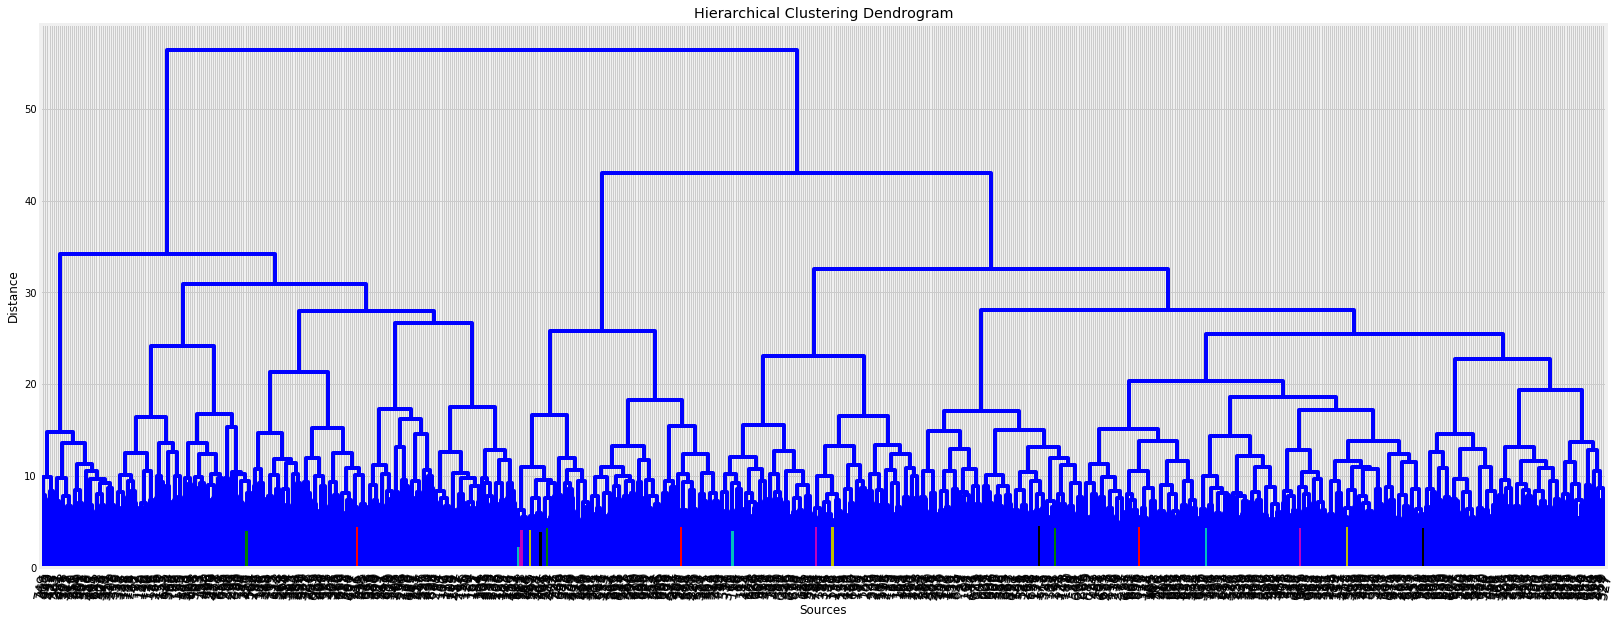

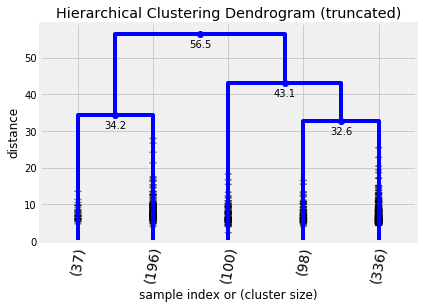

In [8]:
test_find_clusters_prosume_en(get_dataframe_analysis_en(True), 5)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:16: DataConversionWarning:

Data with input dtype int64 were all converted to float64 by the scale function.



,"Al reutilizar una imagen, ¿crees puedes redefinir el mensaje que el emisor ha pensado?",Clasifica tu grado de visión,"Cuando compartes imágenes en redes sociales, ¿las acompañas de texto siguiendo las indicaciones que te sugieren las aplicaciones (etiquetado, explicación de la imagen, texto inspirador, etc.)?","Cuando haces fotos desde cualquiera de los medios a tu alcance, ¿te facilitan el proceso las opciones que te ofrecen las aplicaciones (filtros, recortes, edición mediante grafismo, etc.)?","Cuando observas estas imágenes, ¿entiendes lo que pasa, aunque los sujetos/objetos no se muestren de forma completa? 1 2 3 4","Cuando observas una imagen, ¿te preguntas cosas acerca de los personajes/objetos que aparecen en la misma?","Cuando recibes o consumes una imagen, ¿la comparas con tu propia realidad? ¿Intentas encontrar en tu entorno cierto parecido?","Cuando recibes o consumes una imagen, ¿piensas en el modo en que fue obtenida (técnicamente)?","Cuando recibes/consumes imágenes... (Respuesta múltiple) [1. Observo si son bellas, armónicas o no]",Cuando recibes/consumes imágenes... (Respuesta múltiple) [2. Me planteo si significan algo para mí],...,¿Has reconocido la/las formas rápidamente?,"¿Qué tipo de aplicaciones utilizas en tu ordenador/tableta/móvil? (Respuesta múltiple) [1. Apps de contenidos audiovisuales (Netflix, HBO, etc.)]","¿Qué tipo de aplicaciones utilizas en tu ordenador/tableta/móvil? (Respuesta múltiple) [2. Aplicaciones de mensajería (Whatsapp, Facebook Messenger, etc.)]","¿Qué tipo de aplicaciones utilizas en tu ordenador/tableta/móvil? (Respuesta múltiple) [3. Bibliotecas de fotos online (Google Photos, iPhoto, etc.)]","¿Qué tipo de aplicaciones utilizas en tu ordenador/tableta/móvil? (Respuesta múltiple) [4. Redes sociales (Facebook, Instagram, Twitter, etc.).]","¿Qué tipo de aplicaciones utilizas en tu ordenador/tableta/móvil? (Respuesta múltiple) [5. Aplicaciones de vídeo (Youtube, Vimeo, etc.).]",¿Te gusta seguir a personas que admiras en redes sociales? ¿Eres fan o follower de alguna? ¿En ocasiones escribes comentarios en sus publicaciones?,"¿Tienes acceso a dispositivos (ordenador, móvil, tablet, etc.) conectados a Internet habitualmente?","¿Tienes alguna carencia visual que afecte a la recepción de formas, colores, distancias, etc.?",¿Utilizas gafas o lentes de contacto?
0,-0.322794,-1.218193,-1.860199,-0.143225,-0.180359,0.506719,-1.353917,0.858744,0.751868,0.899423,...,-0.013042,0.892330,0.515438,1.006540,0.484876,0.620062,0.324719,0.542426,-0.430664,0.965396
1,-0.322794,-1.218193,0.027066,-0.143225,-0.180359,0.506719,-0.314423,-0.098606,-1.330020,0.899423,...,-0.013042,0.892330,0.515438,-0.993502,-2.062383,0.620062,-1.591123,0.542426,-0.430664,0.965396
2,-0.322794,-0.035466,0.027066,1.687670,-0.180359,-0.524192,-0.314423,-1.055955,0.751868,0.899423,...,-0.013042,0.892330,0.515438,1.006540,0.484876,0.620062,0.324719,0.542426,-0.430664,0.965396
3,-0.322794,-0.035466,1.914332,1.687670,-0.180359,0.506719,0.725071,-0.098606,0.751868,-1.111824,...,-0.013042,-1.120662,0.515438,1.006540,0.484876,0.620062,0.324719,0.542426,-0.430664,0.965396
4,1.581690,-0.035466,0.970699,-0.143225,-0.180359,-0.524192,-1.353917,-0.098606,-1.330020,-1.111824,...,-0.013042,-1.120662,0.515438,-0.993502,0.484876,0.620062,-0.633202,0.542426,-0.430664,0.965396


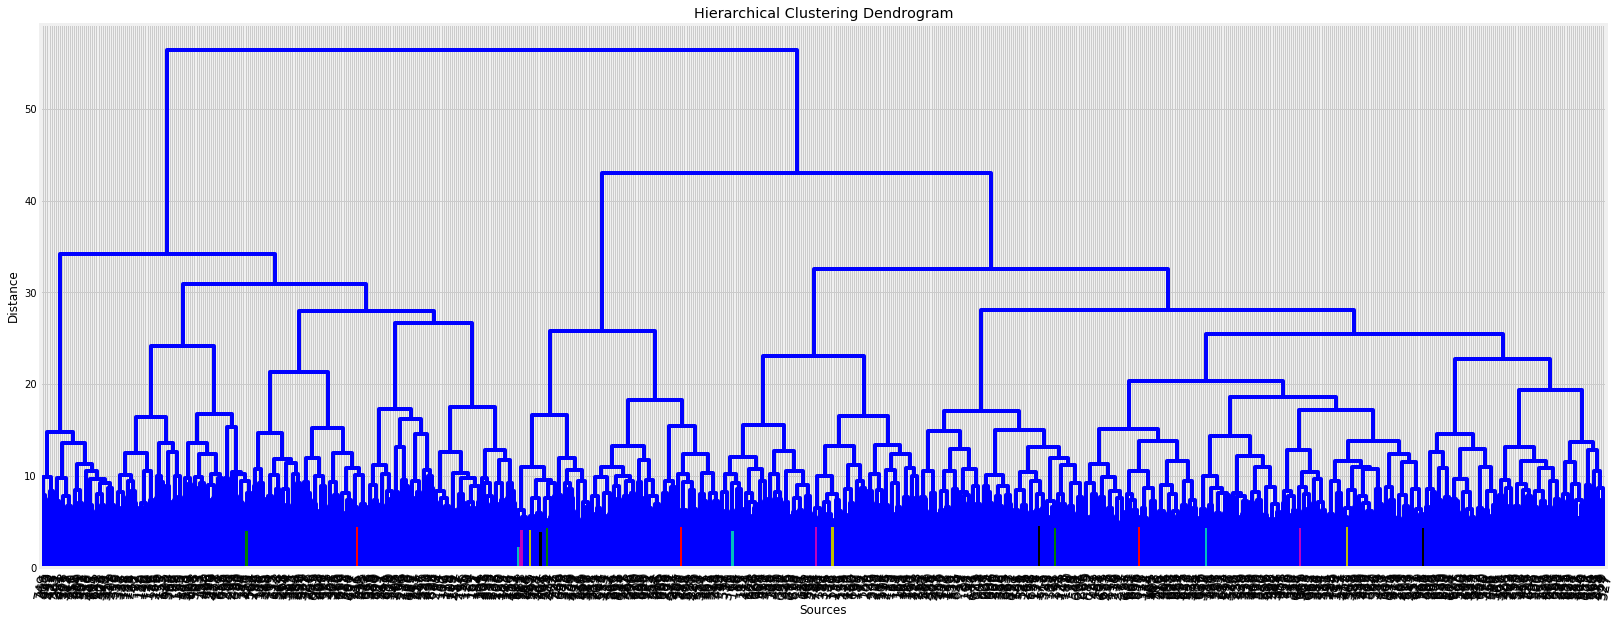

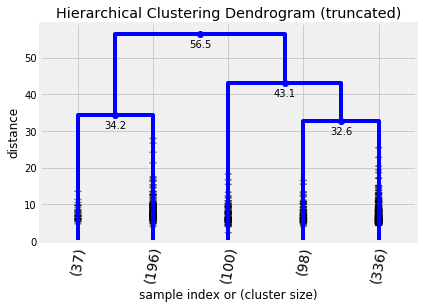

In [9]:
test_find_clusters_prosume_esp(get_dataframe_analysis_esp(True), 5)

## Obtaining clusters from data

These functions obtain the clusters from a dataframe and return another dataframe with a new column called 'prosume_cluster' which represents the cluster related to prosume aspects assigned to each participant 

Also, we include two examples to show how to use the functions. The Euclidean distance used as a cutoff point to get the clusters in the examples is '28' as shown in the graphs displayed in the test functions `test_find_clusters_en()` and `test_find_clusters_esp()`

In [10]:
def get_dataframe_with_clusters_en(dataframe, max_euc_distance):
    
    clusters = dataframe.copy(True)
    clusters = drop_text_columns_en(clusters)
    clusters = drop_optional_columns_en(clusters)

    all_prosume_items = get_prosume_items_en()

    my_subset = all_prosume_items
    clusters = clusters[sorted(clusters, key=lambda x: x not in my_subset)]

    columns_vC = clusters.columns.values.tolist()

    for item in all_prosume_items:
        columns_vC.remove(item)

    z_vCluster = scale(clusters.iloc[:, len(my_subset):])
    z_vCluster = pd.DataFrame(z_vCluster, columns=columns_vC)

    # display(z_vCluster.head())

    # Fitting our model.
    cluster_tree = linkage(z_vCluster, 'ward')
    
    dataframe_with_clusters = clusters
    clusters_got = fcluster(cluster_tree, max_euc_distance, criterion='distance')
    dataframe_with_clusters['prosume_cluster'] = clusters_got
    
    return dataframe_with_clusters

In [11]:
def get_dataframe_with_clusters_esp(dataframe, max_euc_distance):
    
    clusters = dataframe.copy(True)
    clusters = drop_text_columns_esp(clusters)
    clusters = drop_optional_columns_esp(clusters)

    all_prosume_items = get_prosume_items_esp()

    my_subset = all_prosume_items
    clusters = clusters[sorted(clusters, key=lambda x: x not in my_subset)]

    columns_vC = clusters.columns.values.tolist()

    for item in all_prosume_items:
        columns_vC.remove(item)

    z_vCluster = scale(clusters.iloc[:, len(my_subset):])
    z_vCluster = pd.DataFrame(z_vCluster, columns=columns_vC)

    # display(z_vCluster.head())

    # Fitting our model.
    cluster_tree = linkage(z_vCluster, 'ward')
    
    dataframe_with_clusters = clusters
    clusters_got = fcluster(cluster_tree, max_euc_distance, criterion='distance')
    dataframe_with_clusters['prosume_cluster'] = clusters_got
    
    return dataframe_with_clusters

In [12]:
dataframe_with_clusters_en = get_dataframe_with_clusters_en(get_dataframe_analysis_en(True), 32)

print("Number of clusters: "+ str(len(dataframe_with_clusters_en['prosume_cluster'].unique())))
dataframe_with_clusters_en['prosume_cluster'].value_counts().sort_index()

Number of clusters: 5


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:17: DataConversionWarning:

Data with input dtype int64 were all converted to float64 by the scale function.



1     37
2    196
3    100
4     98
5    336
Name: prosume_cluster, dtype: int64

In [13]:
dataframe_with_clusters_esp = get_dataframe_with_clusters_esp(get_dataframe_analysis_esp(True), 32)

print("Número de clusters: "+ str(len(dataframe_with_clusters_esp['prosume_cluster'].unique())))
dataframe_with_clusters_esp['prosume_cluster'].value_counts().sort_index()

Número de clusters: 5


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:17: DataConversionWarning:

Data with input dtype int64 were all converted to float64 by the scale function.



1     37
2    196
3    100
4     98
5    336
Name: prosume_cluster, dtype: int64

In [14]:
def visualize_prosume_clusters_esp(dataframe):
    # Visualizing the clusters
    # We don't use a discrete colorscale due to Plotly does not support that in this moment https://github.com/plotly/plotly.js/issues/1968

    # Using Cividis color scale for visualization. https://arxiv.org/abs/1712.01662

    cultural_items_dict = [
        {'id': 'PR1', 'label': 'Cuando generas una imagen, ¿qué tipo de dispositivo usas? (Respuesta múltiple) [1. Cámara de fotos]'},
        {'id': 'PR2', 'label': 'Cuando generas una imagen, ¿qué tipo de dispositivo usas? (Respuesta múltiple) [2. Teléfono móvil]'},
        {'id': 'PR3', 'label': 'Cuando generas una imagen, ¿qué tipo de dispositivo usas? (Respuesta múltiple) [3. Tableta]'},
        {'id': 'PR4', 'label': '¿Con qué frecuencia haces fotografías?'},
        {'id': 'PR5', 'label': 'Cuando produces imágenes, ¿cuánto tiempo dedicas a prepararlas? (minutos)'},
        {'id': 'PR6', 'label': '¿Repites las imágenes hasta conseguir el resultado esperado?'},
        {'id': 'PR7', 'label': 'En tu entorno, ¿las personas que utilizan la tecnología crean imágenes y las comparten?'},
        {'id': 'PR8', 'label': 'Cuando compartes imágenes, ¿habitualmente las recibes de otras personas?'},
        {'id': 'PR9', 'label': 'Cuando compartes imágenes, ¿habitualmente las envías a otras personas?'},
        {'id': 'PR10', 'label': 'Cuando compartes imágenes, ¿habitualmente las produces tú?'},
        {'id': 'PR11', 'label': 'Dentro de tus redes sociales o aplicaciones móviles, ¿se comparte información visual que tú no buscas (campañas de concienciación social, chistes, publicidad, etc.)?'},
        {'id': 'PR12', 'label': 'Si encuentras esta información visual sugerida, ¿cómo actúas?'},
        {'id': 'PR13', 'label': 'Si tienes que crear una presentación de contenidos...'},
        {'id': 'PR14', 'label': 'Si las buscas en Internet...'},
        {'id': 'PR15', 'label': '¿Cuándo prosumes (produces y consumes) imágenes?'},
        {'id': 'PR16', 'label': 'Si produces imágenes, ¿para qué las usas? (Respuesta múltiple) [1. Para que se entienda mejor el significado de lo que quiero expresar]'},
        {'id': 'PR17', 'label': 'Si produces imágenes, ¿para qué las usas? (Respuesta múltiple) [2. Para explicar mejor dónde me encuentro]'},
        {'id': 'PR18', 'label': 'Si produces imágenes, ¿para qué las usas? (Respuesta múltiple) [3. Para expresar emociones]'},
        {'id': 'PR19', 'label': 'Si produces imágenes, ¿para qué las usas? (Respuesta múltiple) [4. Para ahorrar palabras]'},
        {'id': 'PR20', 'label': 'Si produces imágenes, ¿para qué las usas? (Respuesta múltiple) [5. Para compartir momentos]'},
        {'id': 'PR21', 'label': 'Si has respondido que NUNCA produces o consumes imágenes, ¿por qué no las usas? (Respuesta múltiple) [1. No me gustan]'},
        {'id': 'PR22', 'label': 'Si has respondido que NUNCA produces o consumes imágenes, ¿por qué no las usas? (Respuesta múltiple) [2. No sé cómo se hacen]'},
        {'id': 'PR23', 'label': 'Si has respondido que NUNCA produces o consumes imágenes, ¿por qué no las usas? (Respuesta múltiple) [3. No uso la tecnología]'},
        {'id': 'PR24', 'label': 'Si has respondido que NUNCA produces o consumes imágenes, ¿por qué no las usas? (Respuesta múltiple) [4. Cuando las comparto no sé qué significan]'},
        {'id': 'PR25', 'label': 'Si has respondido que NUNCA produces o consumes imágenes, ¿por qué no las usas? (Respuesta múltiple) [5. Porque ocupan mucho espacio]'},
        {'id': 'PR26', 'label': 'Si has respondido que NUNCA produces o consumes imágenes, ¿por qué no las usas? (Respuesta múltiple) [6. Me parece inútil]'},
        {'id': 'PR27', 'label': '¿Qué imágenes decides compartir en redes sociales u otros medios tecnológicos? (Respuesta múltiple) [1. Imágenes que realizo para mantener las redes activas]'},
        {'id': 'PR28', 'label': '¿Qué imágenes decides compartir en redes sociales u otros medios tecnológicos? (Respuesta múltiple) [2. Imágenes del día a día, que forman parte de mí vida, las utilizo para expresarme]'},
        {'id': 'PR29', 'label': '¿Qué imágenes decides compartir en redes sociales u otros medios tecnológicos? (Respuesta múltiple) [3. Imágenes referenciales con el fin de mostrar algo de forma informativa]'},
        {'id': 'PR30', 'label': '¿Qué imágenes decides compartir en redes sociales u otros medios tecnológicos? (Respuesta múltiple) [4. Imágenes que con las que pretendo causar una reacción (ej. likes)]'},
        {'id': 'PR31', 'label': '¿Con quién compartes imágenes generalmente? (Respuesta múltiple) [1. Amigos]'},
        {'id': 'PR32', 'label': '¿Con quién compartes imágenes generalmente? (Respuesta múltiple) [2. Familia]'},
        {'id': 'PR33', 'label': '¿Con quién compartes imágenes generalmente? (Respuesta múltiple) [3. Compañeros]'},
        {'id': 'PR34', 'label': '¿Con quién compartes imágenes generalmente? (Respuesta múltiple) [4. Con todos mis conocidos]'},
        {'id': 'PR35', 'label': '¿Con quién compartes imágenes generalmente? (Respuesta múltiple) [5. Con nadie]'},
        {'id': 'PR36', 'label': 'Cuando produces imágenes, ¿piensas en la imagen que quieres crear antes de hacerla?'},
        {'id': 'PR37', 'label': '¿Cuánto de tu consumo de imágenes viene desde los medios digitales (prensa digital, Internet, televisión, etc.) y cuánto por medios analógicos (prensa escrita, revistas, libros, etc.)?'},   
    ]

    #
    dimensions_list = []

    for item in cultural_items_dict:
        dimensions_list.append(
            dict(range=[dataframe[item['label']].min(), dataframe[item['label']].max()],
                 #constraintrange = [workCleanDummiesCluster[item['label']].min(), workCleanDummiesCluster[item['label']].max()/3],
                 label=item['id'],
                 values=dataframe[item['label']])
        )

    data = [
        go.Parcoords(
            showlegend=True,
            line=dict(color=dataframe['prosume_cluster'].unique().astype(int),
                      colorscale='Cividis',
                      showscale=True,
                      reversescale=False,
                      cmin=dataframe['prosume_cluster'].min(),
                      cmax=dataframe['prosume_cluster'].max()
                      ),
            dimensions=dimensions_list,
        )
    ]

    '''
    layout = Layout()
    '''

    fig = go.Figure(data=data)
    iplot(fig)

    for item in cultural_items_dict:
        print(item['id']+": "+item['label'])

    all_prosume_items = get_prosume_items_esp()

    for selected_cluster in dataframe['prosume_cluster'].unique():
        for column in all_prosume_items:
            print("\n\nCluster "+str(selected_cluster) +
                  " || variable: "+str(column))
            print(f'Describiendo la pregunta {column}')
            display(dataframe.loc[dataframe['prosume_cluster'] == selected_cluster][column].describe())
            print(f'Conteo de cada valor en {column} expresada como valor / cantidad')
            display(dataframe.loc[dataframe['prosume_cluster'] == selected_cluster][column].value_counts().sort_index())
            print(f'Porcentaje de cada valor en {column} expresado como valor / porcentaje')
            display(dataframe.loc[dataframe['prosume_cluster'] == selected_cluster][column].value_counts(normalize=True).sort_index().round(4) * 100)
            # sns.distplot(workCleanDummiesCluster.loc[workCleanDummiesCluster['cluster'] == selected_cluster][column], kde=False, rug=True);
            data = [go.Bar(x=dataframe.loc[dataframe['prosume_cluster'] == selected_cluster][column],
                           y=dataframe.loc[dataframe['prosume_cluster'] == selected_cluster][column].value_counts())]
            iplot(data)
            plt.show()

In [15]:
def visualize_prosume_clusters_en(dataframe):
    # Visualizing the clusters
    # We don't use a discrete colorscale due to Plotly does not support that in this moment https://github.com/plotly/plotly.js/issues/1968

    # Using Cividis color scale for visualization. https://arxiv.org/abs/1712.01662

    cultural_items_dict = [
        {'id': 'PR1', 'label': 'When you take a picture, what type of capture device do you use? (Multiple answer) [1. Photo camera]'},
        {'id': 'PR2', 'label': 'When you take a picture, what type of capture device do you use? (Multiple answer) [2. Mobile phone]'},
        {'id': 'PR3', 'label': 'When you take a picture, what type of capture device do you use? (Multiple answer) [3. Tablet]'},
        {'id': 'PR4', 'label': 'How often do you produce images?'},
        {'id': 'PR5', 'label': 'When you produce images, how much time do you spend preparing it? (minutes)'},
        {'id': 'PR6', 'label': 'Do you repeat the images until you get the expected result?'},
        {'id': 'PR7', 'label': 'In your environment, do people who use technology create images and share them?'},
        {'id': 'PR8', 'label': 'When you share images, do you usually receive them from other people?'},
        {'id': 'PR9', 'label': 'When you share images, do you usually send them to other people?'},
        {'id': 'PR10', 'label': 'When you submit an image, have you treated an image that you have previously received or that has been generated by you?'},
        {'id': 'PR11', 'label': 'Within your social networks or mobile applications, do you see visual information that you are not looking for (social awareness campaigns, jokes, advertising, etc.)?'},
        {'id': 'PR12', 'label': 'If you find that suggested information, what is your attitude?'},
        {'id': 'PR13', 'label': 'If you have to create a content presentation...'},
        {'id': 'PR14', 'label': 'If you look for images in the Internet...'},
        {'id': 'PR15', 'label': 'When do you prosume (produce and consume) images?'},
        {'id': 'PR16', 'label': 'If you produce images, what do you use for? [1. In order to better understand the meaning of what I want to express]'},
        {'id': 'PR17', 'label': 'If you produce images, what do you use for? [2. In order to better explain where I am]'},
        {'id': 'PR18', 'label': 'If you produce images, what do you use for? [3. To express emotions]'},
        {'id': 'PR19', 'label': 'If you produce images, what do you use for? [4. To save words]'},
        {'id': 'PR20', 'label': 'If you produce images, what do you use for? [5. In order to share moments]'},
        {'id': 'PR21', 'label': 'If you answered that you NEVER produce or consume images, why do not you use them? (Multiple answer) [1. I do not like]'},
        {'id': 'PR22', 'label': 'If you answered that you NEVER produce or consume images, why do not you use them? (Multiple answer) [2. I do not know how they are made]'},
        {'id': 'PR23', 'label': 'If you answered that you NEVER produce or consume images, why do not you use them? (Multiple answer) [3. I do not use technology]'},
        {'id': 'PR24', 'label': 'If you answered that you NEVER produce or consume images, why do not you use them? (Multiple answer) [4. When I share them, I do not know what they mean]'},
        {'id': 'PR25', 'label': 'If you answered that you NEVER produce or consume images, why do not you use them? (Multiple answer) [5. Because they take up a lot of space]'},
        {'id': 'PR26', 'label': 'If you answered that you NEVER produce or consume images, why do not you use them? (Multiple answer) [6. I find it useless]'},
        {'id': 'PR27', 'label': 'What images do you decide to share in social networks or other technological media? [1. Images I make to keep networks active]'},
        {'id': 'PR28', 'label': 'What images do you decide to share in social networks or other technological media? [2. Images from day to day, which are part of my life, I use them to express myself]'},
        {'id': 'PR29', 'label': 'What images do you decide to share in social networks or other technological media? [3. Referential images in order to show something informative]'},
        {'id': 'PR30', 'label': 'What images do you decide to share in social networks or other technological media? [4. Images with which I intend to cause a reaction (eg. likes)]'},
        {'id': 'PR31', 'label': 'With whom do you usually share images? [1. Friends]'},
        {'id': 'PR32', 'label': 'With whom do you usually share images? [2. Family]'},
        {'id': 'PR33', 'label': 'With whom do you usually share images? [3. Partners]'},
        {'id': 'PR34', 'label': 'With whom do you usually share images? [4. With all my acquaintances]'},
        {'id': 'PR35', 'label': 'With whom do you usually share images? [5. With nobody]'},
        {'id': 'PR36', 'label': 'When you produce images, do you think about the image you want to create before doing it?'},
        {'id': 'PR37', 'label': 'How much of your consumption of digital images comes from digital media (digital press, internet, television,etc.) and how much by analogical means?'},   
    ]
                        
    #
    dimensions_list = []

    for item in cultural_items_dict:
        dimensions_list.append(
            dict(range=[dataframe[item['label']].min(), dataframe[item['label']].max()],
                 #constraintrange = [workCleanDummiesCluster[item['label']].min(), workCleanDummiesCluster[item['label']].max()/3],
                 label=item['id'],
                 values=dataframe[item['label']])
        )

    data = [
        go.Parcoords(
            showlegend=True,
            line=dict(color=dataframe['prosume_cluster'].unique().astype(int),
                      colorscale='Cividis',
                      showscale=True,
                      reversescale=False,
                      cmin=dataframe['prosume_cluster'].min(),
                      cmax=dataframe['prosume_cluster'].max()
                      ),
            dimensions=dimensions_list,
        )
    ]

    '''
    layout = Layout()
    '''

    fig = go.Figure(data=data)
    iplot(fig)

    for item in cultural_items_dict:
        print(item['id']+": "+item['label'])

    all_prosume_items = get_prosume_items_en()

    for selected_cluster in dataframe['prosume_cluster'].unique():
        for column in all_prosume_items:
            print("\n\nCluster "+str(selected_cluster) +
                  " || feature: "+str(column))
            print(f'Describing the feature {column}')
            display(dataframe.loc[dataframe['prosume_cluster'] == selected_cluster][column].describe())
            print(f'Count of each value in {column} expresed as value / amount')
            display(dataframe.loc[dataframe['prosume_cluster'] == selected_cluster][column].value_counts().sort_index())
            print(f'Percentage of each value in {column} expresed as value / percentage')
            display(dataframe.loc[dataframe['prosume_cluster'] == selected_cluster][column].value_counts(normalize=True).sort_index().round(4) * 100)
            
            # sns.distplot(workCleanDummiesCluster.loc[workCleanDummiesCluster['cluster'] == selected_cluster][column], kde=False, rug=True);
            data = [go.Bar(x=dataframe.loc[dataframe['prosume_cluster'] == selected_cluster][column],
                           y=dataframe.loc[dataframe['prosume_cluster'] == selected_cluster][column].value_counts())]
            iplot(data)
            plt.show()

In [16]:
visualize_prosume_clusters_esp(dataframe_with_clusters_esp)

PR1: Cuando generas una imagen, ¿qué tipo de dispositivo usas? (Respuesta múltiple) [1. Cámara de fotos]
PR2: Cuando generas una imagen, ¿qué tipo de dispositivo usas? (Respuesta múltiple) [2. Teléfono móvil]
PR3: Cuando generas una imagen, ¿qué tipo de dispositivo usas? (Respuesta múltiple) [3. Tableta]
PR4: ¿Con qué frecuencia haces fotografías?
PR5: Cuando produces imágenes, ¿cuánto tiempo dedicas a prepararlas? (minutos)
PR6: ¿Repites las imágenes hasta conseguir el resultado esperado?
PR7: En tu entorno, ¿las personas que utilizan la tecnología crean imágenes y las comparten?
PR8: Cuando compartes imágenes, ¿habitualmente las recibes de otras personas?
PR9: Cuando compartes imágenes, ¿habitualmente las envías a otras personas?
PR10: Cuando compartes imágenes, ¿habitualmente las produces tú?
PR11: Dentro de tus redes sociales o aplicaciones móviles, ¿se comparte información visual que tú no buscas (campañas de concienciación social, chistes, publicidad, etc.)?
PR12: Si encuentras e

count    336.000000
mean       0.297619
std        0.457893
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: Cuando generas una imagen, ¿qué tipo de dispositivo usas? (Respuesta múltiple) [1. Cámara de fotos], dtype: float64

Conteo de cada valor en Cuando generas una imagen, ¿qué tipo de dispositivo usas? (Respuesta múltiple) [1. Cámara de fotos] expresada como valor / cantidad


0    236
1    100
Name: Cuando generas una imagen, ¿qué tipo de dispositivo usas? (Respuesta múltiple) [1. Cámara de fotos], dtype: int64

Porcentaje de cada valor en Cuando generas una imagen, ¿qué tipo de dispositivo usas? (Respuesta múltiple) [1. Cámara de fotos] expresado como valor / porcentaje


0    70.24
1    29.76
Name: Cuando generas una imagen, ¿qué tipo de dispositivo usas? (Respuesta múltiple) [1. Cámara de fotos], dtype: float64



Cluster 5 || variable: Cuando generas una imagen, ¿qué tipo de dispositivo usas? (Respuesta múltiple) [2. Teléfono móvil]
Describiendo la pregunta Cuando generas una imagen, ¿qué tipo de dispositivo usas? (Respuesta múltiple) [2. Teléfono móvil]


count    336.000000
mean       0.931548
std        0.252897
min        0.000000
25%        1.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: Cuando generas una imagen, ¿qué tipo de dispositivo usas? (Respuesta múltiple) [2. Teléfono móvil], dtype: float64

Conteo de cada valor en Cuando generas una imagen, ¿qué tipo de dispositivo usas? (Respuesta múltiple) [2. Teléfono móvil] expresada como valor / cantidad


0     23
1    313
Name: Cuando generas una imagen, ¿qué tipo de dispositivo usas? (Respuesta múltiple) [2. Teléfono móvil], dtype: int64

Porcentaje de cada valor en Cuando generas una imagen, ¿qué tipo de dispositivo usas? (Respuesta múltiple) [2. Teléfono móvil] expresado como valor / porcentaje


0     6.85
1    93.15
Name: Cuando generas una imagen, ¿qué tipo de dispositivo usas? (Respuesta múltiple) [2. Teléfono móvil], dtype: float64



Cluster 5 || variable: Cuando generas una imagen, ¿qué tipo de dispositivo usas? (Respuesta múltiple) [3. Tableta]
Describiendo la pregunta Cuando generas una imagen, ¿qué tipo de dispositivo usas? (Respuesta múltiple) [3. Tableta]


count    336.000000
mean       0.083333
std        0.276798
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
Name: Cuando generas una imagen, ¿qué tipo de dispositivo usas? (Respuesta múltiple) [3. Tableta], dtype: float64

Conteo de cada valor en Cuando generas una imagen, ¿qué tipo de dispositivo usas? (Respuesta múltiple) [3. Tableta] expresada como valor / cantidad


0    308
1     28
Name: Cuando generas una imagen, ¿qué tipo de dispositivo usas? (Respuesta múltiple) [3. Tableta], dtype: int64

Porcentaje de cada valor en Cuando generas una imagen, ¿qué tipo de dispositivo usas? (Respuesta múltiple) [3. Tableta] expresado como valor / porcentaje


0    91.67
1     8.33
Name: Cuando generas una imagen, ¿qué tipo de dispositivo usas? (Respuesta múltiple) [3. Tableta], dtype: float64



Cluster 5 || variable: ¿Con qué frecuencia haces fotografías?
Describiendo la pregunta ¿Con qué frecuencia haces fotografías?


count    336.000000
mean       3.720238
std        0.961501
min        1.000000
25%        3.000000
50%        4.000000
75%        4.000000
max        5.000000
Name: ¿Con qué frecuencia haces fotografías?, dtype: float64

Conteo de cada valor en ¿Con qué frecuencia haces fotografías? expresada como valor / cantidad


1      3
2     42
3     71
4    150
5     70
Name: ¿Con qué frecuencia haces fotografías?, dtype: int64

Porcentaje de cada valor en ¿Con qué frecuencia haces fotografías? expresado como valor / porcentaje


1     0.89
2    12.50
3    21.13
4    44.64
5    20.83
Name: ¿Con qué frecuencia haces fotografías?, dtype: float64



Cluster 5 || variable: Cuando produces imágenes, ¿cuánto tiempo dedicas a prepararlas? (minutos)
Describiendo la pregunta Cuando produces imágenes, ¿cuánto tiempo dedicas a prepararlas? (minutos)


count     336.000000
mean       17.799702
std       196.773755
min         0.000000
25%         1.000000
50%         2.500000
75%         5.000000
max      3600.000000
Name: Cuando produces imágenes, ¿cuánto tiempo dedicas a prepararlas? (minutos), dtype: float64

Conteo de cada valor en Cuando produces imágenes, ¿cuánto tiempo dedicas a prepararlas? (minutos) expresada como valor / cantidad


0.0       30
0.5        1
1.0       74
1.2        1
2.0       62
3.0       22
4.0        3
5.0       66
6.0        1
10.0      39
12.0       1
15.0       9
20.0       7
30.0       8
40.0       2
50.0       1
60.0       6
120.0      1
240.0      1
3600.0     1
Name: Cuando produces imágenes, ¿cuánto tiempo dedicas a prepararlas? (minutos), dtype: int64

Porcentaje de cada valor en Cuando produces imágenes, ¿cuánto tiempo dedicas a prepararlas? (minutos) expresado como valor / porcentaje


0.0        8.93
0.5        0.30
1.0       22.02
1.2        0.30
2.0       18.45
3.0        6.55
4.0        0.89
5.0       19.64
6.0        0.30
10.0      11.61
12.0       0.30
15.0       2.68
20.0       2.08
30.0       2.38
40.0       0.60
50.0       0.30
60.0       1.79
120.0      0.30
240.0      0.30
3600.0     0.30
Name: Cuando produces imágenes, ¿cuánto tiempo dedicas a prepararlas? (minutos), dtype: float64



Cluster 5 || variable: ¿Repites las imágenes hasta conseguir el resultado esperado?
Describiendo la pregunta ¿Repites las imágenes hasta conseguir el resultado esperado?


count    336.000000
mean       0.732143
std        0.443503
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: ¿Repites las imágenes hasta conseguir el resultado esperado?, dtype: float64

Conteo de cada valor en ¿Repites las imágenes hasta conseguir el resultado esperado? expresada como valor / cantidad


0     90
1    246
Name: ¿Repites las imágenes hasta conseguir el resultado esperado?, dtype: int64

Porcentaje de cada valor en ¿Repites las imágenes hasta conseguir el resultado esperado? expresado como valor / porcentaje


0    26.79
1    73.21
Name: ¿Repites las imágenes hasta conseguir el resultado esperado?, dtype: float64



Cluster 5 || variable: En tu entorno, ¿las personas que utilizan la tecnología crean imágenes y las comparten?
Describiendo la pregunta En tu entorno, ¿las personas que utilizan la tecnología crean imágenes y las comparten?


count    336.000000
mean       3.708333
std        0.954825
min        1.000000
25%        3.000000
50%        4.000000
75%        4.000000
max        5.000000
Name: En tu entorno, ¿las personas que utilizan la tecnología crean imágenes y las comparten?, dtype: float64

Conteo de cada valor en En tu entorno, ¿las personas que utilizan la tecnología crean imágenes y las comparten? expresada como valor / cantidad


1      6
2     27
3     99
4    131
5     73
Name: En tu entorno, ¿las personas que utilizan la tecnología crean imágenes y las comparten?, dtype: int64

Porcentaje de cada valor en En tu entorno, ¿las personas que utilizan la tecnología crean imágenes y las comparten? expresado como valor / porcentaje


1     1.79
2     8.04
3    29.46
4    38.99
5    21.73
Name: En tu entorno, ¿las personas que utilizan la tecnología crean imágenes y las comparten?, dtype: float64



Cluster 5 || variable: Cuando compartes imágenes, ¿habitualmente las recibes de otras personas?
Describiendo la pregunta Cuando compartes imágenes, ¿habitualmente las recibes de otras personas?


count    336.000000
mean       3.357143
std        0.872709
min        1.000000
25%        3.000000
50%        3.000000
75%        4.000000
max        5.000000
Name: Cuando compartes imágenes, ¿habitualmente las recibes de otras personas?, dtype: float64

Conteo de cada valor en Cuando compartes imágenes, ¿habitualmente las recibes de otras personas? expresada como valor / cantidad


1      7
2     37
3    152
4    109
5     31
Name: Cuando compartes imágenes, ¿habitualmente las recibes de otras personas?, dtype: int64

Porcentaje de cada valor en Cuando compartes imágenes, ¿habitualmente las recibes de otras personas? expresado como valor / porcentaje


1     2.08
2    11.01
3    45.24
4    32.44
5     9.23
Name: Cuando compartes imágenes, ¿habitualmente las recibes de otras personas?, dtype: float64



Cluster 5 || variable: Cuando compartes imágenes, ¿habitualmente las envías a otras personas?
Describiendo la pregunta Cuando compartes imágenes, ¿habitualmente las envías a otras personas?


count    336.000000
mean       3.357143
std        0.841361
min        1.000000
25%        3.000000
50%        3.000000
75%        4.000000
max        5.000000
Name: Cuando compartes imágenes, ¿habitualmente las envías a otras personas?, dtype: float64

Conteo de cada valor en Cuando compartes imágenes, ¿habitualmente las envías a otras personas? expresada como valor / cantidad


1      5
2     37
3    155
4    111
5     28
Name: Cuando compartes imágenes, ¿habitualmente las envías a otras personas?, dtype: int64

Porcentaje de cada valor en Cuando compartes imágenes, ¿habitualmente las envías a otras personas? expresado como valor / porcentaje


1     1.49
2    11.01
3    46.13
4    33.04
5     8.33
Name: Cuando compartes imágenes, ¿habitualmente las envías a otras personas?, dtype: float64



Cluster 5 || variable: Cuando compartes imágenes, ¿habitualmente las produces tú?
Describiendo la pregunta Cuando compartes imágenes, ¿habitualmente las produces tú?


count    336.000000
mean       3.107143
std        0.765180
min        1.000000
25%        3.000000
50%        3.000000
75%        4.000000
max        5.000000
Name: Cuando compartes imágenes, ¿habitualmente las produces tú?, dtype: float64

Conteo de cada valor en Cuando compartes imágenes, ¿habitualmente las produces tú? expresada como valor / cantidad


1      7
2     48
3    196
4     72
5     13
Name: Cuando compartes imágenes, ¿habitualmente las produces tú?, dtype: int64

Porcentaje de cada valor en Cuando compartes imágenes, ¿habitualmente las produces tú? expresado como valor / porcentaje


1     2.08
2    14.29
3    58.33
4    21.43
5     3.87
Name: Cuando compartes imágenes, ¿habitualmente las produces tú?, dtype: float64



Cluster 5 || variable: Dentro de tus redes sociales o aplicaciones móviles, ¿se comparte información visual que tú no buscas (campañas de concienciación social, chistes, publicidad, etc.)?
Describiendo la pregunta Dentro de tus redes sociales o aplicaciones móviles, ¿se comparte información visual que tú no buscas (campañas de concienciación social, chistes, publicidad, etc.)?


count    336.000000
mean       3.633929
std        1.016246
min        1.000000
25%        3.000000
50%        4.000000
75%        4.000000
max        5.000000
Name: Dentro de tus redes sociales o aplicaciones móviles, ¿se comparte información visual que tú no buscas (campañas de concienciación social, chistes, publicidad, etc.)?, dtype: float64

Conteo de cada valor en Dentro de tus redes sociales o aplicaciones móviles, ¿se comparte información visual que tú no buscas (campañas de concienciación social, chistes, publicidad, etc.)? expresada como valor / cantidad


1      7
2     40
3     95
4    121
5     73
Name: Dentro de tus redes sociales o aplicaciones móviles, ¿se comparte información visual que tú no buscas (campañas de concienciación social, chistes, publicidad, etc.)?, dtype: int64

Porcentaje de cada valor en Dentro de tus redes sociales o aplicaciones móviles, ¿se comparte información visual que tú no buscas (campañas de concienciación social, chistes, publicidad, etc.)? expresado como valor / porcentaje


1     2.08
2    11.90
3    28.27
4    36.01
5    21.73
Name: Dentro de tus redes sociales o aplicaciones móviles, ¿se comparte información visual que tú no buscas (campañas de concienciación social, chistes, publicidad, etc.)?, dtype: float64



Cluster 5 || variable: Si encuentras esta información visual sugerida, ¿cómo actúas?
Describiendo la pregunta Si encuentras esta información visual sugerida, ¿cómo actúas?


count    336.000000
mean       1.348214
std        0.477115
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max        2.000000
Name: Si encuentras esta información visual sugerida, ¿cómo actúas?, dtype: float64

Conteo de cada valor en Si encuentras esta información visual sugerida, ¿cómo actúas? expresada como valor / cantidad


1    219
2    117
Name: Si encuentras esta información visual sugerida, ¿cómo actúas?, dtype: int64

Porcentaje de cada valor en Si encuentras esta información visual sugerida, ¿cómo actúas? expresado como valor / porcentaje


1    65.18
2    34.82
Name: Si encuentras esta información visual sugerida, ¿cómo actúas?, dtype: float64



Cluster 5 || variable: Si tienes que crear una presentación de contenidos...
Describiendo la pregunta Si tienes que crear una presentación de contenidos...


count    336.000000
mean       1.214286
std        0.410938
min        1.000000
25%        1.000000
50%        1.000000
75%        1.000000
max        2.000000
Name: Si tienes que crear una presentación de contenidos..., dtype: float64

Conteo de cada valor en Si tienes que crear una presentación de contenidos... expresada como valor / cantidad


1    264
2     72
Name: Si tienes que crear una presentación de contenidos..., dtype: int64

Porcentaje de cada valor en Si tienes que crear una presentación de contenidos... expresado como valor / porcentaje


1    78.57
2    21.43
Name: Si tienes que crear una presentación de contenidos..., dtype: float64



Cluster 5 || variable: Si las buscas en Internet...
Describiendo la pregunta Si las buscas en Internet...


count    336.000000
mean       1.696429
std        0.743199
min        1.000000
25%        1.000000
50%        2.000000
75%        2.000000
max        3.000000
Name: Si las buscas en Internet..., dtype: float64

Conteo de cada valor en Si las buscas en Internet... expresada como valor / cantidad


1    159
2    120
3     57
Name: Si las buscas en Internet..., dtype: int64

Porcentaje de cada valor en Si las buscas en Internet... expresado como valor / porcentaje


1    47.32
2    35.71
3    16.96
Name: Si las buscas en Internet..., dtype: float64



Cluster 5 || variable: ¿Cuándo prosumes (produces y consumes) imágenes?
Describiendo la pregunta ¿Cuándo prosumes (produces y consumes) imágenes?


count    336.000000
mean       3.407738
std        1.137082
min        1.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        5.000000
Name: ¿Cuándo prosumes (produces y consumes) imágenes?, dtype: float64

Conteo de cada valor en ¿Cuándo prosumes (produces y consumes) imágenes? expresada como valor / cantidad


1     9
2    79
3    84
4    94
5    70
Name: ¿Cuándo prosumes (produces y consumes) imágenes?, dtype: int64

Porcentaje de cada valor en ¿Cuándo prosumes (produces y consumes) imágenes? expresado como valor / porcentaje


1     2.68
2    23.51
3    25.00
4    27.98
5    20.83
Name: ¿Cuándo prosumes (produces y consumes) imágenes?, dtype: float64



Cluster 5 || variable: Si produces imágenes, ¿para qué las usas? (Respuesta múltiple) [1. Para que se entienda mejor el significado de lo que quiero expresar]
Describiendo la pregunta Si produces imágenes, ¿para qué las usas? (Respuesta múltiple) [1. Para que se entienda mejor el significado de lo que quiero expresar]


count    336.000000
mean       0.425595
std        0.495170
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: Si produces imágenes, ¿para qué las usas? (Respuesta múltiple) [1. Para que se entienda mejor el significado de lo que quiero expresar], dtype: float64

Conteo de cada valor en Si produces imágenes, ¿para qué las usas? (Respuesta múltiple) [1. Para que se entienda mejor el significado de lo que quiero expresar] expresada como valor / cantidad


0    193
1    143
Name: Si produces imágenes, ¿para qué las usas? (Respuesta múltiple) [1. Para que se entienda mejor el significado de lo que quiero expresar], dtype: int64

Porcentaje de cada valor en Si produces imágenes, ¿para qué las usas? (Respuesta múltiple) [1. Para que se entienda mejor el significado de lo que quiero expresar] expresado como valor / porcentaje


0    57.44
1    42.56
Name: Si produces imágenes, ¿para qué las usas? (Respuesta múltiple) [1. Para que se entienda mejor el significado de lo que quiero expresar], dtype: float64



Cluster 5 || variable: Si produces imágenes, ¿para qué las usas? (Respuesta múltiple) [2. Para explicar mejor dónde me encuentro]
Describiendo la pregunta Si produces imágenes, ¿para qué las usas? (Respuesta múltiple) [2. Para explicar mejor dónde me encuentro]


count    336.000000
mean       0.270833
std        0.445053
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: Si produces imágenes, ¿para qué las usas? (Respuesta múltiple) [2. Para explicar mejor dónde me encuentro], dtype: float64

Conteo de cada valor en Si produces imágenes, ¿para qué las usas? (Respuesta múltiple) [2. Para explicar mejor dónde me encuentro] expresada como valor / cantidad


0    245
1     91
Name: Si produces imágenes, ¿para qué las usas? (Respuesta múltiple) [2. Para explicar mejor dónde me encuentro], dtype: int64

Porcentaje de cada valor en Si produces imágenes, ¿para qué las usas? (Respuesta múltiple) [2. Para explicar mejor dónde me encuentro] expresado como valor / porcentaje


0    72.92
1    27.08
Name: Si produces imágenes, ¿para qué las usas? (Respuesta múltiple) [2. Para explicar mejor dónde me encuentro], dtype: float64



Cluster 5 || variable: Si produces imágenes, ¿para qué las usas? (Respuesta múltiple) [3. Para expresar emociones]
Describiendo la pregunta Si produces imágenes, ¿para qué las usas? (Respuesta múltiple) [3. Para expresar emociones]


count    336.000000
mean       0.470238
std        0.499858
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: Si produces imágenes, ¿para qué las usas? (Respuesta múltiple) [3. Para expresar emociones], dtype: float64

Conteo de cada valor en Si produces imágenes, ¿para qué las usas? (Respuesta múltiple) [3. Para expresar emociones] expresada como valor / cantidad


0    178
1    158
Name: Si produces imágenes, ¿para qué las usas? (Respuesta múltiple) [3. Para expresar emociones], dtype: int64

Porcentaje de cada valor en Si produces imágenes, ¿para qué las usas? (Respuesta múltiple) [3. Para expresar emociones] expresado como valor / porcentaje


0    52.98
1    47.02
Name: Si produces imágenes, ¿para qué las usas? (Respuesta múltiple) [3. Para expresar emociones], dtype: float64



Cluster 5 || variable: Si produces imágenes, ¿para qué las usas? (Respuesta múltiple) [4. Para ahorrar palabras]
Describiendo la pregunta Si produces imágenes, ¿para qué las usas? (Respuesta múltiple) [4. Para ahorrar palabras]


count    336.000000
mean       0.184524
std        0.388489
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
Name: Si produces imágenes, ¿para qué las usas? (Respuesta múltiple) [4. Para ahorrar palabras], dtype: float64

Conteo de cada valor en Si produces imágenes, ¿para qué las usas? (Respuesta múltiple) [4. Para ahorrar palabras] expresada como valor / cantidad


0    274
1     62
Name: Si produces imágenes, ¿para qué las usas? (Respuesta múltiple) [4. Para ahorrar palabras], dtype: int64

Porcentaje de cada valor en Si produces imágenes, ¿para qué las usas? (Respuesta múltiple) [4. Para ahorrar palabras] expresado como valor / porcentaje


0    81.55
1    18.45
Name: Si produces imágenes, ¿para qué las usas? (Respuesta múltiple) [4. Para ahorrar palabras], dtype: float64



Cluster 5 || variable: Si produces imágenes, ¿para qué las usas? (Respuesta múltiple) [5. Para compartir momentos]
Describiendo la pregunta Si produces imágenes, ¿para qué las usas? (Respuesta múltiple) [5. Para compartir momentos]


count    336.000000
mean       0.601190
std        0.490384
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: Si produces imágenes, ¿para qué las usas? (Respuesta múltiple) [5. Para compartir momentos], dtype: float64

Conteo de cada valor en Si produces imágenes, ¿para qué las usas? (Respuesta múltiple) [5. Para compartir momentos] expresada como valor / cantidad


0    134
1    202
Name: Si produces imágenes, ¿para qué las usas? (Respuesta múltiple) [5. Para compartir momentos], dtype: int64

Porcentaje de cada valor en Si produces imágenes, ¿para qué las usas? (Respuesta múltiple) [5. Para compartir momentos] expresado como valor / porcentaje


0    39.88
1    60.12
Name: Si produces imágenes, ¿para qué las usas? (Respuesta múltiple) [5. Para compartir momentos], dtype: float64



Cluster 5 || variable: Si has respondido que NUNCA produces o consumes imágenes, ¿por qué no las usas? (Respuesta múltiple) [1. No me gustan]
Describiendo la pregunta Si has respondido que NUNCA produces o consumes imágenes, ¿por qué no las usas? (Respuesta múltiple) [1. No me gustan]


count    336.000000
mean       0.047619
std        0.213276
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
Name: Si has respondido que NUNCA produces o consumes imágenes, ¿por qué no las usas? (Respuesta múltiple) [1. No me gustan], dtype: float64

Conteo de cada valor en Si has respondido que NUNCA produces o consumes imágenes, ¿por qué no las usas? (Respuesta múltiple) [1. No me gustan] expresada como valor / cantidad


0    320
1     16
Name: Si has respondido que NUNCA produces o consumes imágenes, ¿por qué no las usas? (Respuesta múltiple) [1. No me gustan], dtype: int64

Porcentaje de cada valor en Si has respondido que NUNCA produces o consumes imágenes, ¿por qué no las usas? (Respuesta múltiple) [1. No me gustan] expresado como valor / porcentaje


0    95.24
1     4.76
Name: Si has respondido que NUNCA produces o consumes imágenes, ¿por qué no las usas? (Respuesta múltiple) [1. No me gustan], dtype: float64



Cluster 5 || variable: Si has respondido que NUNCA produces o consumes imágenes, ¿por qué no las usas? (Respuesta múltiple) [2. No sé cómo se hacen]
Describiendo la pregunta Si has respondido que NUNCA produces o consumes imágenes, ¿por qué no las usas? (Respuesta múltiple) [2. No sé cómo se hacen]


count    336.000000
mean       0.029762
std        0.170183
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
Name: Si has respondido que NUNCA produces o consumes imágenes, ¿por qué no las usas? (Respuesta múltiple) [2. No sé cómo se hacen], dtype: float64

Conteo de cada valor en Si has respondido que NUNCA produces o consumes imágenes, ¿por qué no las usas? (Respuesta múltiple) [2. No sé cómo se hacen] expresada como valor / cantidad


0    326
1     10
Name: Si has respondido que NUNCA produces o consumes imágenes, ¿por qué no las usas? (Respuesta múltiple) [2. No sé cómo se hacen], dtype: int64

Porcentaje de cada valor en Si has respondido que NUNCA produces o consumes imágenes, ¿por qué no las usas? (Respuesta múltiple) [2. No sé cómo se hacen] expresado como valor / porcentaje


0    97.02
1     2.98
Name: Si has respondido que NUNCA produces o consumes imágenes, ¿por qué no las usas? (Respuesta múltiple) [2. No sé cómo se hacen], dtype: float64



Cluster 5 || variable: Si has respondido que NUNCA produces o consumes imágenes, ¿por qué no las usas? (Respuesta múltiple) [3. No uso la tecnología]
Describiendo la pregunta Si has respondido que NUNCA produces o consumes imágenes, ¿por qué no las usas? (Respuesta múltiple) [3. No uso la tecnología]


count    336.000000
mean       0.023810
std        0.152683
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
Name: Si has respondido que NUNCA produces o consumes imágenes, ¿por qué no las usas? (Respuesta múltiple) [3. No uso la tecnología], dtype: float64

Conteo de cada valor en Si has respondido que NUNCA produces o consumes imágenes, ¿por qué no las usas? (Respuesta múltiple) [3. No uso la tecnología] expresada como valor / cantidad


0    328
1      8
Name: Si has respondido que NUNCA produces o consumes imágenes, ¿por qué no las usas? (Respuesta múltiple) [3. No uso la tecnología], dtype: int64

Porcentaje de cada valor en Si has respondido que NUNCA produces o consumes imágenes, ¿por qué no las usas? (Respuesta múltiple) [3. No uso la tecnología] expresado como valor / porcentaje


0    97.62
1     2.38
Name: Si has respondido que NUNCA produces o consumes imágenes, ¿por qué no las usas? (Respuesta múltiple) [3. No uso la tecnología], dtype: float64



Cluster 5 || variable: Si has respondido que NUNCA produces o consumes imágenes, ¿por qué no las usas? (Respuesta múltiple) [4. Cuando las comparto no sé qué significan]
Describiendo la pregunta Si has respondido que NUNCA produces o consumes imágenes, ¿por qué no las usas? (Respuesta múltiple) [4. Cuando las comparto no sé qué significan]


count    336.000000
mean       0.035714
std        0.185854
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
Name: Si has respondido que NUNCA produces o consumes imágenes, ¿por qué no las usas? (Respuesta múltiple) [4. Cuando las comparto no sé qué significan], dtype: float64

Conteo de cada valor en Si has respondido que NUNCA produces o consumes imágenes, ¿por qué no las usas? (Respuesta múltiple) [4. Cuando las comparto no sé qué significan] expresada como valor / cantidad


0    324
1     12
Name: Si has respondido que NUNCA produces o consumes imágenes, ¿por qué no las usas? (Respuesta múltiple) [4. Cuando las comparto no sé qué significan], dtype: int64

Porcentaje de cada valor en Si has respondido que NUNCA produces o consumes imágenes, ¿por qué no las usas? (Respuesta múltiple) [4. Cuando las comparto no sé qué significan] expresado como valor / porcentaje


0    96.43
1     3.57
Name: Si has respondido que NUNCA produces o consumes imágenes, ¿por qué no las usas? (Respuesta múltiple) [4. Cuando las comparto no sé qué significan], dtype: float64



Cluster 5 || variable: Si has respondido que NUNCA produces o consumes imágenes, ¿por qué no las usas? (Respuesta múltiple) [5. Porque ocupan mucho espacio]
Describiendo la pregunta Si has respondido que NUNCA produces o consumes imágenes, ¿por qué no las usas? (Respuesta múltiple) [5. Porque ocupan mucho espacio]


count    336.000000
mean       0.065476
std        0.247733
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
Name: Si has respondido que NUNCA produces o consumes imágenes, ¿por qué no las usas? (Respuesta múltiple) [5. Porque ocupan mucho espacio], dtype: float64

Conteo de cada valor en Si has respondido que NUNCA produces o consumes imágenes, ¿por qué no las usas? (Respuesta múltiple) [5. Porque ocupan mucho espacio] expresada como valor / cantidad


0    314
1     22
Name: Si has respondido que NUNCA produces o consumes imágenes, ¿por qué no las usas? (Respuesta múltiple) [5. Porque ocupan mucho espacio], dtype: int64

Porcentaje de cada valor en Si has respondido que NUNCA produces o consumes imágenes, ¿por qué no las usas? (Respuesta múltiple) [5. Porque ocupan mucho espacio] expresado como valor / porcentaje


0    93.45
1     6.55
Name: Si has respondido que NUNCA produces o consumes imágenes, ¿por qué no las usas? (Respuesta múltiple) [5. Porque ocupan mucho espacio], dtype: float64



Cluster 5 || variable: Si has respondido que NUNCA produces o consumes imágenes, ¿por qué no las usas? (Respuesta múltiple) [6. Me parece inútil]
Describiendo la pregunta Si has respondido que NUNCA produces o consumes imágenes, ¿por qué no las usas? (Respuesta múltiple) [6. Me parece inútil]


count    336.000000
mean       0.029762
std        0.170183
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
Name: Si has respondido que NUNCA produces o consumes imágenes, ¿por qué no las usas? (Respuesta múltiple) [6. Me parece inútil], dtype: float64

Conteo de cada valor en Si has respondido que NUNCA produces o consumes imágenes, ¿por qué no las usas? (Respuesta múltiple) [6. Me parece inútil] expresada como valor / cantidad


0    326
1     10
Name: Si has respondido que NUNCA produces o consumes imágenes, ¿por qué no las usas? (Respuesta múltiple) [6. Me parece inútil], dtype: int64

Porcentaje de cada valor en Si has respondido que NUNCA produces o consumes imágenes, ¿por qué no las usas? (Respuesta múltiple) [6. Me parece inútil] expresado como valor / porcentaje


0    97.02
1     2.98
Name: Si has respondido que NUNCA produces o consumes imágenes, ¿por qué no las usas? (Respuesta múltiple) [6. Me parece inútil], dtype: float64



Cluster 5 || variable: ¿Qué imágenes decides compartir en redes sociales u otros medios tecnológicos? (Respuesta múltiple) [1. Imágenes que realizo para mantener las redes activas]
Describiendo la pregunta ¿Qué imágenes decides compartir en redes sociales u otros medios tecnológicos? (Respuesta múltiple) [1. Imágenes que realizo para mantener las redes activas]


count    336.000000
mean       0.214286
std        0.410938
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
Name: ¿Qué imágenes decides compartir en redes sociales u otros medios tecnológicos? (Respuesta múltiple) [1. Imágenes que realizo para mantener las redes activas], dtype: float64

Conteo de cada valor en ¿Qué imágenes decides compartir en redes sociales u otros medios tecnológicos? (Respuesta múltiple) [1. Imágenes que realizo para mantener las redes activas] expresada como valor / cantidad


0    264
1     72
Name: ¿Qué imágenes decides compartir en redes sociales u otros medios tecnológicos? (Respuesta múltiple) [1. Imágenes que realizo para mantener las redes activas], dtype: int64

Porcentaje de cada valor en ¿Qué imágenes decides compartir en redes sociales u otros medios tecnológicos? (Respuesta múltiple) [1. Imágenes que realizo para mantener las redes activas] expresado como valor / porcentaje


0    78.57
1    21.43
Name: ¿Qué imágenes decides compartir en redes sociales u otros medios tecnológicos? (Respuesta múltiple) [1. Imágenes que realizo para mantener las redes activas], dtype: float64



Cluster 5 || variable: ¿Qué imágenes decides compartir en redes sociales u otros medios tecnológicos? (Respuesta múltiple) [2. Imágenes del día a día, que forman parte de mí vida, las utilizo para expresarme]
Describiendo la pregunta ¿Qué imágenes decides compartir en redes sociales u otros medios tecnológicos? (Respuesta múltiple) [2. Imágenes del día a día, que forman parte de mí vida, las utilizo para expresarme]


count    336.000000
mean       0.580357
std        0.494237
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: ¿Qué imágenes decides compartir en redes sociales u otros medios tecnológicos? (Respuesta múltiple) [2. Imágenes del día a día, que forman parte de mí vida, las utilizo para expresarme], dtype: float64

Conteo de cada valor en ¿Qué imágenes decides compartir en redes sociales u otros medios tecnológicos? (Respuesta múltiple) [2. Imágenes del día a día, que forman parte de mí vida, las utilizo para expresarme] expresada como valor / cantidad


0    141
1    195
Name: ¿Qué imágenes decides compartir en redes sociales u otros medios tecnológicos? (Respuesta múltiple) [2. Imágenes del día a día, que forman parte de mí vida, las utilizo para expresarme], dtype: int64

Porcentaje de cada valor en ¿Qué imágenes decides compartir en redes sociales u otros medios tecnológicos? (Respuesta múltiple) [2. Imágenes del día a día, que forman parte de mí vida, las utilizo para expresarme] expresado como valor / porcentaje


0    41.96
1    58.04
Name: ¿Qué imágenes decides compartir en redes sociales u otros medios tecnológicos? (Respuesta múltiple) [2. Imágenes del día a día, que forman parte de mí vida, las utilizo para expresarme], dtype: float64



Cluster 5 || variable: ¿Qué imágenes decides compartir en redes sociales u otros medios tecnológicos? (Respuesta múltiple) [3. Imágenes referenciales con el fin de mostrar algo de forma informativa]
Describiendo la pregunta ¿Qué imágenes decides compartir en redes sociales u otros medios tecnológicos? (Respuesta múltiple) [3. Imágenes referenciales con el fin de mostrar algo de forma informativa]


count    336.000000
mean       0.485119
std        0.500524
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: ¿Qué imágenes decides compartir en redes sociales u otros medios tecnológicos? (Respuesta múltiple) [3. Imágenes referenciales con el fin de mostrar algo de forma informativa], dtype: float64

Conteo de cada valor en ¿Qué imágenes decides compartir en redes sociales u otros medios tecnológicos? (Respuesta múltiple) [3. Imágenes referenciales con el fin de mostrar algo de forma informativa] expresada como valor / cantidad


0    173
1    163
Name: ¿Qué imágenes decides compartir en redes sociales u otros medios tecnológicos? (Respuesta múltiple) [3. Imágenes referenciales con el fin de mostrar algo de forma informativa], dtype: int64

Porcentaje de cada valor en ¿Qué imágenes decides compartir en redes sociales u otros medios tecnológicos? (Respuesta múltiple) [3. Imágenes referenciales con el fin de mostrar algo de forma informativa] expresado como valor / porcentaje


0    51.49
1    48.51
Name: ¿Qué imágenes decides compartir en redes sociales u otros medios tecnológicos? (Respuesta múltiple) [3. Imágenes referenciales con el fin de mostrar algo de forma informativa], dtype: float64



Cluster 5 || variable: ¿Qué imágenes decides compartir en redes sociales u otros medios tecnológicos? (Respuesta múltiple) [4. Imágenes que con las que pretendo causar una reacción (ej. likes)]
Describiendo la pregunta ¿Qué imágenes decides compartir en redes sociales u otros medios tecnológicos? (Respuesta múltiple) [4. Imágenes que con las que pretendo causar una reacción (ej. likes)]


count    336.000000
mean       0.366071
std        0.482448
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: ¿Qué imágenes decides compartir en redes sociales u otros medios tecnológicos? (Respuesta múltiple) [4. Imágenes que con las que pretendo causar una reacción (ej. likes)], dtype: float64

Conteo de cada valor en ¿Qué imágenes decides compartir en redes sociales u otros medios tecnológicos? (Respuesta múltiple) [4. Imágenes que con las que pretendo causar una reacción (ej. likes)] expresada como valor / cantidad


0    213
1    123
Name: ¿Qué imágenes decides compartir en redes sociales u otros medios tecnológicos? (Respuesta múltiple) [4. Imágenes que con las que pretendo causar una reacción (ej. likes)], dtype: int64

Porcentaje de cada valor en ¿Qué imágenes decides compartir en redes sociales u otros medios tecnológicos? (Respuesta múltiple) [4. Imágenes que con las que pretendo causar una reacción (ej. likes)] expresado como valor / porcentaje


0    63.39
1    36.61
Name: ¿Qué imágenes decides compartir en redes sociales u otros medios tecnológicos? (Respuesta múltiple) [4. Imágenes que con las que pretendo causar una reacción (ej. likes)], dtype: float64



Cluster 5 || variable: ¿Con quién compartes imágenes generalmente? (Respuesta múltiple) [1. Amigos]
Describiendo la pregunta ¿Con quién compartes imágenes generalmente? (Respuesta múltiple) [1. Amigos]


count    336.000000
mean       0.863095
std        0.344259
min        0.000000
25%        1.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: ¿Con quién compartes imágenes generalmente? (Respuesta múltiple) [1. Amigos], dtype: float64

Conteo de cada valor en ¿Con quién compartes imágenes generalmente? (Respuesta múltiple) [1. Amigos] expresada como valor / cantidad


0     46
1    290
Name: ¿Con quién compartes imágenes generalmente? (Respuesta múltiple) [1. Amigos], dtype: int64

Porcentaje de cada valor en ¿Con quién compartes imágenes generalmente? (Respuesta múltiple) [1. Amigos] expresado como valor / porcentaje


0    13.69
1    86.31
Name: ¿Con quién compartes imágenes generalmente? (Respuesta múltiple) [1. Amigos], dtype: float64



Cluster 5 || variable: ¿Con quién compartes imágenes generalmente? (Respuesta múltiple) [2. Familia]
Describiendo la pregunta ¿Con quién compartes imágenes generalmente? (Respuesta múltiple) [2. Familia]


count    336.000000
mean       0.839286
std        0.367815
min        0.000000
25%        1.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: ¿Con quién compartes imágenes generalmente? (Respuesta múltiple) [2. Familia], dtype: float64

Conteo de cada valor en ¿Con quién compartes imágenes generalmente? (Respuesta múltiple) [2. Familia] expresada como valor / cantidad


0     54
1    282
Name: ¿Con quién compartes imágenes generalmente? (Respuesta múltiple) [2. Familia], dtype: int64

Porcentaje de cada valor en ¿Con quién compartes imágenes generalmente? (Respuesta múltiple) [2. Familia] expresado como valor / porcentaje


0    16.07
1    83.93
Name: ¿Con quién compartes imágenes generalmente? (Respuesta múltiple) [2. Familia], dtype: float64



Cluster 5 || variable: ¿Con quién compartes imágenes generalmente? (Respuesta múltiple) [3. Compañeros]
Describiendo la pregunta ¿Con quién compartes imágenes generalmente? (Respuesta múltiple) [3. Compañeros]


count    336.000000
mean       0.425595
std        0.495170
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: ¿Con quién compartes imágenes generalmente? (Respuesta múltiple) [3. Compañeros], dtype: float64

Conteo de cada valor en ¿Con quién compartes imágenes generalmente? (Respuesta múltiple) [3. Compañeros] expresada como valor / cantidad


0    193
1    143
Name: ¿Con quién compartes imágenes generalmente? (Respuesta múltiple) [3. Compañeros], dtype: int64

Porcentaje de cada valor en ¿Con quién compartes imágenes generalmente? (Respuesta múltiple) [3. Compañeros] expresado como valor / porcentaje


0    57.44
1    42.56
Name: ¿Con quién compartes imágenes generalmente? (Respuesta múltiple) [3. Compañeros], dtype: float64



Cluster 5 || variable: ¿Con quién compartes imágenes generalmente? (Respuesta múltiple) [4. Con todos mis conocidos]
Describiendo la pregunta ¿Con quién compartes imágenes generalmente? (Respuesta múltiple) [4. Con todos mis conocidos]


count    336.000000
mean       0.244048
std        0.430162
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
Name: ¿Con quién compartes imágenes generalmente? (Respuesta múltiple) [4. Con todos mis conocidos], dtype: float64

Conteo de cada valor en ¿Con quién compartes imágenes generalmente? (Respuesta múltiple) [4. Con todos mis conocidos] expresada como valor / cantidad


0    254
1     82
Name: ¿Con quién compartes imágenes generalmente? (Respuesta múltiple) [4. Con todos mis conocidos], dtype: int64

Porcentaje de cada valor en ¿Con quién compartes imágenes generalmente? (Respuesta múltiple) [4. Con todos mis conocidos] expresado como valor / porcentaje


0    75.6
1    24.4
Name: ¿Con quién compartes imágenes generalmente? (Respuesta múltiple) [4. Con todos mis conocidos], dtype: float64



Cluster 5 || variable: ¿Con quién compartes imágenes generalmente? (Respuesta múltiple) [5. Con nadie]
Describiendo la pregunta ¿Con quién compartes imágenes generalmente? (Respuesta múltiple) [5. Con nadie]


count    336.000000
mean       0.029762
std        0.170183
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
Name: ¿Con quién compartes imágenes generalmente? (Respuesta múltiple) [5. Con nadie], dtype: float64

Conteo de cada valor en ¿Con quién compartes imágenes generalmente? (Respuesta múltiple) [5. Con nadie] expresada como valor / cantidad


0    326
1     10
Name: ¿Con quién compartes imágenes generalmente? (Respuesta múltiple) [5. Con nadie], dtype: int64

Porcentaje de cada valor en ¿Con quién compartes imágenes generalmente? (Respuesta múltiple) [5. Con nadie] expresado como valor / porcentaje


0    97.02
1     2.98
Name: ¿Con quién compartes imágenes generalmente? (Respuesta múltiple) [5. Con nadie], dtype: float64



Cluster 5 || variable: Cuando produces imágenes, ¿piensas en la imagen que quieres crear antes de hacerla?
Describiendo la pregunta Cuando produces imágenes, ¿piensas en la imagen que quieres crear antes de hacerla?


count    336.000000
mean       3.505952
std        1.036625
min        1.000000
25%        3.000000
50%        3.000000
75%        4.000000
max        5.000000
Name: Cuando produces imágenes, ¿piensas en la imagen que quieres crear antes de hacerla?, dtype: float64

Conteo de cada valor en Cuando produces imágenes, ¿piensas en la imagen que quieres crear antes de hacerla? expresada como valor / cantidad


1     11
2     36
3    130
4     90
5     69
Name: Cuando produces imágenes, ¿piensas en la imagen que quieres crear antes de hacerla?, dtype: int64

Porcentaje de cada valor en Cuando produces imágenes, ¿piensas en la imagen que quieres crear antes de hacerla? expresado como valor / porcentaje


1     3.27
2    10.71
3    38.69
4    26.79
5    20.54
Name: Cuando produces imágenes, ¿piensas en la imagen que quieres crear antes de hacerla?, dtype: float64



Cluster 5 || variable: ¿Cuánto de tu consumo de imágenes viene desde los medios digitales (prensa digital, Internet, televisión, etc.) y cuánto por medios analógicos (prensa escrita, revistas, libros, etc.)?
Describiendo la pregunta ¿Cuánto de tu consumo de imágenes viene desde los medios digitales (prensa digital, Internet, televisión, etc.) y cuánto por medios analógicos (prensa escrita, revistas, libros, etc.)?


count    336.000000
mean       2.315476
std        0.807723
min        1.000000
25%        2.000000
50%        2.000000
75%        3.000000
max        5.000000
Name: ¿Cuánto de tu consumo de imágenes viene desde los medios digitales (prensa digital, Internet, televisión, etc.) y cuánto por medios analógicos (prensa escrita, revistas, libros, etc.)?, dtype: float64

Conteo de cada valor en ¿Cuánto de tu consumo de imágenes viene desde los medios digitales (prensa digital, Internet, televisión, etc.) y cuánto por medios analógicos (prensa escrita, revistas, libros, etc.)? expresada como valor / cantidad


1     42
2    172
3    101
4     16
5      5
Name: ¿Cuánto de tu consumo de imágenes viene desde los medios digitales (prensa digital, Internet, televisión, etc.) y cuánto por medios analógicos (prensa escrita, revistas, libros, etc.)?, dtype: int64

Porcentaje de cada valor en ¿Cuánto de tu consumo de imágenes viene desde los medios digitales (prensa digital, Internet, televisión, etc.) y cuánto por medios analógicos (prensa escrita, revistas, libros, etc.)? expresado como valor / porcentaje


1    12.50
2    51.19
3    30.06
4     4.76
5     1.49
Name: ¿Cuánto de tu consumo de imágenes viene desde los medios digitales (prensa digital, Internet, televisión, etc.) y cuánto por medios analógicos (prensa escrita, revistas, libros, etc.)?, dtype: float64



Cluster 2 || variable: Cuando generas una imagen, ¿qué tipo de dispositivo usas? (Respuesta múltiple) [1. Cámara de fotos]
Describiendo la pregunta Cuando generas una imagen, ¿qué tipo de dispositivo usas? (Respuesta múltiple) [1. Cámara de fotos]


count    196.000000
mean       0.341837
std        0.475540
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: Cuando generas una imagen, ¿qué tipo de dispositivo usas? (Respuesta múltiple) [1. Cámara de fotos], dtype: float64

Conteo de cada valor en Cuando generas una imagen, ¿qué tipo de dispositivo usas? (Respuesta múltiple) [1. Cámara de fotos] expresada como valor / cantidad


0    129
1     67
Name: Cuando generas una imagen, ¿qué tipo de dispositivo usas? (Respuesta múltiple) [1. Cámara de fotos], dtype: int64

Porcentaje de cada valor en Cuando generas una imagen, ¿qué tipo de dispositivo usas? (Respuesta múltiple) [1. Cámara de fotos] expresado como valor / porcentaje


0    65.82
1    34.18
Name: Cuando generas una imagen, ¿qué tipo de dispositivo usas? (Respuesta múltiple) [1. Cámara de fotos], dtype: float64



Cluster 2 || variable: Cuando generas una imagen, ¿qué tipo de dispositivo usas? (Respuesta múltiple) [2. Teléfono móvil]
Describiendo la pregunta Cuando generas una imagen, ¿qué tipo de dispositivo usas? (Respuesta múltiple) [2. Teléfono móvil]


count    196.000000
mean       0.918367
std        0.274505
min        0.000000
25%        1.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: Cuando generas una imagen, ¿qué tipo de dispositivo usas? (Respuesta múltiple) [2. Teléfono móvil], dtype: float64

Conteo de cada valor en Cuando generas una imagen, ¿qué tipo de dispositivo usas? (Respuesta múltiple) [2. Teléfono móvil] expresada como valor / cantidad


0     16
1    180
Name: Cuando generas una imagen, ¿qué tipo de dispositivo usas? (Respuesta múltiple) [2. Teléfono móvil], dtype: int64

Porcentaje de cada valor en Cuando generas una imagen, ¿qué tipo de dispositivo usas? (Respuesta múltiple) [2. Teléfono móvil] expresado como valor / porcentaje


0     8.16
1    91.84
Name: Cuando generas una imagen, ¿qué tipo de dispositivo usas? (Respuesta múltiple) [2. Teléfono móvil], dtype: float64



Cluster 2 || variable: Cuando generas una imagen, ¿qué tipo de dispositivo usas? (Respuesta múltiple) [3. Tableta]
Describiendo la pregunta Cuando generas una imagen, ¿qué tipo de dispositivo usas? (Respuesta múltiple) [3. Tableta]


count    196.000000
mean       0.051020
std        0.220603
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
Name: Cuando generas una imagen, ¿qué tipo de dispositivo usas? (Respuesta múltiple) [3. Tableta], dtype: float64

Conteo de cada valor en Cuando generas una imagen, ¿qué tipo de dispositivo usas? (Respuesta múltiple) [3. Tableta] expresada como valor / cantidad


0    186
1     10
Name: Cuando generas una imagen, ¿qué tipo de dispositivo usas? (Respuesta múltiple) [3. Tableta], dtype: int64

Porcentaje de cada valor en Cuando generas una imagen, ¿qué tipo de dispositivo usas? (Respuesta múltiple) [3. Tableta] expresado como valor / porcentaje


0    94.9
1     5.1
Name: Cuando generas una imagen, ¿qué tipo de dispositivo usas? (Respuesta múltiple) [3. Tableta], dtype: float64



Cluster 2 || variable: ¿Con qué frecuencia haces fotografías?
Describiendo la pregunta ¿Con qué frecuencia haces fotografías?


count    196.000000
mean       3.214286
std        1.116313
min        1.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        5.000000
Name: ¿Con qué frecuencia haces fotografías?, dtype: float64

Conteo de cada valor en ¿Con qué frecuencia haces fotografías? expresada como valor / cantidad


1    14
2    39
3    58
4    61
5    24
Name: ¿Con qué frecuencia haces fotografías?, dtype: int64

Porcentaje de cada valor en ¿Con qué frecuencia haces fotografías? expresado como valor / porcentaje


1     7.14
2    19.90
3    29.59
4    31.12
5    12.24
Name: ¿Con qué frecuencia haces fotografías?, dtype: float64



Cluster 2 || variable: Cuando produces imágenes, ¿cuánto tiempo dedicas a prepararlas? (minutos)
Describiendo la pregunta Cuando produces imágenes, ¿cuánto tiempo dedicas a prepararlas? (minutos)


count    196.000000
mean       9.955612
std       15.205381
min        0.000000
25%        1.750000
50%        5.000000
75%       10.000000
max      120.000000
Name: Cuando produces imágenes, ¿cuánto tiempo dedicas a prepararlas? (minutos), dtype: float64

Conteo de cada valor en Cuando produces imágenes, ¿cuánto tiempo dedicas a prepararlas? (minutos) expresada como valor / cantidad


0.0      20
0.3       1
1.0      28
2.0      27
3.0      10
4.0       3
5.0      34
7.0       2
10.0     23
15.0     13
20.0     12
25.0      3
30.0      9
33.0      1
35.0      1
40.0      1
45.0      3
60.0      3
90.0      1
120.0     1
Name: Cuando produces imágenes, ¿cuánto tiempo dedicas a prepararlas? (minutos), dtype: int64

Porcentaje de cada valor en Cuando produces imágenes, ¿cuánto tiempo dedicas a prepararlas? (minutos) expresado como valor / porcentaje


0.0      10.20
0.3       0.51
1.0      14.29
2.0      13.78
3.0       5.10
4.0       1.53
5.0      17.35
7.0       1.02
10.0     11.73
15.0      6.63
20.0      6.12
25.0      1.53
30.0      4.59
33.0      0.51
35.0      0.51
40.0      0.51
45.0      1.53
60.0      1.53
90.0      0.51
120.0     0.51
Name: Cuando produces imágenes, ¿cuánto tiempo dedicas a prepararlas? (minutos), dtype: float64



Cluster 2 || variable: ¿Repites las imágenes hasta conseguir el resultado esperado?
Describiendo la pregunta ¿Repites las imágenes hasta conseguir el resultado esperado?


count    196.000000
mean       0.642857
std        0.480384
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: ¿Repites las imágenes hasta conseguir el resultado esperado?, dtype: float64

Conteo de cada valor en ¿Repites las imágenes hasta conseguir el resultado esperado? expresada como valor / cantidad


0     70
1    126
Name: ¿Repites las imágenes hasta conseguir el resultado esperado?, dtype: int64

Porcentaje de cada valor en ¿Repites las imágenes hasta conseguir el resultado esperado? expresado como valor / porcentaje


0    35.71
1    64.29
Name: ¿Repites las imágenes hasta conseguir el resultado esperado?, dtype: float64



Cluster 2 || variable: En tu entorno, ¿las personas que utilizan la tecnología crean imágenes y las comparten?
Describiendo la pregunta En tu entorno, ¿las personas que utilizan la tecnología crean imágenes y las comparten?


count    196.000000
mean       3.357143
std        1.030310
min        1.000000
25%        3.000000
50%        3.000000
75%        4.000000
max        5.000000
Name: En tu entorno, ¿las personas que utilizan la tecnología crean imágenes y las comparten?, dtype: float64

Conteo de cada valor en En tu entorno, ¿las personas que utilizan la tecnología crean imágenes y las comparten? expresada como valor / cantidad


1    10
2    23
3    78
4    57
5    28
Name: En tu entorno, ¿las personas que utilizan la tecnología crean imágenes y las comparten?, dtype: int64

Porcentaje de cada valor en En tu entorno, ¿las personas que utilizan la tecnología crean imágenes y las comparten? expresado como valor / porcentaje


1     5.10
2    11.73
3    39.80
4    29.08
5    14.29
Name: En tu entorno, ¿las personas que utilizan la tecnología crean imágenes y las comparten?, dtype: float64



Cluster 2 || variable: Cuando compartes imágenes, ¿habitualmente las recibes de otras personas?
Describiendo la pregunta Cuando compartes imágenes, ¿habitualmente las recibes de otras personas?


count    196.000000
mean       3.051020
std        0.943234
min        1.000000
25%        2.750000
50%        3.000000
75%        4.000000
max        5.000000
Name: Cuando compartes imágenes, ¿habitualmente las recibes de otras personas?, dtype: float64

Conteo de cada valor en Cuando compartes imágenes, ¿habitualmente las recibes de otras personas? expresada como valor / cantidad


1    10
2    39
3    91
4    43
5    13
Name: Cuando compartes imágenes, ¿habitualmente las recibes de otras personas?, dtype: int64

Porcentaje de cada valor en Cuando compartes imágenes, ¿habitualmente las recibes de otras personas? expresado como valor / porcentaje


1     5.10
2    19.90
3    46.43
4    21.94
5     6.63
Name: Cuando compartes imágenes, ¿habitualmente las recibes de otras personas?, dtype: float64



Cluster 2 || variable: Cuando compartes imágenes, ¿habitualmente las envías a otras personas?
Describiendo la pregunta Cuando compartes imágenes, ¿habitualmente las envías a otras personas?


count    196.000000
mean       2.938776
std        0.995542
min        1.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        5.000000
Name: Cuando compartes imágenes, ¿habitualmente las envías a otras personas?, dtype: float64

Conteo de cada valor en Cuando compartes imágenes, ¿habitualmente las envías a otras personas? expresada como valor / cantidad


1    15
2    46
3    83
4    40
5    12
Name: Cuando compartes imágenes, ¿habitualmente las envías a otras personas?, dtype: int64

Porcentaje de cada valor en Cuando compartes imágenes, ¿habitualmente las envías a otras personas? expresado como valor / porcentaje


1     7.65
2    23.47
3    42.35
4    20.41
5     6.12
Name: Cuando compartes imágenes, ¿habitualmente las envías a otras personas?, dtype: float64



Cluster 2 || variable: Cuando compartes imágenes, ¿habitualmente las produces tú?
Describiendo la pregunta Cuando compartes imágenes, ¿habitualmente las produces tú?


count    196.000000
mean       3.025510
std        0.999673
min        1.000000
25%        3.000000
50%        3.000000
75%        4.000000
max        5.000000
Name: Cuando compartes imágenes, ¿habitualmente las produces tú?, dtype: float64

Conteo de cada valor en Cuando compartes imágenes, ¿habitualmente las produces tú? expresada como valor / cantidad


1     19
2     24
3    100
4     39
5     14
Name: Cuando compartes imágenes, ¿habitualmente las produces tú?, dtype: int64

Porcentaje de cada valor en Cuando compartes imágenes, ¿habitualmente las produces tú? expresado como valor / porcentaje


1     9.69
2    12.24
3    51.02
4    19.90
5     7.14
Name: Cuando compartes imágenes, ¿habitualmente las produces tú?, dtype: float64



Cluster 2 || variable: Dentro de tus redes sociales o aplicaciones móviles, ¿se comparte información visual que tú no buscas (campañas de concienciación social, chistes, publicidad, etc.)?
Describiendo la pregunta Dentro de tus redes sociales o aplicaciones móviles, ¿se comparte información visual que tú no buscas (campañas de concienciación social, chistes, publicidad, etc.)?


count    196.000000
mean       3.260204
std        1.136187
min        1.000000
25%        3.000000
50%        3.000000
75%        4.000000
max        5.000000
Name: Dentro de tus redes sociales o aplicaciones móviles, ¿se comparte información visual que tú no buscas (campañas de concienciación social, chistes, publicidad, etc.)?, dtype: float64

Conteo de cada valor en Dentro de tus redes sociales o aplicaciones móviles, ¿se comparte información visual que tú no buscas (campañas de concienciación social, chistes, publicidad, etc.)? expresada como valor / cantidad


1    18
2    27
3    63
4    62
5    26
Name: Dentro de tus redes sociales o aplicaciones móviles, ¿se comparte información visual que tú no buscas (campañas de concienciación social, chistes, publicidad, etc.)?, dtype: int64

Porcentaje de cada valor en Dentro de tus redes sociales o aplicaciones móviles, ¿se comparte información visual que tú no buscas (campañas de concienciación social, chistes, publicidad, etc.)? expresado como valor / porcentaje


1     9.18
2    13.78
3    32.14
4    31.63
5    13.27
Name: Dentro de tus redes sociales o aplicaciones móviles, ¿se comparte información visual que tú no buscas (campañas de concienciación social, chistes, publicidad, etc.)?, dtype: float64



Cluster 2 || variable: Si encuentras esta información visual sugerida, ¿cómo actúas?
Describiendo la pregunta Si encuentras esta información visual sugerida, ¿cómo actúas?


count    196.000000
mean       1.377551
std        0.486016
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max        2.000000
Name: Si encuentras esta información visual sugerida, ¿cómo actúas?, dtype: float64

Conteo de cada valor en Si encuentras esta información visual sugerida, ¿cómo actúas? expresada como valor / cantidad


1    122
2     74
Name: Si encuentras esta información visual sugerida, ¿cómo actúas?, dtype: int64

Porcentaje de cada valor en Si encuentras esta información visual sugerida, ¿cómo actúas? expresado como valor / porcentaje


1    62.24
2    37.76
Name: Si encuentras esta información visual sugerida, ¿cómo actúas?, dtype: float64



Cluster 2 || variable: Si tienes que crear una presentación de contenidos...
Describiendo la pregunta Si tienes que crear una presentación de contenidos...


count    196.000000
mean       1.260204
std        0.439869
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max        2.000000
Name: Si tienes que crear una presentación de contenidos..., dtype: float64

Conteo de cada valor en Si tienes que crear una presentación de contenidos... expresada como valor / cantidad


1    145
2     51
Name: Si tienes que crear una presentación de contenidos..., dtype: int64

Porcentaje de cada valor en Si tienes que crear una presentación de contenidos... expresado como valor / porcentaje


1    73.98
2    26.02
Name: Si tienes que crear una presentación de contenidos..., dtype: float64



Cluster 2 || variable: Si las buscas en Internet...
Describiendo la pregunta Si las buscas en Internet...


count    196.000000
mean       1.663265
std        0.700826
min        1.000000
25%        1.000000
50%        2.000000
75%        2.000000
max        3.000000
Name: Si las buscas en Internet..., dtype: float64

Conteo de cada valor en Si las buscas en Internet... expresada como valor / cantidad


1    92
2    78
3    26
Name: Si las buscas en Internet..., dtype: int64

Porcentaje de cada valor en Si las buscas en Internet... expresado como valor / porcentaje


1    46.94
2    39.80
3    13.27
Name: Si las buscas en Internet..., dtype: float64



Cluster 2 || variable: ¿Cuándo prosumes (produces y consumes) imágenes?
Describiendo la pregunta ¿Cuándo prosumes (produces y consumes) imágenes?


count    196.000000
mean       3.076531
std        1.176374
min        1.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        5.000000
Name: ¿Cuándo prosumes (produces y consumes) imágenes?, dtype: float64

Conteo de cada valor en ¿Cuándo prosumes (produces y consumes) imágenes? expresada como valor / cantidad


1    19
2    47
3    54
4    52
5    24
Name: ¿Cuándo prosumes (produces y consumes) imágenes?, dtype: int64

Porcentaje de cada valor en ¿Cuándo prosumes (produces y consumes) imágenes? expresado como valor / porcentaje


1     9.69
2    23.98
3    27.55
4    26.53
5    12.24
Name: ¿Cuándo prosumes (produces y consumes) imágenes?, dtype: float64



Cluster 2 || variable: Si produces imágenes, ¿para qué las usas? (Respuesta múltiple) [1. Para que se entienda mejor el significado de lo que quiero expresar]
Describiendo la pregunta Si produces imágenes, ¿para qué las usas? (Respuesta múltiple) [1. Para que se entienda mejor el significado de lo que quiero expresar]


count    196.000000
mean       0.290816
std        0.455302
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: Si produces imágenes, ¿para qué las usas? (Respuesta múltiple) [1. Para que se entienda mejor el significado de lo que quiero expresar], dtype: float64

Conteo de cada valor en Si produces imágenes, ¿para qué las usas? (Respuesta múltiple) [1. Para que se entienda mejor el significado de lo que quiero expresar] expresada como valor / cantidad


0    139
1     57
Name: Si produces imágenes, ¿para qué las usas? (Respuesta múltiple) [1. Para que se entienda mejor el significado de lo que quiero expresar], dtype: int64

Porcentaje de cada valor en Si produces imágenes, ¿para qué las usas? (Respuesta múltiple) [1. Para que se entienda mejor el significado de lo que quiero expresar] expresado como valor / porcentaje


0    70.92
1    29.08
Name: Si produces imágenes, ¿para qué las usas? (Respuesta múltiple) [1. Para que se entienda mejor el significado de lo que quiero expresar], dtype: float64



Cluster 2 || variable: Si produces imágenes, ¿para qué las usas? (Respuesta múltiple) [2. Para explicar mejor dónde me encuentro]
Describiendo la pregunta Si produces imágenes, ¿para qué las usas? (Respuesta múltiple) [2. Para explicar mejor dónde me encuentro]


count    196.000000
mean       0.219388
std        0.414892
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
Name: Si produces imágenes, ¿para qué las usas? (Respuesta múltiple) [2. Para explicar mejor dónde me encuentro], dtype: float64

Conteo de cada valor en Si produces imágenes, ¿para qué las usas? (Respuesta múltiple) [2. Para explicar mejor dónde me encuentro] expresada como valor / cantidad


0    153
1     43
Name: Si produces imágenes, ¿para qué las usas? (Respuesta múltiple) [2. Para explicar mejor dónde me encuentro], dtype: int64

Porcentaje de cada valor en Si produces imágenes, ¿para qué las usas? (Respuesta múltiple) [2. Para explicar mejor dónde me encuentro] expresado como valor / porcentaje


0    78.06
1    21.94
Name: Si produces imágenes, ¿para qué las usas? (Respuesta múltiple) [2. Para explicar mejor dónde me encuentro], dtype: float64



Cluster 2 || variable: Si produces imágenes, ¿para qué las usas? (Respuesta múltiple) [3. Para expresar emociones]
Describiendo la pregunta Si produces imágenes, ¿para qué las usas? (Respuesta múltiple) [3. Para expresar emociones]


count    196.000000
mean       0.352041
std        0.478830
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: Si produces imágenes, ¿para qué las usas? (Respuesta múltiple) [3. Para expresar emociones], dtype: float64

Conteo de cada valor en Si produces imágenes, ¿para qué las usas? (Respuesta múltiple) [3. Para expresar emociones] expresada como valor / cantidad


0    127
1     69
Name: Si produces imágenes, ¿para qué las usas? (Respuesta múltiple) [3. Para expresar emociones], dtype: int64

Porcentaje de cada valor en Si produces imágenes, ¿para qué las usas? (Respuesta múltiple) [3. Para expresar emociones] expresado como valor / porcentaje


0    64.8
1    35.2
Name: Si produces imágenes, ¿para qué las usas? (Respuesta múltiple) [3. Para expresar emociones], dtype: float64



Cluster 2 || variable: Si produces imágenes, ¿para qué las usas? (Respuesta múltiple) [4. Para ahorrar palabras]
Describiendo la pregunta Si produces imágenes, ¿para qué las usas? (Respuesta múltiple) [4. Para ahorrar palabras]


count    196.000000
mean       0.224490
std        0.418314
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
Name: Si produces imágenes, ¿para qué las usas? (Respuesta múltiple) [4. Para ahorrar palabras], dtype: float64

Conteo de cada valor en Si produces imágenes, ¿para qué las usas? (Respuesta múltiple) [4. Para ahorrar palabras] expresada como valor / cantidad


0    152
1     44
Name: Si produces imágenes, ¿para qué las usas? (Respuesta múltiple) [4. Para ahorrar palabras], dtype: int64

Porcentaje de cada valor en Si produces imágenes, ¿para qué las usas? (Respuesta múltiple) [4. Para ahorrar palabras] expresado como valor / porcentaje


0    77.55
1    22.45
Name: Si produces imágenes, ¿para qué las usas? (Respuesta múltiple) [4. Para ahorrar palabras], dtype: float64



Cluster 2 || variable: Si produces imágenes, ¿para qué las usas? (Respuesta múltiple) [5. Para compartir momentos]
Describiendo la pregunta Si produces imágenes, ¿para qué las usas? (Respuesta múltiple) [5. Para compartir momentos]


count    196.000000
mean       0.459184
std        0.499607
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: Si produces imágenes, ¿para qué las usas? (Respuesta múltiple) [5. Para compartir momentos], dtype: float64

Conteo de cada valor en Si produces imágenes, ¿para qué las usas? (Respuesta múltiple) [5. Para compartir momentos] expresada como valor / cantidad


0    106
1     90
Name: Si produces imágenes, ¿para qué las usas? (Respuesta múltiple) [5. Para compartir momentos], dtype: int64

Porcentaje de cada valor en Si produces imágenes, ¿para qué las usas? (Respuesta múltiple) [5. Para compartir momentos] expresado como valor / porcentaje


0    54.08
1    45.92
Name: Si produces imágenes, ¿para qué las usas? (Respuesta múltiple) [5. Para compartir momentos], dtype: float64



Cluster 2 || variable: Si has respondido que NUNCA produces o consumes imágenes, ¿por qué no las usas? (Respuesta múltiple) [1. No me gustan]
Describiendo la pregunta Si has respondido que NUNCA produces o consumes imágenes, ¿por qué no las usas? (Respuesta múltiple) [1. No me gustan]


count    196.000000
mean       0.076531
std        0.266526
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
Name: Si has respondido que NUNCA produces o consumes imágenes, ¿por qué no las usas? (Respuesta múltiple) [1. No me gustan], dtype: float64

Conteo de cada valor en Si has respondido que NUNCA produces o consumes imágenes, ¿por qué no las usas? (Respuesta múltiple) [1. No me gustan] expresada como valor / cantidad


0    181
1     15
Name: Si has respondido que NUNCA produces o consumes imágenes, ¿por qué no las usas? (Respuesta múltiple) [1. No me gustan], dtype: int64

Porcentaje de cada valor en Si has respondido que NUNCA produces o consumes imágenes, ¿por qué no las usas? (Respuesta múltiple) [1. No me gustan] expresado como valor / porcentaje


0    92.35
1     7.65
Name: Si has respondido que NUNCA produces o consumes imágenes, ¿por qué no las usas? (Respuesta múltiple) [1. No me gustan], dtype: float64



Cluster 2 || variable: Si has respondido que NUNCA produces o consumes imágenes, ¿por qué no las usas? (Respuesta múltiple) [2. No sé cómo se hacen]
Describiendo la pregunta Si has respondido que NUNCA produces o consumes imágenes, ¿por qué no las usas? (Respuesta múltiple) [2. No sé cómo se hacen]


count    196.000000
mean       0.076531
std        0.266526
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
Name: Si has respondido que NUNCA produces o consumes imágenes, ¿por qué no las usas? (Respuesta múltiple) [2. No sé cómo se hacen], dtype: float64

Conteo de cada valor en Si has respondido que NUNCA produces o consumes imágenes, ¿por qué no las usas? (Respuesta múltiple) [2. No sé cómo se hacen] expresada como valor / cantidad


0    181
1     15
Name: Si has respondido que NUNCA produces o consumes imágenes, ¿por qué no las usas? (Respuesta múltiple) [2. No sé cómo se hacen], dtype: int64

Porcentaje de cada valor en Si has respondido que NUNCA produces o consumes imágenes, ¿por qué no las usas? (Respuesta múltiple) [2. No sé cómo se hacen] expresado como valor / porcentaje


0    92.35
1     7.65
Name: Si has respondido que NUNCA produces o consumes imágenes, ¿por qué no las usas? (Respuesta múltiple) [2. No sé cómo se hacen], dtype: float64



Cluster 2 || variable: Si has respondido que NUNCA produces o consumes imágenes, ¿por qué no las usas? (Respuesta múltiple) [3. No uso la tecnología]
Describiendo la pregunta Si has respondido que NUNCA produces o consumes imágenes, ¿por qué no las usas? (Respuesta múltiple) [3. No uso la tecnología]


count    196.000000
mean       0.056122
std        0.230747
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
Name: Si has respondido que NUNCA produces o consumes imágenes, ¿por qué no las usas? (Respuesta múltiple) [3. No uso la tecnología], dtype: float64

Conteo de cada valor en Si has respondido que NUNCA produces o consumes imágenes, ¿por qué no las usas? (Respuesta múltiple) [3. No uso la tecnología] expresada como valor / cantidad


0    185
1     11
Name: Si has respondido que NUNCA produces o consumes imágenes, ¿por qué no las usas? (Respuesta múltiple) [3. No uso la tecnología], dtype: int64

Porcentaje de cada valor en Si has respondido que NUNCA produces o consumes imágenes, ¿por qué no las usas? (Respuesta múltiple) [3. No uso la tecnología] expresado como valor / porcentaje


0    94.39
1     5.61
Name: Si has respondido que NUNCA produces o consumes imágenes, ¿por qué no las usas? (Respuesta múltiple) [3. No uso la tecnología], dtype: float64



Cluster 2 || variable: Si has respondido que NUNCA produces o consumes imágenes, ¿por qué no las usas? (Respuesta múltiple) [4. Cuando las comparto no sé qué significan]
Describiendo la pregunta Si has respondido que NUNCA produces o consumes imágenes, ¿por qué no las usas? (Respuesta múltiple) [4. Cuando las comparto no sé qué significan]


count    196.000000
mean       0.066327
std        0.249489
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
Name: Si has respondido que NUNCA produces o consumes imágenes, ¿por qué no las usas? (Respuesta múltiple) [4. Cuando las comparto no sé qué significan], dtype: float64

Conteo de cada valor en Si has respondido que NUNCA produces o consumes imágenes, ¿por qué no las usas? (Respuesta múltiple) [4. Cuando las comparto no sé qué significan] expresada como valor / cantidad


0    183
1     13
Name: Si has respondido que NUNCA produces o consumes imágenes, ¿por qué no las usas? (Respuesta múltiple) [4. Cuando las comparto no sé qué significan], dtype: int64

Porcentaje de cada valor en Si has respondido que NUNCA produces o consumes imágenes, ¿por qué no las usas? (Respuesta múltiple) [4. Cuando las comparto no sé qué significan] expresado como valor / porcentaje


0    93.37
1     6.63
Name: Si has respondido que NUNCA produces o consumes imágenes, ¿por qué no las usas? (Respuesta múltiple) [4. Cuando las comparto no sé qué significan], dtype: float64



Cluster 2 || variable: Si has respondido que NUNCA produces o consumes imágenes, ¿por qué no las usas? (Respuesta múltiple) [5. Porque ocupan mucho espacio]
Describiendo la pregunta Si has respondido que NUNCA produces o consumes imágenes, ¿por qué no las usas? (Respuesta múltiple) [5. Porque ocupan mucho espacio]


count    196.000000
mean       0.107143
std        0.310087
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
Name: Si has respondido que NUNCA produces o consumes imágenes, ¿por qué no las usas? (Respuesta múltiple) [5. Porque ocupan mucho espacio], dtype: float64

Conteo de cada valor en Si has respondido que NUNCA produces o consumes imágenes, ¿por qué no las usas? (Respuesta múltiple) [5. Porque ocupan mucho espacio] expresada como valor / cantidad


0    175
1     21
Name: Si has respondido que NUNCA produces o consumes imágenes, ¿por qué no las usas? (Respuesta múltiple) [5. Porque ocupan mucho espacio], dtype: int64

Porcentaje de cada valor en Si has respondido que NUNCA produces o consumes imágenes, ¿por qué no las usas? (Respuesta múltiple) [5. Porque ocupan mucho espacio] expresado como valor / porcentaje


0    89.29
1    10.71
Name: Si has respondido que NUNCA produces o consumes imágenes, ¿por qué no las usas? (Respuesta múltiple) [5. Porque ocupan mucho espacio], dtype: float64



Cluster 2 || variable: Si has respondido que NUNCA produces o consumes imágenes, ¿por qué no las usas? (Respuesta múltiple) [6. Me parece inútil]
Describiendo la pregunta Si has respondido que NUNCA produces o consumes imágenes, ¿por qué no las usas? (Respuesta múltiple) [6. Me parece inútil]


count    196.000000
mean       0.086735
std        0.282167
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
Name: Si has respondido que NUNCA produces o consumes imágenes, ¿por qué no las usas? (Respuesta múltiple) [6. Me parece inútil], dtype: float64

Conteo de cada valor en Si has respondido que NUNCA produces o consumes imágenes, ¿por qué no las usas? (Respuesta múltiple) [6. Me parece inútil] expresada como valor / cantidad


0    179
1     17
Name: Si has respondido que NUNCA produces o consumes imágenes, ¿por qué no las usas? (Respuesta múltiple) [6. Me parece inútil], dtype: int64

Porcentaje de cada valor en Si has respondido que NUNCA produces o consumes imágenes, ¿por qué no las usas? (Respuesta múltiple) [6. Me parece inútil] expresado como valor / porcentaje


0    91.33
1     8.67
Name: Si has respondido que NUNCA produces o consumes imágenes, ¿por qué no las usas? (Respuesta múltiple) [6. Me parece inútil], dtype: float64



Cluster 2 || variable: ¿Qué imágenes decides compartir en redes sociales u otros medios tecnológicos? (Respuesta múltiple) [1. Imágenes que realizo para mantener las redes activas]
Describiendo la pregunta ¿Qué imágenes decides compartir en redes sociales u otros medios tecnológicos? (Respuesta múltiple) [1. Imágenes que realizo para mantener las redes activas]


count    196.000000
mean       0.301020
std        0.459876
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: ¿Qué imágenes decides compartir en redes sociales u otros medios tecnológicos? (Respuesta múltiple) [1. Imágenes que realizo para mantener las redes activas], dtype: float64

Conteo de cada valor en ¿Qué imágenes decides compartir en redes sociales u otros medios tecnológicos? (Respuesta múltiple) [1. Imágenes que realizo para mantener las redes activas] expresada como valor / cantidad


0    137
1     59
Name: ¿Qué imágenes decides compartir en redes sociales u otros medios tecnológicos? (Respuesta múltiple) [1. Imágenes que realizo para mantener las redes activas], dtype: int64

Porcentaje de cada valor en ¿Qué imágenes decides compartir en redes sociales u otros medios tecnológicos? (Respuesta múltiple) [1. Imágenes que realizo para mantener las redes activas] expresado como valor / porcentaje


0    69.9
1    30.1
Name: ¿Qué imágenes decides compartir en redes sociales u otros medios tecnológicos? (Respuesta múltiple) [1. Imágenes que realizo para mantener las redes activas], dtype: float64



Cluster 2 || variable: ¿Qué imágenes decides compartir en redes sociales u otros medios tecnológicos? (Respuesta múltiple) [2. Imágenes del día a día, que forman parte de mí vida, las utilizo para expresarme]
Describiendo la pregunta ¿Qué imágenes decides compartir en redes sociales u otros medios tecnológicos? (Respuesta múltiple) [2. Imágenes del día a día, que forman parte de mí vida, las utilizo para expresarme]


count    196.000000
mean       0.392857
std        0.489636
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: ¿Qué imágenes decides compartir en redes sociales u otros medios tecnológicos? (Respuesta múltiple) [2. Imágenes del día a día, que forman parte de mí vida, las utilizo para expresarme], dtype: float64

Conteo de cada valor en ¿Qué imágenes decides compartir en redes sociales u otros medios tecnológicos? (Respuesta múltiple) [2. Imágenes del día a día, que forman parte de mí vida, las utilizo para expresarme] expresada como valor / cantidad


0    119
1     77
Name: ¿Qué imágenes decides compartir en redes sociales u otros medios tecnológicos? (Respuesta múltiple) [2. Imágenes del día a día, que forman parte de mí vida, las utilizo para expresarme], dtype: int64

Porcentaje de cada valor en ¿Qué imágenes decides compartir en redes sociales u otros medios tecnológicos? (Respuesta múltiple) [2. Imágenes del día a día, que forman parte de mí vida, las utilizo para expresarme] expresado como valor / porcentaje


0    60.71
1    39.29
Name: ¿Qué imágenes decides compartir en redes sociales u otros medios tecnológicos? (Respuesta múltiple) [2. Imágenes del día a día, que forman parte de mí vida, las utilizo para expresarme], dtype: float64



Cluster 2 || variable: ¿Qué imágenes decides compartir en redes sociales u otros medios tecnológicos? (Respuesta múltiple) [3. Imágenes referenciales con el fin de mostrar algo de forma informativa]
Describiendo la pregunta ¿Qué imágenes decides compartir en redes sociales u otros medios tecnológicos? (Respuesta múltiple) [3. Imágenes referenciales con el fin de mostrar algo de forma informativa]


count    196.000000
mean       0.346939
std        0.477215
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: ¿Qué imágenes decides compartir en redes sociales u otros medios tecnológicos? (Respuesta múltiple) [3. Imágenes referenciales con el fin de mostrar algo de forma informativa], dtype: float64

Conteo de cada valor en ¿Qué imágenes decides compartir en redes sociales u otros medios tecnológicos? (Respuesta múltiple) [3. Imágenes referenciales con el fin de mostrar algo de forma informativa] expresada como valor / cantidad


0    128
1     68
Name: ¿Qué imágenes decides compartir en redes sociales u otros medios tecnológicos? (Respuesta múltiple) [3. Imágenes referenciales con el fin de mostrar algo de forma informativa], dtype: int64

Porcentaje de cada valor en ¿Qué imágenes decides compartir en redes sociales u otros medios tecnológicos? (Respuesta múltiple) [3. Imágenes referenciales con el fin de mostrar algo de forma informativa] expresado como valor / porcentaje


0    65.31
1    34.69
Name: ¿Qué imágenes decides compartir en redes sociales u otros medios tecnológicos? (Respuesta múltiple) [3. Imágenes referenciales con el fin de mostrar algo de forma informativa], dtype: float64



Cluster 2 || variable: ¿Qué imágenes decides compartir en redes sociales u otros medios tecnológicos? (Respuesta múltiple) [4. Imágenes que con las que pretendo causar una reacción (ej. likes)]
Describiendo la pregunta ¿Qué imágenes decides compartir en redes sociales u otros medios tecnológicos? (Respuesta múltiple) [4. Imágenes que con las que pretendo causar una reacción (ej. likes)]


count    196.000000
mean       0.209184
std        0.407767
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
Name: ¿Qué imágenes decides compartir en redes sociales u otros medios tecnológicos? (Respuesta múltiple) [4. Imágenes que con las que pretendo causar una reacción (ej. likes)], dtype: float64

Conteo de cada valor en ¿Qué imágenes decides compartir en redes sociales u otros medios tecnológicos? (Respuesta múltiple) [4. Imágenes que con las que pretendo causar una reacción (ej. likes)] expresada como valor / cantidad


0    155
1     41
Name: ¿Qué imágenes decides compartir en redes sociales u otros medios tecnológicos? (Respuesta múltiple) [4. Imágenes que con las que pretendo causar una reacción (ej. likes)], dtype: int64

Porcentaje de cada valor en ¿Qué imágenes decides compartir en redes sociales u otros medios tecnológicos? (Respuesta múltiple) [4. Imágenes que con las que pretendo causar una reacción (ej. likes)] expresado como valor / porcentaje


0    79.08
1    20.92
Name: ¿Qué imágenes decides compartir en redes sociales u otros medios tecnológicos? (Respuesta múltiple) [4. Imágenes que con las que pretendo causar una reacción (ej. likes)], dtype: float64



Cluster 2 || variable: ¿Con quién compartes imágenes generalmente? (Respuesta múltiple) [1. Amigos]
Describiendo la pregunta ¿Con quién compartes imágenes generalmente? (Respuesta múltiple) [1. Amigos]


count    196.000000
mean       0.755102
std        0.431128
min        0.000000
25%        1.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: ¿Con quién compartes imágenes generalmente? (Respuesta múltiple) [1. Amigos], dtype: float64

Conteo de cada valor en ¿Con quién compartes imágenes generalmente? (Respuesta múltiple) [1. Amigos] expresada como valor / cantidad


0     48
1    148
Name: ¿Con quién compartes imágenes generalmente? (Respuesta múltiple) [1. Amigos], dtype: int64

Porcentaje de cada valor en ¿Con quién compartes imágenes generalmente? (Respuesta múltiple) [1. Amigos] expresado como valor / porcentaje


0    24.49
1    75.51
Name: ¿Con quién compartes imágenes generalmente? (Respuesta múltiple) [1. Amigos], dtype: float64



Cluster 2 || variable: ¿Con quién compartes imágenes generalmente? (Respuesta múltiple) [2. Familia]
Describiendo la pregunta ¿Con quién compartes imágenes generalmente? (Respuesta múltiple) [2. Familia]


count    196.000000
mean       0.734694
std        0.442627
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: ¿Con quién compartes imágenes generalmente? (Respuesta múltiple) [2. Familia], dtype: float64

Conteo de cada valor en ¿Con quién compartes imágenes generalmente? (Respuesta múltiple) [2. Familia] expresada como valor / cantidad


0     52
1    144
Name: ¿Con quién compartes imágenes generalmente? (Respuesta múltiple) [2. Familia], dtype: int64

Porcentaje de cada valor en ¿Con quién compartes imágenes generalmente? (Respuesta múltiple) [2. Familia] expresado como valor / porcentaje


0    26.53
1    73.47
Name: ¿Con quién compartes imágenes generalmente? (Respuesta múltiple) [2. Familia], dtype: float64



Cluster 2 || variable: ¿Con quién compartes imágenes generalmente? (Respuesta múltiple) [3. Compañeros]
Describiendo la pregunta ¿Con quién compartes imágenes generalmente? (Respuesta múltiple) [3. Compañeros]


count    196.000000
mean       0.280612
std        0.450449
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: ¿Con quién compartes imágenes generalmente? (Respuesta múltiple) [3. Compañeros], dtype: float64

Conteo de cada valor en ¿Con quién compartes imágenes generalmente? (Respuesta múltiple) [3. Compañeros] expresada como valor / cantidad


0    141
1     55
Name: ¿Con quién compartes imágenes generalmente? (Respuesta múltiple) [3. Compañeros], dtype: int64

Porcentaje de cada valor en ¿Con quién compartes imágenes generalmente? (Respuesta múltiple) [3. Compañeros] expresado como valor / porcentaje


0    71.94
1    28.06
Name: ¿Con quién compartes imágenes generalmente? (Respuesta múltiple) [3. Compañeros], dtype: float64



Cluster 2 || variable: ¿Con quién compartes imágenes generalmente? (Respuesta múltiple) [4. Con todos mis conocidos]
Describiendo la pregunta ¿Con quién compartes imágenes generalmente? (Respuesta múltiple) [4. Con todos mis conocidos]


count    196.000000
mean       0.147959
std        0.355969
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
Name: ¿Con quién compartes imágenes generalmente? (Respuesta múltiple) [4. Con todos mis conocidos], dtype: float64

Conteo de cada valor en ¿Con quién compartes imágenes generalmente? (Respuesta múltiple) [4. Con todos mis conocidos] expresada como valor / cantidad


0    167
1     29
Name: ¿Con quién compartes imágenes generalmente? (Respuesta múltiple) [4. Con todos mis conocidos], dtype: int64

Porcentaje de cada valor en ¿Con quién compartes imágenes generalmente? (Respuesta múltiple) [4. Con todos mis conocidos] expresado como valor / porcentaje


0    85.2
1    14.8
Name: ¿Con quién compartes imágenes generalmente? (Respuesta múltiple) [4. Con todos mis conocidos], dtype: float64



Cluster 2 || variable: ¿Con quién compartes imágenes generalmente? (Respuesta múltiple) [5. Con nadie]
Describiendo la pregunta ¿Con quién compartes imágenes generalmente? (Respuesta múltiple) [5. Con nadie]


count    196.000000
mean       0.040816
std        0.198371
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
Name: ¿Con quién compartes imágenes generalmente? (Respuesta múltiple) [5. Con nadie], dtype: float64

Conteo de cada valor en ¿Con quién compartes imágenes generalmente? (Respuesta múltiple) [5. Con nadie] expresada como valor / cantidad


0    188
1      8
Name: ¿Con quién compartes imágenes generalmente? (Respuesta múltiple) [5. Con nadie], dtype: int64

Porcentaje de cada valor en ¿Con quién compartes imágenes generalmente? (Respuesta múltiple) [5. Con nadie] expresado como valor / porcentaje


0    95.92
1     4.08
Name: ¿Con quién compartes imágenes generalmente? (Respuesta múltiple) [5. Con nadie], dtype: float64



Cluster 2 || variable: Cuando produces imágenes, ¿piensas en la imagen que quieres crear antes de hacerla?
Describiendo la pregunta Cuando produces imágenes, ¿piensas en la imagen que quieres crear antes de hacerla?


count    196.000000
mean       3.107143
std        1.156365
min        1.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        5.000000
Name: Cuando produces imágenes, ¿piensas en la imagen que quieres crear antes de hacerla?, dtype: float64

Conteo de cada valor en Cuando produces imágenes, ¿piensas en la imagen que quieres crear antes de hacerla? expresada como valor / cantidad


1    22
2    32
3    68
4    51
5    23
Name: Cuando produces imágenes, ¿piensas en la imagen que quieres crear antes de hacerla?, dtype: int64

Porcentaje de cada valor en Cuando produces imágenes, ¿piensas en la imagen que quieres crear antes de hacerla? expresado como valor / porcentaje


1    11.22
2    16.33
3    34.69
4    26.02
5    11.73
Name: Cuando produces imágenes, ¿piensas en la imagen que quieres crear antes de hacerla?, dtype: float64



Cluster 2 || variable: ¿Cuánto de tu consumo de imágenes viene desde los medios digitales (prensa digital, Internet, televisión, etc.) y cuánto por medios analógicos (prensa escrita, revistas, libros, etc.)?
Describiendo la pregunta ¿Cuánto de tu consumo de imágenes viene desde los medios digitales (prensa digital, Internet, televisión, etc.) y cuánto por medios analógicos (prensa escrita, revistas, libros, etc.)?


count    196.000000
mean       2.147959
std        0.837301
min        1.000000
25%        2.000000
50%        2.000000
75%        3.000000
max        4.000000
Name: ¿Cuánto de tu consumo de imágenes viene desde los medios digitales (prensa digital, Internet, televisión, etc.) y cuánto por medios analógicos (prensa escrita, revistas, libros, etc.)?, dtype: float64

Conteo de cada valor en ¿Cuánto de tu consumo de imágenes viene desde los medios digitales (prensa digital, Internet, televisión, etc.) y cuánto por medios analógicos (prensa escrita, revistas, libros, etc.)? expresada como valor / cantidad


1    46
2    85
3    55
4    10
Name: ¿Cuánto de tu consumo de imágenes viene desde los medios digitales (prensa digital, Internet, televisión, etc.) y cuánto por medios analógicos (prensa escrita, revistas, libros, etc.)?, dtype: int64

Porcentaje de cada valor en ¿Cuánto de tu consumo de imágenes viene desde los medios digitales (prensa digital, Internet, televisión, etc.) y cuánto por medios analógicos (prensa escrita, revistas, libros, etc.)? expresado como valor / porcentaje


1    23.47
2    43.37
3    28.06
4     5.10
Name: ¿Cuánto de tu consumo de imágenes viene desde los medios digitales (prensa digital, Internet, televisión, etc.) y cuánto por medios analógicos (prensa escrita, revistas, libros, etc.)?, dtype: float64



Cluster 4 || variable: Cuando generas una imagen, ¿qué tipo de dispositivo usas? (Respuesta múltiple) [1. Cámara de fotos]
Describiendo la pregunta Cuando generas una imagen, ¿qué tipo de dispositivo usas? (Respuesta múltiple) [1. Cámara de fotos]


count    98.000000
mean      0.469388
std       0.501628
min       0.000000
25%       0.000000
50%       0.000000
75%       1.000000
max       1.000000
Name: Cuando generas una imagen, ¿qué tipo de dispositivo usas? (Respuesta múltiple) [1. Cámara de fotos], dtype: float64

Conteo de cada valor en Cuando generas una imagen, ¿qué tipo de dispositivo usas? (Respuesta múltiple) [1. Cámara de fotos] expresada como valor / cantidad


0    52
1    46
Name: Cuando generas una imagen, ¿qué tipo de dispositivo usas? (Respuesta múltiple) [1. Cámara de fotos], dtype: int64

Porcentaje de cada valor en Cuando generas una imagen, ¿qué tipo de dispositivo usas? (Respuesta múltiple) [1. Cámara de fotos] expresado como valor / porcentaje


0    53.06
1    46.94
Name: Cuando generas una imagen, ¿qué tipo de dispositivo usas? (Respuesta múltiple) [1. Cámara de fotos], dtype: float64



Cluster 4 || variable: Cuando generas una imagen, ¿qué tipo de dispositivo usas? (Respuesta múltiple) [2. Teléfono móvil]
Describiendo la pregunta Cuando generas una imagen, ¿qué tipo de dispositivo usas? (Respuesta múltiple) [2. Teléfono móvil]


count    98.000000
mean      0.908163
std       0.290280
min       0.000000
25%       1.000000
50%       1.000000
75%       1.000000
max       1.000000
Name: Cuando generas una imagen, ¿qué tipo de dispositivo usas? (Respuesta múltiple) [2. Teléfono móvil], dtype: float64

Conteo de cada valor en Cuando generas una imagen, ¿qué tipo de dispositivo usas? (Respuesta múltiple) [2. Teléfono móvil] expresada como valor / cantidad


0     9
1    89
Name: Cuando generas una imagen, ¿qué tipo de dispositivo usas? (Respuesta múltiple) [2. Teléfono móvil], dtype: int64

Porcentaje de cada valor en Cuando generas una imagen, ¿qué tipo de dispositivo usas? (Respuesta múltiple) [2. Teléfono móvil] expresado como valor / porcentaje


0     9.18
1    90.82
Name: Cuando generas una imagen, ¿qué tipo de dispositivo usas? (Respuesta múltiple) [2. Teléfono móvil], dtype: float64



Cluster 4 || variable: Cuando generas una imagen, ¿qué tipo de dispositivo usas? (Respuesta múltiple) [3. Tableta]
Describiendo la pregunta Cuando generas una imagen, ¿qué tipo de dispositivo usas? (Respuesta múltiple) [3. Tableta]


count    98.000000
mean      0.071429
std       0.258863
min       0.000000
25%       0.000000
50%       0.000000
75%       0.000000
max       1.000000
Name: Cuando generas una imagen, ¿qué tipo de dispositivo usas? (Respuesta múltiple) [3. Tableta], dtype: float64

Conteo de cada valor en Cuando generas una imagen, ¿qué tipo de dispositivo usas? (Respuesta múltiple) [3. Tableta] expresada como valor / cantidad


0    91
1     7
Name: Cuando generas una imagen, ¿qué tipo de dispositivo usas? (Respuesta múltiple) [3. Tableta], dtype: int64

Porcentaje de cada valor en Cuando generas una imagen, ¿qué tipo de dispositivo usas? (Respuesta múltiple) [3. Tableta] expresado como valor / porcentaje


0    92.86
1     7.14
Name: Cuando generas una imagen, ¿qué tipo de dispositivo usas? (Respuesta múltiple) [3. Tableta], dtype: float64



Cluster 4 || variable: ¿Con qué frecuencia haces fotografías?
Describiendo la pregunta ¿Con qué frecuencia haces fotografías?


count    98.000000
mean      3.989796
std       0.946996
min       1.000000
25%       4.000000
50%       4.000000
75%       5.000000
max       5.000000
Name: ¿Con qué frecuencia haces fotografías?, dtype: float64

Conteo de cada valor en ¿Con qué frecuencia haces fotografías? expresada como valor / cantidad


1     1
2     8
3    14
4    43
5    32
Name: ¿Con qué frecuencia haces fotografías?, dtype: int64

Porcentaje de cada valor en ¿Con qué frecuencia haces fotografías? expresado como valor / porcentaje


1     1.02
2     8.16
3    14.29
4    43.88
5    32.65
Name: ¿Con qué frecuencia haces fotografías?, dtype: float64



Cluster 4 || variable: Cuando produces imágenes, ¿cuánto tiempo dedicas a prepararlas? (minutos)
Describiendo la pregunta Cuando produces imágenes, ¿cuánto tiempo dedicas a prepararlas? (minutos)


count    98.000000
mean      8.015306
std      11.538026
min       0.000000
25%       1.000000
50%       5.000000
75%      10.000000
max      60.000000
Name: Cuando produces imágenes, ¿cuánto tiempo dedicas a prepararlas? (minutos), dtype: float64

Conteo de cada valor en Cuando produces imágenes, ¿cuánto tiempo dedicas a prepararlas? (minutos) expresada como valor / cantidad


0.0      3
0.5      1
1.0     26
2.0      8
3.0      9
5.0     15
7.0      1
10.0    19
14.0     1
15.0     6
20.0     2
30.0     4
60.0     3
Name: Cuando produces imágenes, ¿cuánto tiempo dedicas a prepararlas? (minutos), dtype: int64

Porcentaje de cada valor en Cuando produces imágenes, ¿cuánto tiempo dedicas a prepararlas? (minutos) expresado como valor / porcentaje


0.0      3.06
0.5      1.02
1.0     26.53
2.0      8.16
3.0      9.18
5.0     15.31
7.0      1.02
10.0    19.39
14.0     1.02
15.0     6.12
20.0     2.04
30.0     4.08
60.0     3.06
Name: Cuando produces imágenes, ¿cuánto tiempo dedicas a prepararlas? (minutos), dtype: float64



Cluster 4 || variable: ¿Repites las imágenes hasta conseguir el resultado esperado?
Describiendo la pregunta ¿Repites las imágenes hasta conseguir el resultado esperado?


count    98.000000
mean      0.826531
std       0.380599
min       0.000000
25%       1.000000
50%       1.000000
75%       1.000000
max       1.000000
Name: ¿Repites las imágenes hasta conseguir el resultado esperado?, dtype: float64

Conteo de cada valor en ¿Repites las imágenes hasta conseguir el resultado esperado? expresada como valor / cantidad


0    17
1    81
Name: ¿Repites las imágenes hasta conseguir el resultado esperado?, dtype: int64

Porcentaje de cada valor en ¿Repites las imágenes hasta conseguir el resultado esperado? expresado como valor / porcentaje


0    17.35
1    82.65
Name: ¿Repites las imágenes hasta conseguir el resultado esperado?, dtype: float64



Cluster 4 || variable: En tu entorno, ¿las personas que utilizan la tecnología crean imágenes y las comparten?
Describiendo la pregunta En tu entorno, ¿las personas que utilizan la tecnología crean imágenes y las comparten?


count    98.000000
mean      4.051020
std       0.912371
min       1.000000
25%       3.000000
50%       4.000000
75%       5.000000
max       5.000000
Name: En tu entorno, ¿las personas que utilizan la tecnología crean imágenes y las comparten?, dtype: float64

Conteo de cada valor en En tu entorno, ¿las personas que utilizan la tecnología crean imágenes y las comparten? expresada como valor / cantidad


1     1
2     3
3    23
4    34
5    37
Name: En tu entorno, ¿las personas que utilizan la tecnología crean imágenes y las comparten?, dtype: int64

Porcentaje de cada valor en En tu entorno, ¿las personas que utilizan la tecnología crean imágenes y las comparten? expresado como valor / porcentaje


1     1.02
2     3.06
3    23.47
4    34.69
5    37.76
Name: En tu entorno, ¿las personas que utilizan la tecnología crean imágenes y las comparten?, dtype: float64



Cluster 4 || variable: Cuando compartes imágenes, ¿habitualmente las recibes de otras personas?
Describiendo la pregunta Cuando compartes imágenes, ¿habitualmente las recibes de otras personas?


count    98.000000
mean      3.510204
std       1.057569
min       1.000000
25%       3.000000
50%       4.000000
75%       4.000000
max       5.000000
Name: Cuando compartes imágenes, ¿habitualmente las recibes de otras personas?, dtype: float64

Conteo de cada valor en Cuando compartes imágenes, ¿habitualmente las recibes de otras personas? expresada como valor / cantidad


1     4
2    12
3    30
4    34
5    18
Name: Cuando compartes imágenes, ¿habitualmente las recibes de otras personas?, dtype: int64

Porcentaje de cada valor en Cuando compartes imágenes, ¿habitualmente las recibes de otras personas? expresado como valor / porcentaje


1     4.08
2    12.24
3    30.61
4    34.69
5    18.37
Name: Cuando compartes imágenes, ¿habitualmente las recibes de otras personas?, dtype: float64



Cluster 4 || variable: Cuando compartes imágenes, ¿habitualmente las envías a otras personas?
Describiendo la pregunta Cuando compartes imágenes, ¿habitualmente las envías a otras personas?


count    98.000000
mean      3.469388
std       0.954685
min       1.000000
25%       3.000000
50%       3.000000
75%       4.000000
max       5.000000
Name: Cuando compartes imágenes, ¿habitualmente las envías a otras personas?, dtype: float64

Conteo de cada valor en Cuando compartes imágenes, ¿habitualmente las envías a otras personas? expresada como valor / cantidad


1     1
2    14
3    36
4    32
5    15
Name: Cuando compartes imágenes, ¿habitualmente las envías a otras personas?, dtype: int64

Porcentaje de cada valor en Cuando compartes imágenes, ¿habitualmente las envías a otras personas? expresado como valor / porcentaje


1     1.02
2    14.29
3    36.73
4    32.65
5    15.31
Name: Cuando compartes imágenes, ¿habitualmente las envías a otras personas?, dtype: float64



Cluster 4 || variable: Cuando compartes imágenes, ¿habitualmente las produces tú?
Describiendo la pregunta Cuando compartes imágenes, ¿habitualmente las produces tú?


count    98.000000
mean      3.153061
std       0.708593
min       1.000000
25%       3.000000
50%       3.000000
75%       3.750000
max       5.000000
Name: Cuando compartes imágenes, ¿habitualmente las produces tú?, dtype: float64

Conteo de cada valor en Cuando compartes imágenes, ¿habitualmente las produces tú? expresada como valor / cantidad


1     2
2     9
3    62
4    22
5     3
Name: Cuando compartes imágenes, ¿habitualmente las produces tú?, dtype: int64

Porcentaje de cada valor en Cuando compartes imágenes, ¿habitualmente las produces tú? expresado como valor / porcentaje


1     2.04
2     9.18
3    63.27
4    22.45
5     3.06
Name: Cuando compartes imágenes, ¿habitualmente las produces tú?, dtype: float64



Cluster 4 || variable: Dentro de tus redes sociales o aplicaciones móviles, ¿se comparte información visual que tú no buscas (campañas de concienciación social, chistes, publicidad, etc.)?
Describiendo la pregunta Dentro de tus redes sociales o aplicaciones móviles, ¿se comparte información visual que tú no buscas (campañas de concienciación social, chistes, publicidad, etc.)?


count    98.000000
mean      3.928571
std       1.017881
min       1.000000
25%       3.000000
50%       4.000000
75%       5.000000
max       5.000000
Name: Dentro de tus redes sociales o aplicaciones móviles, ¿se comparte información visual que tú no buscas (campañas de concienciación social, chistes, publicidad, etc.)?, dtype: float64

Conteo de cada valor en Dentro de tus redes sociales o aplicaciones móviles, ¿se comparte información visual que tú no buscas (campañas de concienciación social, chistes, publicidad, etc.)? expresada como valor / cantidad


1     2
2     6
3    24
4    31
5    35
Name: Dentro de tus redes sociales o aplicaciones móviles, ¿se comparte información visual que tú no buscas (campañas de concienciación social, chistes, publicidad, etc.)?, dtype: int64

Porcentaje de cada valor en Dentro de tus redes sociales o aplicaciones móviles, ¿se comparte información visual que tú no buscas (campañas de concienciación social, chistes, publicidad, etc.)? expresado como valor / porcentaje


1     2.04
2     6.12
3    24.49
4    31.63
5    35.71
Name: Dentro de tus redes sociales o aplicaciones móviles, ¿se comparte información visual que tú no buscas (campañas de concienciación social, chistes, publicidad, etc.)?, dtype: float64



Cluster 4 || variable: Si encuentras esta información visual sugerida, ¿cómo actúas?
Describiendo la pregunta Si encuentras esta información visual sugerida, ¿cómo actúas?


count    98.000000
mean      1.265306
std       0.443766
min       1.000000
25%       1.000000
50%       1.000000
75%       2.000000
max       2.000000
Name: Si encuentras esta información visual sugerida, ¿cómo actúas?, dtype: float64

Conteo de cada valor en Si encuentras esta información visual sugerida, ¿cómo actúas? expresada como valor / cantidad


1    72
2    26
Name: Si encuentras esta información visual sugerida, ¿cómo actúas?, dtype: int64

Porcentaje de cada valor en Si encuentras esta información visual sugerida, ¿cómo actúas? expresado como valor / porcentaje


1    73.47
2    26.53
Name: Si encuentras esta información visual sugerida, ¿cómo actúas?, dtype: float64



Cluster 4 || variable: Si tienes que crear una presentación de contenidos...
Describiendo la pregunta Si tienes que crear una presentación de contenidos...


count    98.000000
mean      1.265306
std       0.443766
min       1.000000
25%       1.000000
50%       1.000000
75%       2.000000
max       2.000000
Name: Si tienes que crear una presentación de contenidos..., dtype: float64

Conteo de cada valor en Si tienes que crear una presentación de contenidos... expresada como valor / cantidad


1    72
2    26
Name: Si tienes que crear una presentación de contenidos..., dtype: int64

Porcentaje de cada valor en Si tienes que crear una presentación de contenidos... expresado como valor / porcentaje


1    73.47
2    26.53
Name: Si tienes que crear una presentación de contenidos..., dtype: float64



Cluster 4 || variable: Si las buscas en Internet...
Describiendo la pregunta Si las buscas en Internet...


count    98.000000
mean      1.581633
std       0.731098
min       1.000000
25%       1.000000
50%       1.000000
75%       2.000000
max       3.000000
Name: Si las buscas en Internet..., dtype: float64

Conteo de cada valor en Si las buscas en Internet... expresada como valor / cantidad


1    55
2    29
3    14
Name: Si las buscas en Internet..., dtype: int64

Porcentaje de cada valor en Si las buscas en Internet... expresado como valor / porcentaje


1    56.12
2    29.59
3    14.29
Name: Si las buscas en Internet..., dtype: float64



Cluster 4 || variable: ¿Cuándo prosumes (produces y consumes) imágenes?
Describiendo la pregunta ¿Cuándo prosumes (produces y consumes) imágenes?


count    98.000000
mean      3.867347
std       1.145477
min       1.000000
25%       3.000000
50%       4.000000
75%       5.000000
max       5.000000
Name: ¿Cuándo prosumes (produces y consumes) imágenes?, dtype: float64

Conteo de cada valor en ¿Cuándo prosumes (produces y consumes) imágenes? expresada como valor / cantidad


1     2
2    16
3    11
4    33
5    36
Name: ¿Cuándo prosumes (produces y consumes) imágenes?, dtype: int64

Porcentaje de cada valor en ¿Cuándo prosumes (produces y consumes) imágenes? expresado como valor / porcentaje


1     2.04
2    16.33
3    11.22
4    33.67
5    36.73
Name: ¿Cuándo prosumes (produces y consumes) imágenes?, dtype: float64



Cluster 4 || variable: Si produces imágenes, ¿para qué las usas? (Respuesta múltiple) [1. Para que se entienda mejor el significado de lo que quiero expresar]
Describiendo la pregunta Si produces imágenes, ¿para qué las usas? (Respuesta múltiple) [1. Para que se entienda mejor el significado de lo que quiero expresar]


count    98.000000
mean      0.530612
std       0.501628
min       0.000000
25%       0.000000
50%       1.000000
75%       1.000000
max       1.000000
Name: Si produces imágenes, ¿para qué las usas? (Respuesta múltiple) [1. Para que se entienda mejor el significado de lo que quiero expresar], dtype: float64

Conteo de cada valor en Si produces imágenes, ¿para qué las usas? (Respuesta múltiple) [1. Para que se entienda mejor el significado de lo que quiero expresar] expresada como valor / cantidad


0    46
1    52
Name: Si produces imágenes, ¿para qué las usas? (Respuesta múltiple) [1. Para que se entienda mejor el significado de lo que quiero expresar], dtype: int64

Porcentaje de cada valor en Si produces imágenes, ¿para qué las usas? (Respuesta múltiple) [1. Para que se entienda mejor el significado de lo que quiero expresar] expresado como valor / porcentaje


0    46.94
1    53.06
Name: Si produces imágenes, ¿para qué las usas? (Respuesta múltiple) [1. Para que se entienda mejor el significado de lo que quiero expresar], dtype: float64



Cluster 4 || variable: Si produces imágenes, ¿para qué las usas? (Respuesta múltiple) [2. Para explicar mejor dónde me encuentro]
Describiendo la pregunta Si produces imágenes, ¿para qué las usas? (Respuesta múltiple) [2. Para explicar mejor dónde me encuentro]


count    98.000000
mean      0.285714
std       0.454077
min       0.000000
25%       0.000000
50%       0.000000
75%       1.000000
max       1.000000
Name: Si produces imágenes, ¿para qué las usas? (Respuesta múltiple) [2. Para explicar mejor dónde me encuentro], dtype: float64

Conteo de cada valor en Si produces imágenes, ¿para qué las usas? (Respuesta múltiple) [2. Para explicar mejor dónde me encuentro] expresada como valor / cantidad


0    70
1    28
Name: Si produces imágenes, ¿para qué las usas? (Respuesta múltiple) [2. Para explicar mejor dónde me encuentro], dtype: int64

Porcentaje de cada valor en Si produces imágenes, ¿para qué las usas? (Respuesta múltiple) [2. Para explicar mejor dónde me encuentro] expresado como valor / porcentaje


0    71.43
1    28.57
Name: Si produces imágenes, ¿para qué las usas? (Respuesta múltiple) [2. Para explicar mejor dónde me encuentro], dtype: float64



Cluster 4 || variable: Si produces imágenes, ¿para qué las usas? (Respuesta múltiple) [3. Para expresar emociones]
Describiendo la pregunta Si produces imágenes, ¿para qué las usas? (Respuesta múltiple) [3. Para expresar emociones]


count    98.000000
mean      0.571429
std       0.497416
min       0.000000
25%       0.000000
50%       1.000000
75%       1.000000
max       1.000000
Name: Si produces imágenes, ¿para qué las usas? (Respuesta múltiple) [3. Para expresar emociones], dtype: float64

Conteo de cada valor en Si produces imágenes, ¿para qué las usas? (Respuesta múltiple) [3. Para expresar emociones] expresada como valor / cantidad


0    42
1    56
Name: Si produces imágenes, ¿para qué las usas? (Respuesta múltiple) [3. Para expresar emociones], dtype: int64

Porcentaje de cada valor en Si produces imágenes, ¿para qué las usas? (Respuesta múltiple) [3. Para expresar emociones] expresado como valor / porcentaje


0    42.86
1    57.14
Name: Si produces imágenes, ¿para qué las usas? (Respuesta múltiple) [3. Para expresar emociones], dtype: float64



Cluster 4 || variable: Si produces imágenes, ¿para qué las usas? (Respuesta múltiple) [4. Para ahorrar palabras]
Describiendo la pregunta Si produces imágenes, ¿para qué las usas? (Respuesta múltiple) [4. Para ahorrar palabras]


count    98.000000
mean      0.306122
std       0.463251
min       0.000000
25%       0.000000
50%       0.000000
75%       1.000000
max       1.000000
Name: Si produces imágenes, ¿para qué las usas? (Respuesta múltiple) [4. Para ahorrar palabras], dtype: float64

Conteo de cada valor en Si produces imágenes, ¿para qué las usas? (Respuesta múltiple) [4. Para ahorrar palabras] expresada como valor / cantidad


0    68
1    30
Name: Si produces imágenes, ¿para qué las usas? (Respuesta múltiple) [4. Para ahorrar palabras], dtype: int64

Porcentaje de cada valor en Si produces imágenes, ¿para qué las usas? (Respuesta múltiple) [4. Para ahorrar palabras] expresado como valor / porcentaje


0    69.39
1    30.61
Name: Si produces imágenes, ¿para qué las usas? (Respuesta múltiple) [4. Para ahorrar palabras], dtype: float64



Cluster 4 || variable: Si produces imágenes, ¿para qué las usas? (Respuesta múltiple) [5. Para compartir momentos]
Describiendo la pregunta Si produces imágenes, ¿para qué las usas? (Respuesta múltiple) [5. Para compartir momentos]


count    98.000000
mean      0.622449
std       0.487267
min       0.000000
25%       0.000000
50%       1.000000
75%       1.000000
max       1.000000
Name: Si produces imágenes, ¿para qué las usas? (Respuesta múltiple) [5. Para compartir momentos], dtype: float64

Conteo de cada valor en Si produces imágenes, ¿para qué las usas? (Respuesta múltiple) [5. Para compartir momentos] expresada como valor / cantidad


0    37
1    61
Name: Si produces imágenes, ¿para qué las usas? (Respuesta múltiple) [5. Para compartir momentos], dtype: int64

Porcentaje de cada valor en Si produces imágenes, ¿para qué las usas? (Respuesta múltiple) [5. Para compartir momentos] expresado como valor / porcentaje


0    37.76
1    62.24
Name: Si produces imágenes, ¿para qué las usas? (Respuesta múltiple) [5. Para compartir momentos], dtype: float64



Cluster 4 || variable: Si has respondido que NUNCA produces o consumes imágenes, ¿por qué no las usas? (Respuesta múltiple) [1. No me gustan]
Describiendo la pregunta Si has respondido que NUNCA produces o consumes imágenes, ¿por qué no las usas? (Respuesta múltiple) [1. No me gustan]


count    98.000000
mean      0.030612
std       0.173150
min       0.000000
25%       0.000000
50%       0.000000
75%       0.000000
max       1.000000
Name: Si has respondido que NUNCA produces o consumes imágenes, ¿por qué no las usas? (Respuesta múltiple) [1. No me gustan], dtype: float64

Conteo de cada valor en Si has respondido que NUNCA produces o consumes imágenes, ¿por qué no las usas? (Respuesta múltiple) [1. No me gustan] expresada como valor / cantidad


0    95
1     3
Name: Si has respondido que NUNCA produces o consumes imágenes, ¿por qué no las usas? (Respuesta múltiple) [1. No me gustan], dtype: int64

Porcentaje de cada valor en Si has respondido que NUNCA produces o consumes imágenes, ¿por qué no las usas? (Respuesta múltiple) [1. No me gustan] expresado como valor / porcentaje


0    96.94
1     3.06
Name: Si has respondido que NUNCA produces o consumes imágenes, ¿por qué no las usas? (Respuesta múltiple) [1. No me gustan], dtype: float64



Cluster 4 || variable: Si has respondido que NUNCA produces o consumes imágenes, ¿por qué no las usas? (Respuesta múltiple) [2. No sé cómo se hacen]
Describiendo la pregunta Si has respondido que NUNCA produces o consumes imágenes, ¿por qué no las usas? (Respuesta múltiple) [2. No sé cómo se hacen]


count    98.000000
mean      0.020408
std       0.142119
min       0.000000
25%       0.000000
50%       0.000000
75%       0.000000
max       1.000000
Name: Si has respondido que NUNCA produces o consumes imágenes, ¿por qué no las usas? (Respuesta múltiple) [2. No sé cómo se hacen], dtype: float64

Conteo de cada valor en Si has respondido que NUNCA produces o consumes imágenes, ¿por qué no las usas? (Respuesta múltiple) [2. No sé cómo se hacen] expresada como valor / cantidad


0    96
1     2
Name: Si has respondido que NUNCA produces o consumes imágenes, ¿por qué no las usas? (Respuesta múltiple) [2. No sé cómo se hacen], dtype: int64

Porcentaje de cada valor en Si has respondido que NUNCA produces o consumes imágenes, ¿por qué no las usas? (Respuesta múltiple) [2. No sé cómo se hacen] expresado como valor / porcentaje


0    97.96
1     2.04
Name: Si has respondido que NUNCA produces o consumes imágenes, ¿por qué no las usas? (Respuesta múltiple) [2. No sé cómo se hacen], dtype: float64



Cluster 4 || variable: Si has respondido que NUNCA produces o consumes imágenes, ¿por qué no las usas? (Respuesta múltiple) [3. No uso la tecnología]
Describiendo la pregunta Si has respondido que NUNCA produces o consumes imágenes, ¿por qué no las usas? (Respuesta múltiple) [3. No uso la tecnología]


count    98.000000
mean      0.020408
std       0.142119
min       0.000000
25%       0.000000
50%       0.000000
75%       0.000000
max       1.000000
Name: Si has respondido que NUNCA produces o consumes imágenes, ¿por qué no las usas? (Respuesta múltiple) [3. No uso la tecnología], dtype: float64

Conteo de cada valor en Si has respondido que NUNCA produces o consumes imágenes, ¿por qué no las usas? (Respuesta múltiple) [3. No uso la tecnología] expresada como valor / cantidad


0    96
1     2
Name: Si has respondido que NUNCA produces o consumes imágenes, ¿por qué no las usas? (Respuesta múltiple) [3. No uso la tecnología], dtype: int64

Porcentaje de cada valor en Si has respondido que NUNCA produces o consumes imágenes, ¿por qué no las usas? (Respuesta múltiple) [3. No uso la tecnología] expresado como valor / porcentaje


0    97.96
1     2.04
Name: Si has respondido que NUNCA produces o consumes imágenes, ¿por qué no las usas? (Respuesta múltiple) [3. No uso la tecnología], dtype: float64



Cluster 4 || variable: Si has respondido que NUNCA produces o consumes imágenes, ¿por qué no las usas? (Respuesta múltiple) [4. Cuando las comparto no sé qué significan]
Describiendo la pregunta Si has respondido que NUNCA produces o consumes imágenes, ¿por qué no las usas? (Respuesta múltiple) [4. Cuando las comparto no sé qué significan]


count    98.000000
mean      0.020408
std       0.142119
min       0.000000
25%       0.000000
50%       0.000000
75%       0.000000
max       1.000000
Name: Si has respondido que NUNCA produces o consumes imágenes, ¿por qué no las usas? (Respuesta múltiple) [4. Cuando las comparto no sé qué significan], dtype: float64

Conteo de cada valor en Si has respondido que NUNCA produces o consumes imágenes, ¿por qué no las usas? (Respuesta múltiple) [4. Cuando las comparto no sé qué significan] expresada como valor / cantidad


0    96
1     2
Name: Si has respondido que NUNCA produces o consumes imágenes, ¿por qué no las usas? (Respuesta múltiple) [4. Cuando las comparto no sé qué significan], dtype: int64

Porcentaje de cada valor en Si has respondido que NUNCA produces o consumes imágenes, ¿por qué no las usas? (Respuesta múltiple) [4. Cuando las comparto no sé qué significan] expresado como valor / porcentaje


0    97.96
1     2.04
Name: Si has respondido que NUNCA produces o consumes imágenes, ¿por qué no las usas? (Respuesta múltiple) [4. Cuando las comparto no sé qué significan], dtype: float64



Cluster 4 || variable: Si has respondido que NUNCA produces o consumes imágenes, ¿por qué no las usas? (Respuesta múltiple) [5. Porque ocupan mucho espacio]
Describiendo la pregunta Si has respondido que NUNCA produces o consumes imágenes, ¿por qué no las usas? (Respuesta múltiple) [5. Porque ocupan mucho espacio]


count    98.000000
mean      0.030612
std       0.173150
min       0.000000
25%       0.000000
50%       0.000000
75%       0.000000
max       1.000000
Name: Si has respondido que NUNCA produces o consumes imágenes, ¿por qué no las usas? (Respuesta múltiple) [5. Porque ocupan mucho espacio], dtype: float64

Conteo de cada valor en Si has respondido que NUNCA produces o consumes imágenes, ¿por qué no las usas? (Respuesta múltiple) [5. Porque ocupan mucho espacio] expresada como valor / cantidad


0    95
1     3
Name: Si has respondido que NUNCA produces o consumes imágenes, ¿por qué no las usas? (Respuesta múltiple) [5. Porque ocupan mucho espacio], dtype: int64

Porcentaje de cada valor en Si has respondido que NUNCA produces o consumes imágenes, ¿por qué no las usas? (Respuesta múltiple) [5. Porque ocupan mucho espacio] expresado como valor / porcentaje


0    96.94
1     3.06
Name: Si has respondido que NUNCA produces o consumes imágenes, ¿por qué no las usas? (Respuesta múltiple) [5. Porque ocupan mucho espacio], dtype: float64



Cluster 4 || variable: Si has respondido que NUNCA produces o consumes imágenes, ¿por qué no las usas? (Respuesta múltiple) [6. Me parece inútil]
Describiendo la pregunta Si has respondido que NUNCA produces o consumes imágenes, ¿por qué no las usas? (Respuesta múltiple) [6. Me parece inútil]


count    98.000000
mean      0.020408
std       0.142119
min       0.000000
25%       0.000000
50%       0.000000
75%       0.000000
max       1.000000
Name: Si has respondido que NUNCA produces o consumes imágenes, ¿por qué no las usas? (Respuesta múltiple) [6. Me parece inútil], dtype: float64

Conteo de cada valor en Si has respondido que NUNCA produces o consumes imágenes, ¿por qué no las usas? (Respuesta múltiple) [6. Me parece inútil] expresada como valor / cantidad


0    96
1     2
Name: Si has respondido que NUNCA produces o consumes imágenes, ¿por qué no las usas? (Respuesta múltiple) [6. Me parece inútil], dtype: int64

Porcentaje de cada valor en Si has respondido que NUNCA produces o consumes imágenes, ¿por qué no las usas? (Respuesta múltiple) [6. Me parece inútil] expresado como valor / porcentaje


0    97.96
1     2.04
Name: Si has respondido que NUNCA produces o consumes imágenes, ¿por qué no las usas? (Respuesta múltiple) [6. Me parece inútil], dtype: float64



Cluster 4 || variable: ¿Qué imágenes decides compartir en redes sociales u otros medios tecnológicos? (Respuesta múltiple) [1. Imágenes que realizo para mantener las redes activas]
Describiendo la pregunta ¿Qué imágenes decides compartir en redes sociales u otros medios tecnológicos? (Respuesta múltiple) [1. Imágenes que realizo para mantener las redes activas]


count    98.000000
mean      0.285714
std       0.454077
min       0.000000
25%       0.000000
50%       0.000000
75%       1.000000
max       1.000000
Name: ¿Qué imágenes decides compartir en redes sociales u otros medios tecnológicos? (Respuesta múltiple) [1. Imágenes que realizo para mantener las redes activas], dtype: float64

Conteo de cada valor en ¿Qué imágenes decides compartir en redes sociales u otros medios tecnológicos? (Respuesta múltiple) [1. Imágenes que realizo para mantener las redes activas] expresada como valor / cantidad


0    70
1    28
Name: ¿Qué imágenes decides compartir en redes sociales u otros medios tecnológicos? (Respuesta múltiple) [1. Imágenes que realizo para mantener las redes activas], dtype: int64

Porcentaje de cada valor en ¿Qué imágenes decides compartir en redes sociales u otros medios tecnológicos? (Respuesta múltiple) [1. Imágenes que realizo para mantener las redes activas] expresado como valor / porcentaje


0    71.43
1    28.57
Name: ¿Qué imágenes decides compartir en redes sociales u otros medios tecnológicos? (Respuesta múltiple) [1. Imágenes que realizo para mantener las redes activas], dtype: float64



Cluster 4 || variable: ¿Qué imágenes decides compartir en redes sociales u otros medios tecnológicos? (Respuesta múltiple) [2. Imágenes del día a día, que forman parte de mí vida, las utilizo para expresarme]
Describiendo la pregunta ¿Qué imágenes decides compartir en redes sociales u otros medios tecnológicos? (Respuesta múltiple) [2. Imágenes del día a día, que forman parte de mí vida, las utilizo para expresarme]


count    98.000000
mean      0.510204
std       0.502466
min       0.000000
25%       0.000000
50%       1.000000
75%       1.000000
max       1.000000
Name: ¿Qué imágenes decides compartir en redes sociales u otros medios tecnológicos? (Respuesta múltiple) [2. Imágenes del día a día, que forman parte de mí vida, las utilizo para expresarme], dtype: float64

Conteo de cada valor en ¿Qué imágenes decides compartir en redes sociales u otros medios tecnológicos? (Respuesta múltiple) [2. Imágenes del día a día, que forman parte de mí vida, las utilizo para expresarme] expresada como valor / cantidad


0    48
1    50
Name: ¿Qué imágenes decides compartir en redes sociales u otros medios tecnológicos? (Respuesta múltiple) [2. Imágenes del día a día, que forman parte de mí vida, las utilizo para expresarme], dtype: int64

Porcentaje de cada valor en ¿Qué imágenes decides compartir en redes sociales u otros medios tecnológicos? (Respuesta múltiple) [2. Imágenes del día a día, que forman parte de mí vida, las utilizo para expresarme] expresado como valor / porcentaje


0    48.98
1    51.02
Name: ¿Qué imágenes decides compartir en redes sociales u otros medios tecnológicos? (Respuesta múltiple) [2. Imágenes del día a día, que forman parte de mí vida, las utilizo para expresarme], dtype: float64



Cluster 4 || variable: ¿Qué imágenes decides compartir en redes sociales u otros medios tecnológicos? (Respuesta múltiple) [3. Imágenes referenciales con el fin de mostrar algo de forma informativa]
Describiendo la pregunta ¿Qué imágenes decides compartir en redes sociales u otros medios tecnológicos? (Respuesta múltiple) [3. Imágenes referenciales con el fin de mostrar algo de forma informativa]


count    98.000000
mean      0.489796
std       0.502466
min       0.000000
25%       0.000000
50%       0.000000
75%       1.000000
max       1.000000
Name: ¿Qué imágenes decides compartir en redes sociales u otros medios tecnológicos? (Respuesta múltiple) [3. Imágenes referenciales con el fin de mostrar algo de forma informativa], dtype: float64

Conteo de cada valor en ¿Qué imágenes decides compartir en redes sociales u otros medios tecnológicos? (Respuesta múltiple) [3. Imágenes referenciales con el fin de mostrar algo de forma informativa] expresada como valor / cantidad


0    50
1    48
Name: ¿Qué imágenes decides compartir en redes sociales u otros medios tecnológicos? (Respuesta múltiple) [3. Imágenes referenciales con el fin de mostrar algo de forma informativa], dtype: int64

Porcentaje de cada valor en ¿Qué imágenes decides compartir en redes sociales u otros medios tecnológicos? (Respuesta múltiple) [3. Imágenes referenciales con el fin de mostrar algo de forma informativa] expresado como valor / porcentaje


0    51.02
1    48.98
Name: ¿Qué imágenes decides compartir en redes sociales u otros medios tecnológicos? (Respuesta múltiple) [3. Imágenes referenciales con el fin de mostrar algo de forma informativa], dtype: float64



Cluster 4 || variable: ¿Qué imágenes decides compartir en redes sociales u otros medios tecnológicos? (Respuesta múltiple) [4. Imágenes que con las que pretendo causar una reacción (ej. likes)]
Describiendo la pregunta ¿Qué imágenes decides compartir en redes sociales u otros medios tecnológicos? (Respuesta múltiple) [4. Imágenes que con las que pretendo causar una reacción (ej. likes)]


count    98.000000
mean      0.397959
std       0.491994
min       0.000000
25%       0.000000
50%       0.000000
75%       1.000000
max       1.000000
Name: ¿Qué imágenes decides compartir en redes sociales u otros medios tecnológicos? (Respuesta múltiple) [4. Imágenes que con las que pretendo causar una reacción (ej. likes)], dtype: float64

Conteo de cada valor en ¿Qué imágenes decides compartir en redes sociales u otros medios tecnológicos? (Respuesta múltiple) [4. Imágenes que con las que pretendo causar una reacción (ej. likes)] expresada como valor / cantidad


0    59
1    39
Name: ¿Qué imágenes decides compartir en redes sociales u otros medios tecnológicos? (Respuesta múltiple) [4. Imágenes que con las que pretendo causar una reacción (ej. likes)], dtype: int64

Porcentaje de cada valor en ¿Qué imágenes decides compartir en redes sociales u otros medios tecnológicos? (Respuesta múltiple) [4. Imágenes que con las que pretendo causar una reacción (ej. likes)] expresado como valor / porcentaje


0    60.2
1    39.8
Name: ¿Qué imágenes decides compartir en redes sociales u otros medios tecnológicos? (Respuesta múltiple) [4. Imágenes que con las que pretendo causar una reacción (ej. likes)], dtype: float64



Cluster 4 || variable: ¿Con quién compartes imágenes generalmente? (Respuesta múltiple) [1. Amigos]
Describiendo la pregunta ¿Con quién compartes imágenes generalmente? (Respuesta múltiple) [1. Amigos]


count    98.000000
mean      0.887755
std       0.317290
min       0.000000
25%       1.000000
50%       1.000000
75%       1.000000
max       1.000000
Name: ¿Con quién compartes imágenes generalmente? (Respuesta múltiple) [1. Amigos], dtype: float64

Conteo de cada valor en ¿Con quién compartes imágenes generalmente? (Respuesta múltiple) [1. Amigos] expresada como valor / cantidad


0    11
1    87
Name: ¿Con quién compartes imágenes generalmente? (Respuesta múltiple) [1. Amigos], dtype: int64

Porcentaje de cada valor en ¿Con quién compartes imágenes generalmente? (Respuesta múltiple) [1. Amigos] expresado como valor / porcentaje


0    11.22
1    88.78
Name: ¿Con quién compartes imágenes generalmente? (Respuesta múltiple) [1. Amigos], dtype: float64



Cluster 4 || variable: ¿Con quién compartes imágenes generalmente? (Respuesta múltiple) [2. Familia]
Describiendo la pregunta ¿Con quién compartes imágenes generalmente? (Respuesta múltiple) [2. Familia]


count    98.000000
mean      0.765306
std       0.425986
min       0.000000
25%       1.000000
50%       1.000000
75%       1.000000
max       1.000000
Name: ¿Con quién compartes imágenes generalmente? (Respuesta múltiple) [2. Familia], dtype: float64

Conteo de cada valor en ¿Con quién compartes imágenes generalmente? (Respuesta múltiple) [2. Familia] expresada como valor / cantidad


0    23
1    75
Name: ¿Con quién compartes imágenes generalmente? (Respuesta múltiple) [2. Familia], dtype: int64

Porcentaje de cada valor en ¿Con quién compartes imágenes generalmente? (Respuesta múltiple) [2. Familia] expresado como valor / porcentaje


0    23.47
1    76.53
Name: ¿Con quién compartes imágenes generalmente? (Respuesta múltiple) [2. Familia], dtype: float64



Cluster 4 || variable: ¿Con quién compartes imágenes generalmente? (Respuesta múltiple) [3. Compañeros]
Describiendo la pregunta ¿Con quién compartes imágenes generalmente? (Respuesta múltiple) [3. Compañeros]


count    98.000000
mean      0.438776
std       0.498789
min       0.000000
25%       0.000000
50%       0.000000
75%       1.000000
max       1.000000
Name: ¿Con quién compartes imágenes generalmente? (Respuesta múltiple) [3. Compañeros], dtype: float64

Conteo de cada valor en ¿Con quién compartes imágenes generalmente? (Respuesta múltiple) [3. Compañeros] expresada como valor / cantidad


0    55
1    43
Name: ¿Con quién compartes imágenes generalmente? (Respuesta múltiple) [3. Compañeros], dtype: int64

Porcentaje de cada valor en ¿Con quién compartes imágenes generalmente? (Respuesta múltiple) [3. Compañeros] expresado como valor / porcentaje


0    56.12
1    43.88
Name: ¿Con quién compartes imágenes generalmente? (Respuesta múltiple) [3. Compañeros], dtype: float64



Cluster 4 || variable: ¿Con quién compartes imágenes generalmente? (Respuesta múltiple) [4. Con todos mis conocidos]
Describiendo la pregunta ¿Con quién compartes imágenes generalmente? (Respuesta múltiple) [4. Con todos mis conocidos]


count    98.000000
mean      0.265306
std       0.443766
min       0.000000
25%       0.000000
50%       0.000000
75%       1.000000
max       1.000000
Name: ¿Con quién compartes imágenes generalmente? (Respuesta múltiple) [4. Con todos mis conocidos], dtype: float64

Conteo de cada valor en ¿Con quién compartes imágenes generalmente? (Respuesta múltiple) [4. Con todos mis conocidos] expresada como valor / cantidad


0    72
1    26
Name: ¿Con quién compartes imágenes generalmente? (Respuesta múltiple) [4. Con todos mis conocidos], dtype: int64

Porcentaje de cada valor en ¿Con quién compartes imágenes generalmente? (Respuesta múltiple) [4. Con todos mis conocidos] expresado como valor / porcentaje


0    73.47
1    26.53
Name: ¿Con quién compartes imágenes generalmente? (Respuesta múltiple) [4. Con todos mis conocidos], dtype: float64



Cluster 4 || variable: ¿Con quién compartes imágenes generalmente? (Respuesta múltiple) [5. Con nadie]
Describiendo la pregunta ¿Con quién compartes imágenes generalmente? (Respuesta múltiple) [5. Con nadie]


count    98.000000
mean      0.010204
std       0.101015
min       0.000000
25%       0.000000
50%       0.000000
75%       0.000000
max       1.000000
Name: ¿Con quién compartes imágenes generalmente? (Respuesta múltiple) [5. Con nadie], dtype: float64

Conteo de cada valor en ¿Con quién compartes imágenes generalmente? (Respuesta múltiple) [5. Con nadie] expresada como valor / cantidad


0    97
1     1
Name: ¿Con quién compartes imágenes generalmente? (Respuesta múltiple) [5. Con nadie], dtype: int64

Porcentaje de cada valor en ¿Con quién compartes imágenes generalmente? (Respuesta múltiple) [5. Con nadie] expresado como valor / porcentaje


0    98.98
1     1.02
Name: ¿Con quién compartes imágenes generalmente? (Respuesta múltiple) [5. Con nadie], dtype: float64



Cluster 4 || variable: Cuando produces imágenes, ¿piensas en la imagen que quieres crear antes de hacerla?
Describiendo la pregunta Cuando produces imágenes, ¿piensas en la imagen que quieres crear antes de hacerla?


count    98.000000
mean      3.969388
std       1.069291
min       1.000000
25%       3.000000
50%       4.000000
75%       5.000000
max       5.000000
Name: Cuando produces imágenes, ¿piensas en la imagen que quieres crear antes de hacerla?, dtype: float64

Conteo de cada valor en Cuando produces imágenes, ¿piensas en la imagen que quieres crear antes de hacerla? expresada como valor / cantidad


1     2
2     7
3    24
4    24
5    41
Name: Cuando produces imágenes, ¿piensas en la imagen que quieres crear antes de hacerla?, dtype: int64

Porcentaje de cada valor en Cuando produces imágenes, ¿piensas en la imagen que quieres crear antes de hacerla? expresado como valor / porcentaje


1     2.04
2     7.14
3    24.49
4    24.49
5    41.84
Name: Cuando produces imágenes, ¿piensas en la imagen que quieres crear antes de hacerla?, dtype: float64



Cluster 4 || variable: ¿Cuánto de tu consumo de imágenes viene desde los medios digitales (prensa digital, Internet, televisión, etc.) y cuánto por medios analógicos (prensa escrita, revistas, libros, etc.)?
Describiendo la pregunta ¿Cuánto de tu consumo de imágenes viene desde los medios digitales (prensa digital, Internet, televisión, etc.) y cuánto por medios analógicos (prensa escrita, revistas, libros, etc.)?


count    98.000000
mean      2.102041
std       0.695935
min       1.000000
25%       2.000000
50%       2.000000
75%       2.000000
max       4.000000
Name: ¿Cuánto de tu consumo de imágenes viene desde los medios digitales (prensa digital, Internet, televisión, etc.) y cuánto por medios analógicos (prensa escrita, revistas, libros, etc.)?, dtype: float64

Conteo de cada valor en ¿Cuánto de tu consumo de imágenes viene desde los medios digitales (prensa digital, Internet, televisión, etc.) y cuánto por medios analógicos (prensa escrita, revistas, libros, etc.)? expresada como valor / cantidad


1    16
2    59
3    20
4     3
Name: ¿Cuánto de tu consumo de imágenes viene desde los medios digitales (prensa digital, Internet, televisión, etc.) y cuánto por medios analógicos (prensa escrita, revistas, libros, etc.)?, dtype: int64

Porcentaje de cada valor en ¿Cuánto de tu consumo de imágenes viene desde los medios digitales (prensa digital, Internet, televisión, etc.) y cuánto por medios analógicos (prensa escrita, revistas, libros, etc.)? expresado como valor / porcentaje


1    16.33
2    60.20
3    20.41
4     3.06
Name: ¿Cuánto de tu consumo de imágenes viene desde los medios digitales (prensa digital, Internet, televisión, etc.) y cuánto por medios analógicos (prensa escrita, revistas, libros, etc.)?, dtype: float64



Cluster 3 || variable: Cuando generas una imagen, ¿qué tipo de dispositivo usas? (Respuesta múltiple) [1. Cámara de fotos]
Describiendo la pregunta Cuando generas una imagen, ¿qué tipo de dispositivo usas? (Respuesta múltiple) [1. Cámara de fotos]


count    100.000000
mean       0.580000
std        0.496045
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: Cuando generas una imagen, ¿qué tipo de dispositivo usas? (Respuesta múltiple) [1. Cámara de fotos], dtype: float64

Conteo de cada valor en Cuando generas una imagen, ¿qué tipo de dispositivo usas? (Respuesta múltiple) [1. Cámara de fotos] expresada como valor / cantidad


0    42
1    58
Name: Cuando generas una imagen, ¿qué tipo de dispositivo usas? (Respuesta múltiple) [1. Cámara de fotos], dtype: int64

Porcentaje de cada valor en Cuando generas una imagen, ¿qué tipo de dispositivo usas? (Respuesta múltiple) [1. Cámara de fotos] expresado como valor / porcentaje


0    42.0
1    58.0
Name: Cuando generas una imagen, ¿qué tipo de dispositivo usas? (Respuesta múltiple) [1. Cámara de fotos], dtype: float64



Cluster 3 || variable: Cuando generas una imagen, ¿qué tipo de dispositivo usas? (Respuesta múltiple) [2. Teléfono móvil]
Describiendo la pregunta Cuando generas una imagen, ¿qué tipo de dispositivo usas? (Respuesta múltiple) [2. Teléfono móvil]


count    100.000000
mean       0.930000
std        0.256432
min        0.000000
25%        1.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: Cuando generas una imagen, ¿qué tipo de dispositivo usas? (Respuesta múltiple) [2. Teléfono móvil], dtype: float64

Conteo de cada valor en Cuando generas una imagen, ¿qué tipo de dispositivo usas? (Respuesta múltiple) [2. Teléfono móvil] expresada como valor / cantidad


0     7
1    93
Name: Cuando generas una imagen, ¿qué tipo de dispositivo usas? (Respuesta múltiple) [2. Teléfono móvil], dtype: int64

Porcentaje de cada valor en Cuando generas una imagen, ¿qué tipo de dispositivo usas? (Respuesta múltiple) [2. Teléfono móvil] expresado como valor / porcentaje


0     7.0
1    93.0
Name: Cuando generas una imagen, ¿qué tipo de dispositivo usas? (Respuesta múltiple) [2. Teléfono móvil], dtype: float64



Cluster 3 || variable: Cuando generas una imagen, ¿qué tipo de dispositivo usas? (Respuesta múltiple) [3. Tableta]
Describiendo la pregunta Cuando generas una imagen, ¿qué tipo de dispositivo usas? (Respuesta múltiple) [3. Tableta]


count    100.000000
mean       0.090000
std        0.287623
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
Name: Cuando generas una imagen, ¿qué tipo de dispositivo usas? (Respuesta múltiple) [3. Tableta], dtype: float64

Conteo de cada valor en Cuando generas una imagen, ¿qué tipo de dispositivo usas? (Respuesta múltiple) [3. Tableta] expresada como valor / cantidad


0    91
1     9
Name: Cuando generas una imagen, ¿qué tipo de dispositivo usas? (Respuesta múltiple) [3. Tableta], dtype: int64

Porcentaje de cada valor en Cuando generas una imagen, ¿qué tipo de dispositivo usas? (Respuesta múltiple) [3. Tableta] expresado como valor / porcentaje


0    91.0
1     9.0
Name: Cuando generas una imagen, ¿qué tipo de dispositivo usas? (Respuesta múltiple) [3. Tableta], dtype: float64



Cluster 3 || variable: ¿Con qué frecuencia haces fotografías?
Describiendo la pregunta ¿Con qué frecuencia haces fotografías?


count    100.000000
mean       3.770000
std        0.919541
min        1.000000
25%        3.000000
50%        4.000000
75%        4.000000
max        5.000000
Name: ¿Con qué frecuencia haces fotografías?, dtype: float64

Conteo de cada valor en ¿Con qué frecuencia haces fotografías? expresada como valor / cantidad


1     2
2     6
3    26
4    45
5    21
Name: ¿Con qué frecuencia haces fotografías?, dtype: int64

Porcentaje de cada valor en ¿Con qué frecuencia haces fotografías? expresado como valor / porcentaje


1     2.0
2     6.0
3    26.0
4    45.0
5    21.0
Name: ¿Con qué frecuencia haces fotografías?, dtype: float64



Cluster 3 || variable: Cuando produces imágenes, ¿cuánto tiempo dedicas a prepararlas? (minutos)
Describiendo la pregunta Cuando produces imágenes, ¿cuánto tiempo dedicas a prepararlas? (minutos)


count    100.000000
mean      24.350000
std       39.823696
min        1.000000
25%        5.000000
50%       15.000000
75%       30.000000
max      300.000000
Name: Cuando produces imágenes, ¿cuánto tiempo dedicas a prepararlas? (minutos), dtype: float64

Conteo de cada valor en Cuando produces imágenes, ¿cuánto tiempo dedicas a prepararlas? (minutos) expresada como valor / cantidad


1.0       7
2.0       6
3.0       4
4.0       2
5.0      12
7.0       1
10.0     17
15.0      6
20.0      6
24.0      1
25.0      2
30.0     19
35.0      4
40.0      3
45.0      3
50.0      1
60.0      3
180.0     1
200.0     1
300.0     1
Name: Cuando produces imágenes, ¿cuánto tiempo dedicas a prepararlas? (minutos), dtype: int64

Porcentaje de cada valor en Cuando produces imágenes, ¿cuánto tiempo dedicas a prepararlas? (minutos) expresado como valor / porcentaje


1.0       7.0
2.0       6.0
3.0       4.0
4.0       2.0
5.0      12.0
7.0       1.0
10.0     17.0
15.0      6.0
20.0      6.0
24.0      1.0
25.0      2.0
30.0     19.0
35.0      4.0
40.0      3.0
45.0      3.0
50.0      1.0
60.0      3.0
180.0     1.0
200.0     1.0
300.0     1.0
Name: Cuando produces imágenes, ¿cuánto tiempo dedicas a prepararlas? (minutos), dtype: float64



Cluster 3 || variable: ¿Repites las imágenes hasta conseguir el resultado esperado?
Describiendo la pregunta ¿Repites las imágenes hasta conseguir el resultado esperado?


count    100.00000
mean       0.85000
std        0.35887
min        0.00000
25%        1.00000
50%        1.00000
75%        1.00000
max        1.00000
Name: ¿Repites las imágenes hasta conseguir el resultado esperado?, dtype: float64

Conteo de cada valor en ¿Repites las imágenes hasta conseguir el resultado esperado? expresada como valor / cantidad


0    15
1    85
Name: ¿Repites las imágenes hasta conseguir el resultado esperado?, dtype: int64

Porcentaje de cada valor en ¿Repites las imágenes hasta conseguir el resultado esperado? expresado como valor / porcentaje


0    15.0
1    85.0
Name: ¿Repites las imágenes hasta conseguir el resultado esperado?, dtype: float64



Cluster 3 || variable: En tu entorno, ¿las personas que utilizan la tecnología crean imágenes y las comparten?
Describiendo la pregunta En tu entorno, ¿las personas que utilizan la tecnología crean imágenes y las comparten?


count    100.000000
mean       3.820000
std        0.796203
min        2.000000
25%        3.000000
50%        4.000000
75%        4.000000
max        5.000000
Name: En tu entorno, ¿las personas que utilizan la tecnología crean imágenes y las comparten?, dtype: float64

Conteo de cada valor en En tu entorno, ¿las personas que utilizan la tecnología crean imágenes y las comparten? expresada como valor / cantidad


2     3
3    33
4    43
5    21
Name: En tu entorno, ¿las personas que utilizan la tecnología crean imágenes y las comparten?, dtype: int64

Porcentaje de cada valor en En tu entorno, ¿las personas que utilizan la tecnología crean imágenes y las comparten? expresado como valor / porcentaje


2     3.0
3    33.0
4    43.0
5    21.0
Name: En tu entorno, ¿las personas que utilizan la tecnología crean imágenes y las comparten?, dtype: float64



Cluster 3 || variable: Cuando compartes imágenes, ¿habitualmente las recibes de otras personas?
Describiendo la pregunta Cuando compartes imágenes, ¿habitualmente las recibes de otras personas?


count    100.000000
mean       3.690000
std        0.849183
min        2.000000
25%        3.000000
50%        4.000000
75%        4.000000
max        5.000000
Name: Cuando compartes imágenes, ¿habitualmente las recibes de otras personas?, dtype: float64

Conteo de cada valor en Cuando compartes imágenes, ¿habitualmente las recibes de otras personas? expresada como valor / cantidad


2    10
3    26
4    49
5    15
Name: Cuando compartes imágenes, ¿habitualmente las recibes de otras personas?, dtype: int64

Porcentaje de cada valor en Cuando compartes imágenes, ¿habitualmente las recibes de otras personas? expresado como valor / porcentaje


2    10.0
3    26.0
4    49.0
5    15.0
Name: Cuando compartes imágenes, ¿habitualmente las recibes de otras personas?, dtype: float64



Cluster 3 || variable: Cuando compartes imágenes, ¿habitualmente las envías a otras personas?
Describiendo la pregunta Cuando compartes imágenes, ¿habitualmente las envías a otras personas?


count    100.000000
mean       3.760000
std        0.865967
min        2.000000
25%        3.000000
50%        4.000000
75%        4.000000
max        5.000000
Name: Cuando compartes imágenes, ¿habitualmente las envías a otras personas?, dtype: float64

Conteo de cada valor en Cuando compartes imágenes, ¿habitualmente las envías a otras personas? expresada como valor / cantidad


2     7
3    31
4    41
5    21
Name: Cuando compartes imágenes, ¿habitualmente las envías a otras personas?, dtype: int64

Porcentaje de cada valor en Cuando compartes imágenes, ¿habitualmente las envías a otras personas? expresado como valor / porcentaje


2     7.0
3    31.0
4    41.0
5    21.0
Name: Cuando compartes imágenes, ¿habitualmente las envías a otras personas?, dtype: float64



Cluster 3 || variable: Cuando compartes imágenes, ¿habitualmente las produces tú?
Describiendo la pregunta Cuando compartes imágenes, ¿habitualmente las produces tú?


count    100.000000
mean       3.530000
std        0.771395
min        1.000000
25%        3.000000
50%        4.000000
75%        4.000000
max        5.000000
Name: Cuando compartes imágenes, ¿habitualmente las produces tú?, dtype: float64

Conteo de cada valor en Cuando compartes imágenes, ¿habitualmente las produces tú? expresada como valor / cantidad


1     1
2     9
3    31
4    54
5     5
Name: Cuando compartes imágenes, ¿habitualmente las produces tú?, dtype: int64

Porcentaje de cada valor en Cuando compartes imágenes, ¿habitualmente las produces tú? expresado como valor / porcentaje


1     1.0
2     9.0
3    31.0
4    54.0
5     5.0
Name: Cuando compartes imágenes, ¿habitualmente las produces tú?, dtype: float64



Cluster 3 || variable: Dentro de tus redes sociales o aplicaciones móviles, ¿se comparte información visual que tú no buscas (campañas de concienciación social, chistes, publicidad, etc.)?
Describiendo la pregunta Dentro de tus redes sociales o aplicaciones móviles, ¿se comparte información visual que tú no buscas (campañas de concienciación social, chistes, publicidad, etc.)?


count    100.000000
mean       3.600000
std        0.994937
min        1.000000
25%        3.000000
50%        4.000000
75%        4.000000
max        5.000000
Name: Dentro de tus redes sociales o aplicaciones móviles, ¿se comparte información visual que tú no buscas (campañas de concienciación social, chistes, publicidad, etc.)?, dtype: float64

Conteo de cada valor en Dentro de tus redes sociales o aplicaciones móviles, ¿se comparte información visual que tú no buscas (campañas de concienciación social, chistes, publicidad, etc.)? expresada como valor / cantidad


1     1
2    15
3    26
4    39
5    19
Name: Dentro de tus redes sociales o aplicaciones móviles, ¿se comparte información visual que tú no buscas (campañas de concienciación social, chistes, publicidad, etc.)?, dtype: int64

Porcentaje de cada valor en Dentro de tus redes sociales o aplicaciones móviles, ¿se comparte información visual que tú no buscas (campañas de concienciación social, chistes, publicidad, etc.)? expresado como valor / porcentaje


1     1.0
2    15.0
3    26.0
4    39.0
5    19.0
Name: Dentro de tus redes sociales o aplicaciones móviles, ¿se comparte información visual que tú no buscas (campañas de concienciación social, chistes, publicidad, etc.)?, dtype: float64



Cluster 3 || variable: Si encuentras esta información visual sugerida, ¿cómo actúas?
Describiendo la pregunta Si encuentras esta información visual sugerida, ¿cómo actúas?


count    100.00000
mean       1.85000
std        0.35887
min        1.00000
25%        2.00000
50%        2.00000
75%        2.00000
max        2.00000
Name: Si encuentras esta información visual sugerida, ¿cómo actúas?, dtype: float64

Conteo de cada valor en Si encuentras esta información visual sugerida, ¿cómo actúas? expresada como valor / cantidad


1    15
2    85
Name: Si encuentras esta información visual sugerida, ¿cómo actúas?, dtype: int64

Porcentaje de cada valor en Si encuentras esta información visual sugerida, ¿cómo actúas? expresado como valor / porcentaje


1    15.0
2    85.0
Name: Si encuentras esta información visual sugerida, ¿cómo actúas?, dtype: float64



Cluster 3 || variable: Si tienes que crear una presentación de contenidos...
Describiendo la pregunta Si tienes que crear una presentación de contenidos...


count    100.000000
mean       1.490000
std        0.502418
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max        2.000000
Name: Si tienes que crear una presentación de contenidos..., dtype: float64

Conteo de cada valor en Si tienes que crear una presentación de contenidos... expresada como valor / cantidad


1    51
2    49
Name: Si tienes que crear una presentación de contenidos..., dtype: int64

Porcentaje de cada valor en Si tienes que crear una presentación de contenidos... expresado como valor / porcentaje


1    51.0
2    49.0
Name: Si tienes que crear una presentación de contenidos..., dtype: float64



Cluster 3 || variable: Si las buscas en Internet...
Describiendo la pregunta Si las buscas en Internet...


count    100.000000
mean       1.960000
std        0.665453
min        1.000000
25%        2.000000
50%        2.000000
75%        2.000000
max        3.000000
Name: Si las buscas en Internet..., dtype: float64

Conteo de cada valor en Si las buscas en Internet... expresada como valor / cantidad


1    24
2    56
3    20
Name: Si las buscas en Internet..., dtype: int64

Porcentaje de cada valor en Si las buscas en Internet... expresado como valor / porcentaje


1    24.0
2    56.0
3    20.0
Name: Si las buscas en Internet..., dtype: float64



Cluster 3 || variable: ¿Cuándo prosumes (produces y consumes) imágenes?
Describiendo la pregunta ¿Cuándo prosumes (produces y consumes) imágenes?


count    100.000000
mean       3.500000
std        0.915633
min        1.000000
25%        3.000000
50%        4.000000
75%        4.000000
max        5.000000
Name: ¿Cuándo prosumes (produces y consumes) imágenes?, dtype: float64

Conteo de cada valor en ¿Cuándo prosumes (produces y consumes) imágenes? expresada como valor / cantidad


1     2
2    12
3    31
4    44
5    11
Name: ¿Cuándo prosumes (produces y consumes) imágenes?, dtype: int64

Porcentaje de cada valor en ¿Cuándo prosumes (produces y consumes) imágenes? expresado como valor / porcentaje


1     2.0
2    12.0
3    31.0
4    44.0
5    11.0
Name: ¿Cuándo prosumes (produces y consumes) imágenes?, dtype: float64



Cluster 3 || variable: Si produces imágenes, ¿para qué las usas? (Respuesta múltiple) [1. Para que se entienda mejor el significado de lo que quiero expresar]
Describiendo la pregunta Si produces imágenes, ¿para qué las usas? (Respuesta múltiple) [1. Para que se entienda mejor el significado de lo que quiero expresar]


count    100.000000
mean       0.280000
std        0.451261
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: Si produces imágenes, ¿para qué las usas? (Respuesta múltiple) [1. Para que se entienda mejor el significado de lo que quiero expresar], dtype: float64

Conteo de cada valor en Si produces imágenes, ¿para qué las usas? (Respuesta múltiple) [1. Para que se entienda mejor el significado de lo que quiero expresar] expresada como valor / cantidad


0    72
1    28
Name: Si produces imágenes, ¿para qué las usas? (Respuesta múltiple) [1. Para que se entienda mejor el significado de lo que quiero expresar], dtype: int64

Porcentaje de cada valor en Si produces imágenes, ¿para qué las usas? (Respuesta múltiple) [1. Para que se entienda mejor el significado de lo que quiero expresar] expresado como valor / porcentaje


0    72.0
1    28.0
Name: Si produces imágenes, ¿para qué las usas? (Respuesta múltiple) [1. Para que se entienda mejor el significado de lo que quiero expresar], dtype: float64



Cluster 3 || variable: Si produces imágenes, ¿para qué las usas? (Respuesta múltiple) [2. Para explicar mejor dónde me encuentro]
Describiendo la pregunta Si produces imágenes, ¿para qué las usas? (Respuesta múltiple) [2. Para explicar mejor dónde me encuentro]


count    100.000000
mean       0.370000
std        0.485237
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: Si produces imágenes, ¿para qué las usas? (Respuesta múltiple) [2. Para explicar mejor dónde me encuentro], dtype: float64

Conteo de cada valor en Si produces imágenes, ¿para qué las usas? (Respuesta múltiple) [2. Para explicar mejor dónde me encuentro] expresada como valor / cantidad


0    63
1    37
Name: Si produces imágenes, ¿para qué las usas? (Respuesta múltiple) [2. Para explicar mejor dónde me encuentro], dtype: int64

Porcentaje de cada valor en Si produces imágenes, ¿para qué las usas? (Respuesta múltiple) [2. Para explicar mejor dónde me encuentro] expresado como valor / porcentaje


0    63.0
1    37.0
Name: Si produces imágenes, ¿para qué las usas? (Respuesta múltiple) [2. Para explicar mejor dónde me encuentro], dtype: float64



Cluster 3 || variable: Si produces imágenes, ¿para qué las usas? (Respuesta múltiple) [3. Para expresar emociones]
Describiendo la pregunta Si produces imágenes, ¿para qué las usas? (Respuesta múltiple) [3. Para expresar emociones]


count    100.000000
mean       0.690000
std        0.464823
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: Si produces imágenes, ¿para qué las usas? (Respuesta múltiple) [3. Para expresar emociones], dtype: float64

Conteo de cada valor en Si produces imágenes, ¿para qué las usas? (Respuesta múltiple) [3. Para expresar emociones] expresada como valor / cantidad


0    31
1    69
Name: Si produces imágenes, ¿para qué las usas? (Respuesta múltiple) [3. Para expresar emociones], dtype: int64

Porcentaje de cada valor en Si produces imágenes, ¿para qué las usas? (Respuesta múltiple) [3. Para expresar emociones] expresado como valor / porcentaje


0    31.0
1    69.0
Name: Si produces imágenes, ¿para qué las usas? (Respuesta múltiple) [3. Para expresar emociones], dtype: float64



Cluster 3 || variable: Si produces imágenes, ¿para qué las usas? (Respuesta múltiple) [4. Para ahorrar palabras]
Describiendo la pregunta Si produces imágenes, ¿para qué las usas? (Respuesta múltiple) [4. Para ahorrar palabras]


count    100.000000
mean       0.400000
std        0.492366
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: Si produces imágenes, ¿para qué las usas? (Respuesta múltiple) [4. Para ahorrar palabras], dtype: float64

Conteo de cada valor en Si produces imágenes, ¿para qué las usas? (Respuesta múltiple) [4. Para ahorrar palabras] expresada como valor / cantidad


0    60
1    40
Name: Si produces imágenes, ¿para qué las usas? (Respuesta múltiple) [4. Para ahorrar palabras], dtype: int64

Porcentaje de cada valor en Si produces imágenes, ¿para qué las usas? (Respuesta múltiple) [4. Para ahorrar palabras] expresado como valor / porcentaje


0    60.0
1    40.0
Name: Si produces imágenes, ¿para qué las usas? (Respuesta múltiple) [4. Para ahorrar palabras], dtype: float64



Cluster 3 || variable: Si produces imágenes, ¿para qué las usas? (Respuesta múltiple) [5. Para compartir momentos]
Describiendo la pregunta Si produces imágenes, ¿para qué las usas? (Respuesta múltiple) [5. Para compartir momentos]


count    100.000000
mean       0.230000
std        0.422953
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
Name: Si produces imágenes, ¿para qué las usas? (Respuesta múltiple) [5. Para compartir momentos], dtype: float64

Conteo de cada valor en Si produces imágenes, ¿para qué las usas? (Respuesta múltiple) [5. Para compartir momentos] expresada como valor / cantidad


0    77
1    23
Name: Si produces imágenes, ¿para qué las usas? (Respuesta múltiple) [5. Para compartir momentos], dtype: int64

Porcentaje de cada valor en Si produces imágenes, ¿para qué las usas? (Respuesta múltiple) [5. Para compartir momentos] expresado como valor / porcentaje


0    77.0
1    23.0
Name: Si produces imágenes, ¿para qué las usas? (Respuesta múltiple) [5. Para compartir momentos], dtype: float64



Cluster 3 || variable: Si has respondido que NUNCA produces o consumes imágenes, ¿por qué no las usas? (Respuesta múltiple) [1. No me gustan]
Describiendo la pregunta Si has respondido que NUNCA produces o consumes imágenes, ¿por qué no las usas? (Respuesta múltiple) [1. No me gustan]


count    100.000000
mean       0.100000
std        0.301511
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
Name: Si has respondido que NUNCA produces o consumes imágenes, ¿por qué no las usas? (Respuesta múltiple) [1. No me gustan], dtype: float64

Conteo de cada valor en Si has respondido que NUNCA produces o consumes imágenes, ¿por qué no las usas? (Respuesta múltiple) [1. No me gustan] expresada como valor / cantidad


0    90
1    10
Name: Si has respondido que NUNCA produces o consumes imágenes, ¿por qué no las usas? (Respuesta múltiple) [1. No me gustan], dtype: int64

Porcentaje de cada valor en Si has respondido que NUNCA produces o consumes imágenes, ¿por qué no las usas? (Respuesta múltiple) [1. No me gustan] expresado como valor / porcentaje


0    90.0
1    10.0
Name: Si has respondido que NUNCA produces o consumes imágenes, ¿por qué no las usas? (Respuesta múltiple) [1. No me gustan], dtype: float64



Cluster 3 || variable: Si has respondido que NUNCA produces o consumes imágenes, ¿por qué no las usas? (Respuesta múltiple) [2. No sé cómo se hacen]
Describiendo la pregunta Si has respondido que NUNCA produces o consumes imágenes, ¿por qué no las usas? (Respuesta múltiple) [2. No sé cómo se hacen]


count    100.000000
mean       0.100000
std        0.301511
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
Name: Si has respondido que NUNCA produces o consumes imágenes, ¿por qué no las usas? (Respuesta múltiple) [2. No sé cómo se hacen], dtype: float64

Conteo de cada valor en Si has respondido que NUNCA produces o consumes imágenes, ¿por qué no las usas? (Respuesta múltiple) [2. No sé cómo se hacen] expresada como valor / cantidad


0    90
1    10
Name: Si has respondido que NUNCA produces o consumes imágenes, ¿por qué no las usas? (Respuesta múltiple) [2. No sé cómo se hacen], dtype: int64

Porcentaje de cada valor en Si has respondido que NUNCA produces o consumes imágenes, ¿por qué no las usas? (Respuesta múltiple) [2. No sé cómo se hacen] expresado como valor / porcentaje


0    90.0
1    10.0
Name: Si has respondido que NUNCA produces o consumes imágenes, ¿por qué no las usas? (Respuesta múltiple) [2. No sé cómo se hacen], dtype: float64



Cluster 3 || variable: Si has respondido que NUNCA produces o consumes imágenes, ¿por qué no las usas? (Respuesta múltiple) [3. No uso la tecnología]
Describiendo la pregunta Si has respondido que NUNCA produces o consumes imágenes, ¿por qué no las usas? (Respuesta múltiple) [3. No uso la tecnología]


count    100.000000
mean       0.110000
std        0.314466
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
Name: Si has respondido que NUNCA produces o consumes imágenes, ¿por qué no las usas? (Respuesta múltiple) [3. No uso la tecnología], dtype: float64

Conteo de cada valor en Si has respondido que NUNCA produces o consumes imágenes, ¿por qué no las usas? (Respuesta múltiple) [3. No uso la tecnología] expresada como valor / cantidad


0    89
1    11
Name: Si has respondido que NUNCA produces o consumes imágenes, ¿por qué no las usas? (Respuesta múltiple) [3. No uso la tecnología], dtype: int64

Porcentaje de cada valor en Si has respondido que NUNCA produces o consumes imágenes, ¿por qué no las usas? (Respuesta múltiple) [3. No uso la tecnología] expresado como valor / porcentaje


0    89.0
1    11.0
Name: Si has respondido que NUNCA produces o consumes imágenes, ¿por qué no las usas? (Respuesta múltiple) [3. No uso la tecnología], dtype: float64



Cluster 3 || variable: Si has respondido que NUNCA produces o consumes imágenes, ¿por qué no las usas? (Respuesta múltiple) [4. Cuando las comparto no sé qué significan]
Describiendo la pregunta Si has respondido que NUNCA produces o consumes imágenes, ¿por qué no las usas? (Respuesta múltiple) [4. Cuando las comparto no sé qué significan]


count    100.000000
mean       0.320000
std        0.468826
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: Si has respondido que NUNCA produces o consumes imágenes, ¿por qué no las usas? (Respuesta múltiple) [4. Cuando las comparto no sé qué significan], dtype: float64

Conteo de cada valor en Si has respondido que NUNCA produces o consumes imágenes, ¿por qué no las usas? (Respuesta múltiple) [4. Cuando las comparto no sé qué significan] expresada como valor / cantidad


0    68
1    32
Name: Si has respondido que NUNCA produces o consumes imágenes, ¿por qué no las usas? (Respuesta múltiple) [4. Cuando las comparto no sé qué significan], dtype: int64

Porcentaje de cada valor en Si has respondido que NUNCA produces o consumes imágenes, ¿por qué no las usas? (Respuesta múltiple) [4. Cuando las comparto no sé qué significan] expresado como valor / porcentaje


0    68.0
1    32.0
Name: Si has respondido que NUNCA produces o consumes imágenes, ¿por qué no las usas? (Respuesta múltiple) [4. Cuando las comparto no sé qué significan], dtype: float64



Cluster 3 || variable: Si has respondido que NUNCA produces o consumes imágenes, ¿por qué no las usas? (Respuesta múltiple) [5. Porque ocupan mucho espacio]
Describiendo la pregunta Si has respondido que NUNCA produces o consumes imágenes, ¿por qué no las usas? (Respuesta múltiple) [5. Porque ocupan mucho espacio]


count    100.000000
mean       0.410000
std        0.494311
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: Si has respondido que NUNCA produces o consumes imágenes, ¿por qué no las usas? (Respuesta múltiple) [5. Porque ocupan mucho espacio], dtype: float64

Conteo de cada valor en Si has respondido que NUNCA produces o consumes imágenes, ¿por qué no las usas? (Respuesta múltiple) [5. Porque ocupan mucho espacio] expresada como valor / cantidad


0    59
1    41
Name: Si has respondido que NUNCA produces o consumes imágenes, ¿por qué no las usas? (Respuesta múltiple) [5. Porque ocupan mucho espacio], dtype: int64

Porcentaje de cada valor en Si has respondido que NUNCA produces o consumes imágenes, ¿por qué no las usas? (Respuesta múltiple) [5. Porque ocupan mucho espacio] expresado como valor / porcentaje


0    59.0
1    41.0
Name: Si has respondido que NUNCA produces o consumes imágenes, ¿por qué no las usas? (Respuesta múltiple) [5. Porque ocupan mucho espacio], dtype: float64



Cluster 3 || variable: Si has respondido que NUNCA produces o consumes imágenes, ¿por qué no las usas? (Respuesta múltiple) [6. Me parece inútil]
Describiendo la pregunta Si has respondido que NUNCA produces o consumes imágenes, ¿por qué no las usas? (Respuesta múltiple) [6. Me parece inútil]


count    100.000000
mean       0.110000
std        0.314466
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
Name: Si has respondido que NUNCA produces o consumes imágenes, ¿por qué no las usas? (Respuesta múltiple) [6. Me parece inútil], dtype: float64

Conteo de cada valor en Si has respondido que NUNCA produces o consumes imágenes, ¿por qué no las usas? (Respuesta múltiple) [6. Me parece inútil] expresada como valor / cantidad


0    89
1    11
Name: Si has respondido que NUNCA produces o consumes imágenes, ¿por qué no las usas? (Respuesta múltiple) [6. Me parece inútil], dtype: int64

Porcentaje de cada valor en Si has respondido que NUNCA produces o consumes imágenes, ¿por qué no las usas? (Respuesta múltiple) [6. Me parece inútil] expresado como valor / porcentaje


0    89.0
1    11.0
Name: Si has respondido que NUNCA produces o consumes imágenes, ¿por qué no las usas? (Respuesta múltiple) [6. Me parece inútil], dtype: float64



Cluster 3 || variable: ¿Qué imágenes decides compartir en redes sociales u otros medios tecnológicos? (Respuesta múltiple) [1. Imágenes que realizo para mantener las redes activas]
Describiendo la pregunta ¿Qué imágenes decides compartir en redes sociales u otros medios tecnológicos? (Respuesta múltiple) [1. Imágenes que realizo para mantener las redes activas]


count    100.000000
mean       0.290000
std        0.456048
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: ¿Qué imágenes decides compartir en redes sociales u otros medios tecnológicos? (Respuesta múltiple) [1. Imágenes que realizo para mantener las redes activas], dtype: float64

Conteo de cada valor en ¿Qué imágenes decides compartir en redes sociales u otros medios tecnológicos? (Respuesta múltiple) [1. Imágenes que realizo para mantener las redes activas] expresada como valor / cantidad


0    71
1    29
Name: ¿Qué imágenes decides compartir en redes sociales u otros medios tecnológicos? (Respuesta múltiple) [1. Imágenes que realizo para mantener las redes activas], dtype: int64

Porcentaje de cada valor en ¿Qué imágenes decides compartir en redes sociales u otros medios tecnológicos? (Respuesta múltiple) [1. Imágenes que realizo para mantener las redes activas] expresado como valor / porcentaje


0    71.0
1    29.0
Name: ¿Qué imágenes decides compartir en redes sociales u otros medios tecnológicos? (Respuesta múltiple) [1. Imágenes que realizo para mantener las redes activas], dtype: float64



Cluster 3 || variable: ¿Qué imágenes decides compartir en redes sociales u otros medios tecnológicos? (Respuesta múltiple) [2. Imágenes del día a día, que forman parte de mí vida, las utilizo para expresarme]
Describiendo la pregunta ¿Qué imágenes decides compartir en redes sociales u otros medios tecnológicos? (Respuesta múltiple) [2. Imágenes del día a día, que forman parte de mí vida, las utilizo para expresarme]


count    100.000000
mean       0.590000
std        0.494311
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: ¿Qué imágenes decides compartir en redes sociales u otros medios tecnológicos? (Respuesta múltiple) [2. Imágenes del día a día, que forman parte de mí vida, las utilizo para expresarme], dtype: float64

Conteo de cada valor en ¿Qué imágenes decides compartir en redes sociales u otros medios tecnológicos? (Respuesta múltiple) [2. Imágenes del día a día, que forman parte de mí vida, las utilizo para expresarme] expresada como valor / cantidad


0    41
1    59
Name: ¿Qué imágenes decides compartir en redes sociales u otros medios tecnológicos? (Respuesta múltiple) [2. Imágenes del día a día, que forman parte de mí vida, las utilizo para expresarme], dtype: int64

Porcentaje de cada valor en ¿Qué imágenes decides compartir en redes sociales u otros medios tecnológicos? (Respuesta múltiple) [2. Imágenes del día a día, que forman parte de mí vida, las utilizo para expresarme] expresado como valor / porcentaje


0    41.0
1    59.0
Name: ¿Qué imágenes decides compartir en redes sociales u otros medios tecnológicos? (Respuesta múltiple) [2. Imágenes del día a día, que forman parte de mí vida, las utilizo para expresarme], dtype: float64



Cluster 3 || variable: ¿Qué imágenes decides compartir en redes sociales u otros medios tecnológicos? (Respuesta múltiple) [3. Imágenes referenciales con el fin de mostrar algo de forma informativa]
Describiendo la pregunta ¿Qué imágenes decides compartir en redes sociales u otros medios tecnológicos? (Respuesta múltiple) [3. Imágenes referenciales con el fin de mostrar algo de forma informativa]


count    100.00000
mean       0.57000
std        0.49757
min        0.00000
25%        0.00000
50%        1.00000
75%        1.00000
max        1.00000
Name: ¿Qué imágenes decides compartir en redes sociales u otros medios tecnológicos? (Respuesta múltiple) [3. Imágenes referenciales con el fin de mostrar algo de forma informativa], dtype: float64

Conteo de cada valor en ¿Qué imágenes decides compartir en redes sociales u otros medios tecnológicos? (Respuesta múltiple) [3. Imágenes referenciales con el fin de mostrar algo de forma informativa] expresada como valor / cantidad


0    43
1    57
Name: ¿Qué imágenes decides compartir en redes sociales u otros medios tecnológicos? (Respuesta múltiple) [3. Imágenes referenciales con el fin de mostrar algo de forma informativa], dtype: int64

Porcentaje de cada valor en ¿Qué imágenes decides compartir en redes sociales u otros medios tecnológicos? (Respuesta múltiple) [3. Imágenes referenciales con el fin de mostrar algo de forma informativa] expresado como valor / porcentaje


0    43.0
1    57.0
Name: ¿Qué imágenes decides compartir en redes sociales u otros medios tecnológicos? (Respuesta múltiple) [3. Imágenes referenciales con el fin de mostrar algo de forma informativa], dtype: float64



Cluster 3 || variable: ¿Qué imágenes decides compartir en redes sociales u otros medios tecnológicos? (Respuesta múltiple) [4. Imágenes que con las que pretendo causar una reacción (ej. likes)]
Describiendo la pregunta ¿Qué imágenes decides compartir en redes sociales u otros medios tecnológicos? (Respuesta múltiple) [4. Imágenes que con las que pretendo causar una reacción (ej. likes)]


count    100.000000
mean       0.230000
std        0.422953
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
Name: ¿Qué imágenes decides compartir en redes sociales u otros medios tecnológicos? (Respuesta múltiple) [4. Imágenes que con las que pretendo causar una reacción (ej. likes)], dtype: float64

Conteo de cada valor en ¿Qué imágenes decides compartir en redes sociales u otros medios tecnológicos? (Respuesta múltiple) [4. Imágenes que con las que pretendo causar una reacción (ej. likes)] expresada como valor / cantidad


0    77
1    23
Name: ¿Qué imágenes decides compartir en redes sociales u otros medios tecnológicos? (Respuesta múltiple) [4. Imágenes que con las que pretendo causar una reacción (ej. likes)], dtype: int64

Porcentaje de cada valor en ¿Qué imágenes decides compartir en redes sociales u otros medios tecnológicos? (Respuesta múltiple) [4. Imágenes que con las que pretendo causar una reacción (ej. likes)] expresado como valor / porcentaje


0    77.0
1    23.0
Name: ¿Qué imágenes decides compartir en redes sociales u otros medios tecnológicos? (Respuesta múltiple) [4. Imágenes que con las que pretendo causar una reacción (ej. likes)], dtype: float64



Cluster 3 || variable: ¿Con quién compartes imágenes generalmente? (Respuesta múltiple) [1. Amigos]
Describiendo la pregunta ¿Con quién compartes imágenes generalmente? (Respuesta múltiple) [1. Amigos]


count    100.000000
mean       0.810000
std        0.394277
min        0.000000
25%        1.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: ¿Con quién compartes imágenes generalmente? (Respuesta múltiple) [1. Amigos], dtype: float64

Conteo de cada valor en ¿Con quién compartes imágenes generalmente? (Respuesta múltiple) [1. Amigos] expresada como valor / cantidad


0    19
1    81
Name: ¿Con quién compartes imágenes generalmente? (Respuesta múltiple) [1. Amigos], dtype: int64

Porcentaje de cada valor en ¿Con quién compartes imágenes generalmente? (Respuesta múltiple) [1. Amigos] expresado como valor / porcentaje


0    19.0
1    81.0
Name: ¿Con quién compartes imágenes generalmente? (Respuesta múltiple) [1. Amigos], dtype: float64



Cluster 3 || variable: ¿Con quién compartes imágenes generalmente? (Respuesta múltiple) [2. Familia]
Describiendo la pregunta ¿Con quién compartes imágenes generalmente? (Respuesta múltiple) [2. Familia]


count    100.000000
mean       0.760000
std        0.429235
min        0.000000
25%        1.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: ¿Con quién compartes imágenes generalmente? (Respuesta múltiple) [2. Familia], dtype: float64

Conteo de cada valor en ¿Con quién compartes imágenes generalmente? (Respuesta múltiple) [2. Familia] expresada como valor / cantidad


0    24
1    76
Name: ¿Con quién compartes imágenes generalmente? (Respuesta múltiple) [2. Familia], dtype: int64

Porcentaje de cada valor en ¿Con quién compartes imágenes generalmente? (Respuesta múltiple) [2. Familia] expresado como valor / porcentaje


0    24.0
1    76.0
Name: ¿Con quién compartes imágenes generalmente? (Respuesta múltiple) [2. Familia], dtype: float64



Cluster 3 || variable: ¿Con quién compartes imágenes generalmente? (Respuesta múltiple) [3. Compañeros]
Describiendo la pregunta ¿Con quién compartes imágenes generalmente? (Respuesta múltiple) [3. Compañeros]


count    100.00000
mean       0.43000
std        0.49757
min        0.00000
25%        0.00000
50%        0.00000
75%        1.00000
max        1.00000
Name: ¿Con quién compartes imágenes generalmente? (Respuesta múltiple) [3. Compañeros], dtype: float64

Conteo de cada valor en ¿Con quién compartes imágenes generalmente? (Respuesta múltiple) [3. Compañeros] expresada como valor / cantidad


0    57
1    43
Name: ¿Con quién compartes imágenes generalmente? (Respuesta múltiple) [3. Compañeros], dtype: int64

Porcentaje de cada valor en ¿Con quién compartes imágenes generalmente? (Respuesta múltiple) [3. Compañeros] expresado como valor / porcentaje


0    57.0
1    43.0
Name: ¿Con quién compartes imágenes generalmente? (Respuesta múltiple) [3. Compañeros], dtype: float64



Cluster 3 || variable: ¿Con quién compartes imágenes generalmente? (Respuesta múltiple) [4. Con todos mis conocidos]
Describiendo la pregunta ¿Con quién compartes imágenes generalmente? (Respuesta múltiple) [4. Con todos mis conocidos]


count    100.000000
mean       0.350000
std        0.479372
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: ¿Con quién compartes imágenes generalmente? (Respuesta múltiple) [4. Con todos mis conocidos], dtype: float64

Conteo de cada valor en ¿Con quién compartes imágenes generalmente? (Respuesta múltiple) [4. Con todos mis conocidos] expresada como valor / cantidad


0    65
1    35
Name: ¿Con quién compartes imágenes generalmente? (Respuesta múltiple) [4. Con todos mis conocidos], dtype: int64

Porcentaje de cada valor en ¿Con quién compartes imágenes generalmente? (Respuesta múltiple) [4. Con todos mis conocidos] expresado como valor / porcentaje


0    65.0
1    35.0
Name: ¿Con quién compartes imágenes generalmente? (Respuesta múltiple) [4. Con todos mis conocidos], dtype: float64



Cluster 3 || variable: ¿Con quién compartes imágenes generalmente? (Respuesta múltiple) [5. Con nadie]
Describiendo la pregunta ¿Con quién compartes imágenes generalmente? (Respuesta múltiple) [5. Con nadie]


count    100.000000
mean       0.040000
std        0.196946
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
Name: ¿Con quién compartes imágenes generalmente? (Respuesta múltiple) [5. Con nadie], dtype: float64

Conteo de cada valor en ¿Con quién compartes imágenes generalmente? (Respuesta múltiple) [5. Con nadie] expresada como valor / cantidad


0    96
1     4
Name: ¿Con quién compartes imágenes generalmente? (Respuesta múltiple) [5. Con nadie], dtype: int64

Porcentaje de cada valor en ¿Con quién compartes imágenes generalmente? (Respuesta múltiple) [5. Con nadie] expresado como valor / porcentaje


0    96.0
1     4.0
Name: ¿Con quién compartes imágenes generalmente? (Respuesta múltiple) [5. Con nadie], dtype: float64



Cluster 3 || variable: Cuando produces imágenes, ¿piensas en la imagen que quieres crear antes de hacerla?
Describiendo la pregunta Cuando produces imágenes, ¿piensas en la imagen que quieres crear antes de hacerla?


count    100.000000
mean       3.620000
std        0.801262
min        1.000000
25%        3.000000
50%        4.000000
75%        4.000000
max        5.000000
Name: Cuando produces imágenes, ¿piensas en la imagen que quieres crear antes de hacerla?, dtype: float64

Conteo de cada valor en Cuando produces imágenes, ¿piensas en la imagen que quieres crear antes de hacerla? expresada como valor / cantidad


1     1
2     8
3    28
4    54
5     9
Name: Cuando produces imágenes, ¿piensas en la imagen que quieres crear antes de hacerla?, dtype: int64

Porcentaje de cada valor en Cuando produces imágenes, ¿piensas en la imagen que quieres crear antes de hacerla? expresado como valor / porcentaje


1     1.0
2     8.0
3    28.0
4    54.0
5     9.0
Name: Cuando produces imágenes, ¿piensas en la imagen que quieres crear antes de hacerla?, dtype: float64



Cluster 3 || variable: ¿Cuánto de tu consumo de imágenes viene desde los medios digitales (prensa digital, Internet, televisión, etc.) y cuánto por medios analógicos (prensa escrita, revistas, libros, etc.)?
Describiendo la pregunta ¿Cuánto de tu consumo de imágenes viene desde los medios digitales (prensa digital, Internet, televisión, etc.) y cuánto por medios analógicos (prensa escrita, revistas, libros, etc.)?


count    100.000000
mean       2.820000
std        1.175336
min        1.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        5.000000
Name: ¿Cuánto de tu consumo de imágenes viene desde los medios digitales (prensa digital, Internet, televisión, etc.) y cuánto por medios analógicos (prensa escrita, revistas, libros, etc.)?, dtype: float64

Conteo de cada valor en ¿Cuánto de tu consumo de imágenes viene desde los medios digitales (prensa digital, Internet, televisión, etc.) y cuánto por medios analógicos (prensa escrita, revistas, libros, etc.)? expresada como valor / cantidad


1    16
2    25
3    26
4    27
5     6
Name: ¿Cuánto de tu consumo de imágenes viene desde los medios digitales (prensa digital, Internet, televisión, etc.) y cuánto por medios analógicos (prensa escrita, revistas, libros, etc.)?, dtype: int64

Porcentaje de cada valor en ¿Cuánto de tu consumo de imágenes viene desde los medios digitales (prensa digital, Internet, televisión, etc.) y cuánto por medios analógicos (prensa escrita, revistas, libros, etc.)? expresado como valor / porcentaje


1    16.0
2    25.0
3    26.0
4    27.0
5     6.0
Name: ¿Cuánto de tu consumo de imágenes viene desde los medios digitales (prensa digital, Internet, televisión, etc.) y cuánto por medios analógicos (prensa escrita, revistas, libros, etc.)?, dtype: float64



Cluster 1 || variable: Cuando generas una imagen, ¿qué tipo de dispositivo usas? (Respuesta múltiple) [1. Cámara de fotos]
Describiendo la pregunta Cuando generas una imagen, ¿qué tipo de dispositivo usas? (Respuesta múltiple) [1. Cámara de fotos]


count    37.000000
mean      0.540541
std       0.505228
min       0.000000
25%       0.000000
50%       1.000000
75%       1.000000
max       1.000000
Name: Cuando generas una imagen, ¿qué tipo de dispositivo usas? (Respuesta múltiple) [1. Cámara de fotos], dtype: float64

Conteo de cada valor en Cuando generas una imagen, ¿qué tipo de dispositivo usas? (Respuesta múltiple) [1. Cámara de fotos] expresada como valor / cantidad


0    17
1    20
Name: Cuando generas una imagen, ¿qué tipo de dispositivo usas? (Respuesta múltiple) [1. Cámara de fotos], dtype: int64

Porcentaje de cada valor en Cuando generas una imagen, ¿qué tipo de dispositivo usas? (Respuesta múltiple) [1. Cámara de fotos] expresado como valor / porcentaje


0    45.95
1    54.05
Name: Cuando generas una imagen, ¿qué tipo de dispositivo usas? (Respuesta múltiple) [1. Cámara de fotos], dtype: float64



Cluster 1 || variable: Cuando generas una imagen, ¿qué tipo de dispositivo usas? (Respuesta múltiple) [2. Teléfono móvil]
Describiendo la pregunta Cuando generas una imagen, ¿qué tipo de dispositivo usas? (Respuesta múltiple) [2. Teléfono móvil]


count    37.000000
mean      0.648649
std       0.483978
min       0.000000
25%       0.000000
50%       1.000000
75%       1.000000
max       1.000000
Name: Cuando generas una imagen, ¿qué tipo de dispositivo usas? (Respuesta múltiple) [2. Teléfono móvil], dtype: float64

Conteo de cada valor en Cuando generas una imagen, ¿qué tipo de dispositivo usas? (Respuesta múltiple) [2. Teléfono móvil] expresada como valor / cantidad


0    13
1    24
Name: Cuando generas una imagen, ¿qué tipo de dispositivo usas? (Respuesta múltiple) [2. Teléfono móvil], dtype: int64

Porcentaje de cada valor en Cuando generas una imagen, ¿qué tipo de dispositivo usas? (Respuesta múltiple) [2. Teléfono móvil] expresado como valor / porcentaje


0    35.14
1    64.86
Name: Cuando generas una imagen, ¿qué tipo de dispositivo usas? (Respuesta múltiple) [2. Teléfono móvil], dtype: float64



Cluster 1 || variable: Cuando generas una imagen, ¿qué tipo de dispositivo usas? (Respuesta múltiple) [3. Tableta]
Describiendo la pregunta Cuando generas una imagen, ¿qué tipo de dispositivo usas? (Respuesta múltiple) [3. Tableta]


count    37.000000
mean      0.135135
std       0.346583
min       0.000000
25%       0.000000
50%       0.000000
75%       0.000000
max       1.000000
Name: Cuando generas una imagen, ¿qué tipo de dispositivo usas? (Respuesta múltiple) [3. Tableta], dtype: float64

Conteo de cada valor en Cuando generas una imagen, ¿qué tipo de dispositivo usas? (Respuesta múltiple) [3. Tableta] expresada como valor / cantidad


0    32
1     5
Name: Cuando generas una imagen, ¿qué tipo de dispositivo usas? (Respuesta múltiple) [3. Tableta], dtype: int64

Porcentaje de cada valor en Cuando generas una imagen, ¿qué tipo de dispositivo usas? (Respuesta múltiple) [3. Tableta] expresado como valor / porcentaje


0    86.49
1    13.51
Name: Cuando generas una imagen, ¿qué tipo de dispositivo usas? (Respuesta múltiple) [3. Tableta], dtype: float64



Cluster 1 || variable: ¿Con qué frecuencia haces fotografías?
Describiendo la pregunta ¿Con qué frecuencia haces fotografías?


count    37.000000
mean      2.891892
std       0.774015
min       2.000000
25%       2.000000
50%       3.000000
75%       3.000000
max       5.000000
Name: ¿Con qué frecuencia haces fotografías?, dtype: float64

Conteo de cada valor en ¿Con qué frecuencia haces fotografías? expresada como valor / cantidad


2    11
3    21
4     3
5     2
Name: ¿Con qué frecuencia haces fotografías?, dtype: int64

Porcentaje de cada valor en ¿Con qué frecuencia haces fotografías? expresado como valor / porcentaje


2    29.73
3    56.76
4     8.11
5     5.41
Name: ¿Con qué frecuencia haces fotografías?, dtype: float64



Cluster 1 || variable: Cuando produces imágenes, ¿cuánto tiempo dedicas a prepararlas? (minutos)
Describiendo la pregunta Cuando produces imágenes, ¿cuánto tiempo dedicas a prepararlas? (minutos)


count    37.000000
mean     13.837838
std      14.453976
min       1.000000
25%       2.000000
50%       9.000000
75%      25.000000
max      60.000000
Name: Cuando produces imágenes, ¿cuánto tiempo dedicas a prepararlas? (minutos), dtype: float64

Conteo de cada valor en Cuando produces imágenes, ¿cuánto tiempo dedicas a prepararlas? (minutos) expresada como valor / cantidad


1.0     3
2.0     7
3.0     2
4.0     1
5.0     4
7.0     1
9.0     1
10.0    4
15.0    1
20.0    1
21.0    2
25.0    4
30.0    4
52.0    1
60.0    1
Name: Cuando produces imágenes, ¿cuánto tiempo dedicas a prepararlas? (minutos), dtype: int64

Porcentaje de cada valor en Cuando produces imágenes, ¿cuánto tiempo dedicas a prepararlas? (minutos) expresado como valor / porcentaje


1.0      8.11
2.0     18.92
3.0      5.41
4.0      2.70
5.0     10.81
7.0      2.70
9.0      2.70
10.0    10.81
15.0     2.70
20.0     2.70
21.0     5.41
25.0    10.81
30.0    10.81
52.0     2.70
60.0     2.70
Name: Cuando produces imágenes, ¿cuánto tiempo dedicas a prepararlas? (minutos), dtype: float64



Cluster 1 || variable: ¿Repites las imágenes hasta conseguir el resultado esperado?
Describiendo la pregunta ¿Repites las imágenes hasta conseguir el resultado esperado?


count    37.000000
mean      0.729730
std       0.450225
min       0.000000
25%       0.000000
50%       1.000000
75%       1.000000
max       1.000000
Name: ¿Repites las imágenes hasta conseguir el resultado esperado?, dtype: float64

Conteo de cada valor en ¿Repites las imágenes hasta conseguir el resultado esperado? expresada como valor / cantidad


0    10
1    27
Name: ¿Repites las imágenes hasta conseguir el resultado esperado?, dtype: int64

Porcentaje de cada valor en ¿Repites las imágenes hasta conseguir el resultado esperado? expresado como valor / porcentaje


0    27.03
1    72.97
Name: ¿Repites las imágenes hasta conseguir el resultado esperado?, dtype: float64



Cluster 1 || variable: En tu entorno, ¿las personas que utilizan la tecnología crean imágenes y las comparten?
Describiendo la pregunta En tu entorno, ¿las personas que utilizan la tecnología crean imágenes y las comparten?


count    37.000000
mean      2.891892
std       0.657596
min       1.000000
25%       3.000000
50%       3.000000
75%       3.000000
max       4.000000
Name: En tu entorno, ¿las personas que utilizan la tecnología crean imágenes y las comparten?, dtype: float64

Conteo de cada valor en En tu entorno, ¿las personas que utilizan la tecnología crean imágenes y las comparten? expresada como valor / cantidad


1     1
2     7
3    24
4     5
Name: En tu entorno, ¿las personas que utilizan la tecnología crean imágenes y las comparten?, dtype: int64

Porcentaje de cada valor en En tu entorno, ¿las personas que utilizan la tecnología crean imágenes y las comparten? expresado como valor / porcentaje


1     2.70
2    18.92
3    64.86
4    13.51
Name: En tu entorno, ¿las personas que utilizan la tecnología crean imágenes y las comparten?, dtype: float64



Cluster 1 || variable: Cuando compartes imágenes, ¿habitualmente las recibes de otras personas?
Describiendo la pregunta Cuando compartes imágenes, ¿habitualmente las recibes de otras personas?


count    37.000000
mean      2.675676
std       0.709227
min       1.000000
25%       2.000000
50%       3.000000
75%       3.000000
max       4.000000
Name: Cuando compartes imágenes, ¿habitualmente las recibes de otras personas?, dtype: float64

Conteo de cada valor en Cuando compartes imágenes, ¿habitualmente las recibes de otras personas? expresada como valor / cantidad


1     1
2    14
3    18
4     4
Name: Cuando compartes imágenes, ¿habitualmente las recibes de otras personas?, dtype: int64

Porcentaje de cada valor en Cuando compartes imágenes, ¿habitualmente las recibes de otras personas? expresado como valor / porcentaje


1     2.70
2    37.84
3    48.65
4    10.81
Name: Cuando compartes imágenes, ¿habitualmente las recibes de otras personas?, dtype: float64



Cluster 1 || variable: Cuando compartes imágenes, ¿habitualmente las envías a otras personas?
Describiendo la pregunta Cuando compartes imágenes, ¿habitualmente las envías a otras personas?


count    37.000000
mean      3.027027
std       0.897109
min       1.000000
25%       3.000000
50%       3.000000
75%       4.000000
max       5.000000
Name: Cuando compartes imágenes, ¿habitualmente las envías a otras personas?, dtype: float64

Conteo de cada valor en Cuando compartes imágenes, ¿habitualmente las envías a otras personas? expresada como valor / cantidad


1     3
2     4
3    20
4     9
5     1
Name: Cuando compartes imágenes, ¿habitualmente las envías a otras personas?, dtype: int64

Porcentaje de cada valor en Cuando compartes imágenes, ¿habitualmente las envías a otras personas? expresado como valor / porcentaje


1     8.11
2    10.81
3    54.05
4    24.32
5     2.70
Name: Cuando compartes imágenes, ¿habitualmente las envías a otras personas?, dtype: float64



Cluster 1 || variable: Cuando compartes imágenes, ¿habitualmente las produces tú?
Describiendo la pregunta Cuando compartes imágenes, ¿habitualmente las produces tú?


count    37.000000
mean      2.810811
std       0.995485
min       1.000000
25%       2.000000
50%       3.000000
75%       4.000000
max       5.000000
Name: Cuando compartes imágenes, ¿habitualmente las produces tú?, dtype: float64

Conteo de cada valor en Cuando compartes imágenes, ¿habitualmente las produces tú? expresada como valor / cantidad


1     3
2    12
3    12
4     9
5     1
Name: Cuando compartes imágenes, ¿habitualmente las produces tú?, dtype: int64

Porcentaje de cada valor en Cuando compartes imágenes, ¿habitualmente las produces tú? expresado como valor / porcentaje


1     8.11
2    32.43
3    32.43
4    24.32
5     2.70
Name: Cuando compartes imágenes, ¿habitualmente las produces tú?, dtype: float64



Cluster 1 || variable: Dentro de tus redes sociales o aplicaciones móviles, ¿se comparte información visual que tú no buscas (campañas de concienciación social, chistes, publicidad, etc.)?
Describiendo la pregunta Dentro de tus redes sociales o aplicaciones móviles, ¿se comparte información visual que tú no buscas (campañas de concienciación social, chistes, publicidad, etc.)?


count    37.000000
mean      3.027027
std       0.865592
min       1.000000
25%       3.000000
50%       3.000000
75%       3.000000
max       5.000000
Name: Dentro de tus redes sociales o aplicaciones móviles, ¿se comparte información visual que tú no buscas (campañas de concienciación social, chistes, publicidad, etc.)?, dtype: float64

Conteo de cada valor en Dentro de tus redes sociales o aplicaciones móviles, ¿se comparte información visual que tú no buscas (campañas de concienciación social, chistes, publicidad, etc.)? expresada como valor / cantidad


1     1
2     8
3    19
4     7
5     2
Name: Dentro de tus redes sociales o aplicaciones móviles, ¿se comparte información visual que tú no buscas (campañas de concienciación social, chistes, publicidad, etc.)?, dtype: int64

Porcentaje de cada valor en Dentro de tus redes sociales o aplicaciones móviles, ¿se comparte información visual que tú no buscas (campañas de concienciación social, chistes, publicidad, etc.)? expresado como valor / porcentaje


1     2.70
2    21.62
3    51.35
4    18.92
5     5.41
Name: Dentro de tus redes sociales o aplicaciones móviles, ¿se comparte información visual que tú no buscas (campañas de concienciación social, chistes, publicidad, etc.)?, dtype: float64



Cluster 1 || variable: Si encuentras esta información visual sugerida, ¿cómo actúas?
Describiendo la pregunta Si encuentras esta información visual sugerida, ¿cómo actúas?


count    37.000000
mean      1.594595
std       0.497743
min       1.000000
25%       1.000000
50%       2.000000
75%       2.000000
max       2.000000
Name: Si encuentras esta información visual sugerida, ¿cómo actúas?, dtype: float64

Conteo de cada valor en Si encuentras esta información visual sugerida, ¿cómo actúas? expresada como valor / cantidad


1    15
2    22
Name: Si encuentras esta información visual sugerida, ¿cómo actúas?, dtype: int64

Porcentaje de cada valor en Si encuentras esta información visual sugerida, ¿cómo actúas? expresado como valor / porcentaje


1    40.54
2    59.46
Name: Si encuentras esta información visual sugerida, ¿cómo actúas?, dtype: float64



Cluster 1 || variable: Si tienes que crear una presentación de contenidos...
Describiendo la pregunta Si tienes que crear una presentación de contenidos...


count    37.000000
mean      1.324324
std       0.474579
min       1.000000
25%       1.000000
50%       1.000000
75%       2.000000
max       2.000000
Name: Si tienes que crear una presentación de contenidos..., dtype: float64

Conteo de cada valor en Si tienes que crear una presentación de contenidos... expresada como valor / cantidad


1    25
2    12
Name: Si tienes que crear una presentación de contenidos..., dtype: int64

Porcentaje de cada valor en Si tienes que crear una presentación de contenidos... expresado como valor / porcentaje


1    67.57
2    32.43
Name: Si tienes que crear una presentación de contenidos..., dtype: float64



Cluster 1 || variable: Si las buscas en Internet...
Describiendo la pregunta Si las buscas en Internet...


count    37.000000
mean      1.783784
std       0.534121
min       1.000000
25%       1.000000
50%       2.000000
75%       2.000000
max       3.000000
Name: Si las buscas en Internet..., dtype: float64

Conteo de cada valor en Si las buscas en Internet... expresada como valor / cantidad


1    10
2    25
3     2
Name: Si las buscas en Internet..., dtype: int64

Porcentaje de cada valor en Si las buscas en Internet... expresado como valor / porcentaje


1    27.03
2    67.57
3     5.41
Name: Si las buscas en Internet..., dtype: float64



Cluster 1 || variable: ¿Cuándo prosumes (produces y consumes) imágenes?
Describiendo la pregunta ¿Cuándo prosumes (produces y consumes) imágenes?


count    37.000000
mean      2.540541
std       0.690997
min       1.000000
25%       2.000000
50%       2.000000
75%       3.000000
max       4.000000
Name: ¿Cuándo prosumes (produces y consumes) imágenes?, dtype: float64

Conteo de cada valor en ¿Cuándo prosumes (produces y consumes) imágenes? expresada como valor / cantidad


1     1
2    18
3    15
4     3
Name: ¿Cuándo prosumes (produces y consumes) imágenes?, dtype: int64

Porcentaje de cada valor en ¿Cuándo prosumes (produces y consumes) imágenes? expresado como valor / porcentaje


1     2.70
2    48.65
3    40.54
4     8.11
Name: ¿Cuándo prosumes (produces y consumes) imágenes?, dtype: float64



Cluster 1 || variable: Si produces imágenes, ¿para qué las usas? (Respuesta múltiple) [1. Para que se entienda mejor el significado de lo que quiero expresar]
Describiendo la pregunta Si produces imágenes, ¿para qué las usas? (Respuesta múltiple) [1. Para que se entienda mejor el significado de lo que quiero expresar]


count    37.000000
mean      0.189189
std       0.397061
min       0.000000
25%       0.000000
50%       0.000000
75%       0.000000
max       1.000000
Name: Si produces imágenes, ¿para qué las usas? (Respuesta múltiple) [1. Para que se entienda mejor el significado de lo que quiero expresar], dtype: float64

Conteo de cada valor en Si produces imágenes, ¿para qué las usas? (Respuesta múltiple) [1. Para que se entienda mejor el significado de lo que quiero expresar] expresada como valor / cantidad


0    30
1     7
Name: Si produces imágenes, ¿para qué las usas? (Respuesta múltiple) [1. Para que se entienda mejor el significado de lo que quiero expresar], dtype: int64

Porcentaje de cada valor en Si produces imágenes, ¿para qué las usas? (Respuesta múltiple) [1. Para que se entienda mejor el significado de lo que quiero expresar] expresado como valor / porcentaje


0    81.08
1    18.92
Name: Si produces imágenes, ¿para qué las usas? (Respuesta múltiple) [1. Para que se entienda mejor el significado de lo que quiero expresar], dtype: float64



Cluster 1 || variable: Si produces imágenes, ¿para qué las usas? (Respuesta múltiple) [2. Para explicar mejor dónde me encuentro]
Describiendo la pregunta Si produces imágenes, ¿para qué las usas? (Respuesta múltiple) [2. Para explicar mejor dónde me encuentro]


count    37.000000
mean      0.405405
std       0.497743
min       0.000000
25%       0.000000
50%       0.000000
75%       1.000000
max       1.000000
Name: Si produces imágenes, ¿para qué las usas? (Respuesta múltiple) [2. Para explicar mejor dónde me encuentro], dtype: float64

Conteo de cada valor en Si produces imágenes, ¿para qué las usas? (Respuesta múltiple) [2. Para explicar mejor dónde me encuentro] expresada como valor / cantidad


0    22
1    15
Name: Si produces imágenes, ¿para qué las usas? (Respuesta múltiple) [2. Para explicar mejor dónde me encuentro], dtype: int64

Porcentaje de cada valor en Si produces imágenes, ¿para qué las usas? (Respuesta múltiple) [2. Para explicar mejor dónde me encuentro] expresado como valor / porcentaje


0    59.46
1    40.54
Name: Si produces imágenes, ¿para qué las usas? (Respuesta múltiple) [2. Para explicar mejor dónde me encuentro], dtype: float64



Cluster 1 || variable: Si produces imágenes, ¿para qué las usas? (Respuesta múltiple) [3. Para expresar emociones]
Describiendo la pregunta Si produces imágenes, ¿para qué las usas? (Respuesta múltiple) [3. Para expresar emociones]


count    37.000000
mean      0.621622
std       0.491672
min       0.000000
25%       0.000000
50%       1.000000
75%       1.000000
max       1.000000
Name: Si produces imágenes, ¿para qué las usas? (Respuesta múltiple) [3. Para expresar emociones], dtype: float64

Conteo de cada valor en Si produces imágenes, ¿para qué las usas? (Respuesta múltiple) [3. Para expresar emociones] expresada como valor / cantidad


0    14
1    23
Name: Si produces imágenes, ¿para qué las usas? (Respuesta múltiple) [3. Para expresar emociones], dtype: int64

Porcentaje de cada valor en Si produces imágenes, ¿para qué las usas? (Respuesta múltiple) [3. Para expresar emociones] expresado como valor / porcentaje


0    37.84
1    62.16
Name: Si produces imágenes, ¿para qué las usas? (Respuesta múltiple) [3. Para expresar emociones], dtype: float64



Cluster 1 || variable: Si produces imágenes, ¿para qué las usas? (Respuesta múltiple) [4. Para ahorrar palabras]
Describiendo la pregunta Si produces imágenes, ¿para qué las usas? (Respuesta múltiple) [4. Para ahorrar palabras]


count    37.000000
mean      0.054054
std       0.229243
min       0.000000
25%       0.000000
50%       0.000000
75%       0.000000
max       1.000000
Name: Si produces imágenes, ¿para qué las usas? (Respuesta múltiple) [4. Para ahorrar palabras], dtype: float64

Conteo de cada valor en Si produces imágenes, ¿para qué las usas? (Respuesta múltiple) [4. Para ahorrar palabras] expresada como valor / cantidad


0    35
1     2
Name: Si produces imágenes, ¿para qué las usas? (Respuesta múltiple) [4. Para ahorrar palabras], dtype: int64

Porcentaje de cada valor en Si produces imágenes, ¿para qué las usas? (Respuesta múltiple) [4. Para ahorrar palabras] expresado como valor / porcentaje


0    94.59
1     5.41
Name: Si produces imágenes, ¿para qué las usas? (Respuesta múltiple) [4. Para ahorrar palabras], dtype: float64



Cluster 1 || variable: Si produces imágenes, ¿para qué las usas? (Respuesta múltiple) [5. Para compartir momentos]
Describiendo la pregunta Si produces imágenes, ¿para qué las usas? (Respuesta múltiple) [5. Para compartir momentos]


count    37.000000
mean      0.054054
std       0.229243
min       0.000000
25%       0.000000
50%       0.000000
75%       0.000000
max       1.000000
Name: Si produces imágenes, ¿para qué las usas? (Respuesta múltiple) [5. Para compartir momentos], dtype: float64

Conteo de cada valor en Si produces imágenes, ¿para qué las usas? (Respuesta múltiple) [5. Para compartir momentos] expresada como valor / cantidad


0    35
1     2
Name: Si produces imágenes, ¿para qué las usas? (Respuesta múltiple) [5. Para compartir momentos], dtype: int64

Porcentaje de cada valor en Si produces imágenes, ¿para qué las usas? (Respuesta múltiple) [5. Para compartir momentos] expresado como valor / porcentaje


0    94.59
1     5.41
Name: Si produces imágenes, ¿para qué las usas? (Respuesta múltiple) [5. Para compartir momentos], dtype: float64



Cluster 1 || variable: Si has respondido que NUNCA produces o consumes imágenes, ¿por qué no las usas? (Respuesta múltiple) [1. No me gustan]
Describiendo la pregunta Si has respondido que NUNCA produces o consumes imágenes, ¿por qué no las usas? (Respuesta múltiple) [1. No me gustan]


count    37.000000
mean      0.162162
std       0.373684
min       0.000000
25%       0.000000
50%       0.000000
75%       0.000000
max       1.000000
Name: Si has respondido que NUNCA produces o consumes imágenes, ¿por qué no las usas? (Respuesta múltiple) [1. No me gustan], dtype: float64

Conteo de cada valor en Si has respondido que NUNCA produces o consumes imágenes, ¿por qué no las usas? (Respuesta múltiple) [1. No me gustan] expresada como valor / cantidad


0    31
1     6
Name: Si has respondido que NUNCA produces o consumes imágenes, ¿por qué no las usas? (Respuesta múltiple) [1. No me gustan], dtype: int64

Porcentaje de cada valor en Si has respondido que NUNCA produces o consumes imágenes, ¿por qué no las usas? (Respuesta múltiple) [1. No me gustan] expresado como valor / porcentaje


0    83.78
1    16.22
Name: Si has respondido que NUNCA produces o consumes imágenes, ¿por qué no las usas? (Respuesta múltiple) [1. No me gustan], dtype: float64



Cluster 1 || variable: Si has respondido que NUNCA produces o consumes imágenes, ¿por qué no las usas? (Respuesta múltiple) [2. No sé cómo se hacen]
Describiendo la pregunta Si has respondido que NUNCA produces o consumes imágenes, ¿por qué no las usas? (Respuesta múltiple) [2. No sé cómo se hacen]


count    37.000000
mean      0.189189
std       0.397061
min       0.000000
25%       0.000000
50%       0.000000
75%       0.000000
max       1.000000
Name: Si has respondido que NUNCA produces o consumes imágenes, ¿por qué no las usas? (Respuesta múltiple) [2. No sé cómo se hacen], dtype: float64

Conteo de cada valor en Si has respondido que NUNCA produces o consumes imágenes, ¿por qué no las usas? (Respuesta múltiple) [2. No sé cómo se hacen] expresada como valor / cantidad


0    30
1     7
Name: Si has respondido que NUNCA produces o consumes imágenes, ¿por qué no las usas? (Respuesta múltiple) [2. No sé cómo se hacen], dtype: int64

Porcentaje de cada valor en Si has respondido que NUNCA produces o consumes imágenes, ¿por qué no las usas? (Respuesta múltiple) [2. No sé cómo se hacen] expresado como valor / porcentaje


0    81.08
1    18.92
Name: Si has respondido que NUNCA produces o consumes imágenes, ¿por qué no las usas? (Respuesta múltiple) [2. No sé cómo se hacen], dtype: float64



Cluster 1 || variable: Si has respondido que NUNCA produces o consumes imágenes, ¿por qué no las usas? (Respuesta múltiple) [3. No uso la tecnología]
Describiendo la pregunta Si has respondido que NUNCA produces o consumes imágenes, ¿por qué no las usas? (Respuesta múltiple) [3. No uso la tecnología]


count    37.000000
mean      0.378378
std       0.491672
min       0.000000
25%       0.000000
50%       0.000000
75%       1.000000
max       1.000000
Name: Si has respondido que NUNCA produces o consumes imágenes, ¿por qué no las usas? (Respuesta múltiple) [3. No uso la tecnología], dtype: float64

Conteo de cada valor en Si has respondido que NUNCA produces o consumes imágenes, ¿por qué no las usas? (Respuesta múltiple) [3. No uso la tecnología] expresada como valor / cantidad


0    23
1    14
Name: Si has respondido que NUNCA produces o consumes imágenes, ¿por qué no las usas? (Respuesta múltiple) [3. No uso la tecnología], dtype: int64

Porcentaje de cada valor en Si has respondido que NUNCA produces o consumes imágenes, ¿por qué no las usas? (Respuesta múltiple) [3. No uso la tecnología] expresado como valor / porcentaje


0    62.16
1    37.84
Name: Si has respondido que NUNCA produces o consumes imágenes, ¿por qué no las usas? (Respuesta múltiple) [3. No uso la tecnología], dtype: float64



Cluster 1 || variable: Si has respondido que NUNCA produces o consumes imágenes, ¿por qué no las usas? (Respuesta múltiple) [4. Cuando las comparto no sé qué significan]
Describiendo la pregunta Si has respondido que NUNCA produces o consumes imágenes, ¿por qué no las usas? (Respuesta múltiple) [4. Cuando las comparto no sé qué significan]


count    37.000000
mean      0.432432
std       0.502247
min       0.000000
25%       0.000000
50%       0.000000
75%       1.000000
max       1.000000
Name: Si has respondido que NUNCA produces o consumes imágenes, ¿por qué no las usas? (Respuesta múltiple) [4. Cuando las comparto no sé qué significan], dtype: float64

Conteo de cada valor en Si has respondido que NUNCA produces o consumes imágenes, ¿por qué no las usas? (Respuesta múltiple) [4. Cuando las comparto no sé qué significan] expresada como valor / cantidad


0    21
1    16
Name: Si has respondido que NUNCA produces o consumes imágenes, ¿por qué no las usas? (Respuesta múltiple) [4. Cuando las comparto no sé qué significan], dtype: int64

Porcentaje de cada valor en Si has respondido que NUNCA produces o consumes imágenes, ¿por qué no las usas? (Respuesta múltiple) [4. Cuando las comparto no sé qué significan] expresado como valor / porcentaje


0    56.76
1    43.24
Name: Si has respondido que NUNCA produces o consumes imágenes, ¿por qué no las usas? (Respuesta múltiple) [4. Cuando las comparto no sé qué significan], dtype: float64



Cluster 1 || variable: Si has respondido que NUNCA produces o consumes imágenes, ¿por qué no las usas? (Respuesta múltiple) [5. Porque ocupan mucho espacio]
Describiendo la pregunta Si has respondido que NUNCA produces o consumes imágenes, ¿por qué no las usas? (Respuesta múltiple) [5. Porque ocupan mucho espacio]


count    37.000000
mean      0.108108
std       0.314800
min       0.000000
25%       0.000000
50%       0.000000
75%       0.000000
max       1.000000
Name: Si has respondido que NUNCA produces o consumes imágenes, ¿por qué no las usas? (Respuesta múltiple) [5. Porque ocupan mucho espacio], dtype: float64

Conteo de cada valor en Si has respondido que NUNCA produces o consumes imágenes, ¿por qué no las usas? (Respuesta múltiple) [5. Porque ocupan mucho espacio] expresada como valor / cantidad


0    33
1     4
Name: Si has respondido que NUNCA produces o consumes imágenes, ¿por qué no las usas? (Respuesta múltiple) [5. Porque ocupan mucho espacio], dtype: int64

Porcentaje de cada valor en Si has respondido que NUNCA produces o consumes imágenes, ¿por qué no las usas? (Respuesta múltiple) [5. Porque ocupan mucho espacio] expresado como valor / porcentaje


0    89.19
1    10.81
Name: Si has respondido que NUNCA produces o consumes imágenes, ¿por qué no las usas? (Respuesta múltiple) [5. Porque ocupan mucho espacio], dtype: float64



Cluster 1 || variable: Si has respondido que NUNCA produces o consumes imágenes, ¿por qué no las usas? (Respuesta múltiple) [6. Me parece inútil]
Describiendo la pregunta Si has respondido que NUNCA produces o consumes imágenes, ¿por qué no las usas? (Respuesta múltiple) [6. Me parece inútil]


count    37.000000
mean      0.108108
std       0.314800
min       0.000000
25%       0.000000
50%       0.000000
75%       0.000000
max       1.000000
Name: Si has respondido que NUNCA produces o consumes imágenes, ¿por qué no las usas? (Respuesta múltiple) [6. Me parece inútil], dtype: float64

Conteo de cada valor en Si has respondido que NUNCA produces o consumes imágenes, ¿por qué no las usas? (Respuesta múltiple) [6. Me parece inútil] expresada como valor / cantidad


0    33
1     4
Name: Si has respondido que NUNCA produces o consumes imágenes, ¿por qué no las usas? (Respuesta múltiple) [6. Me parece inútil], dtype: int64

Porcentaje de cada valor en Si has respondido que NUNCA produces o consumes imágenes, ¿por qué no las usas? (Respuesta múltiple) [6. Me parece inútil] expresado como valor / porcentaje


0    89.19
1    10.81
Name: Si has respondido que NUNCA produces o consumes imágenes, ¿por qué no las usas? (Respuesta múltiple) [6. Me parece inútil], dtype: float64



Cluster 1 || variable: ¿Qué imágenes decides compartir en redes sociales u otros medios tecnológicos? (Respuesta múltiple) [1. Imágenes que realizo para mantener las redes activas]
Describiendo la pregunta ¿Qué imágenes decides compartir en redes sociales u otros medios tecnológicos? (Respuesta múltiple) [1. Imágenes que realizo para mantener las redes activas]


count    37.000000
mean      0.216216
std       0.417342
min       0.000000
25%       0.000000
50%       0.000000
75%       0.000000
max       1.000000
Name: ¿Qué imágenes decides compartir en redes sociales u otros medios tecnológicos? (Respuesta múltiple) [1. Imágenes que realizo para mantener las redes activas], dtype: float64

Conteo de cada valor en ¿Qué imágenes decides compartir en redes sociales u otros medios tecnológicos? (Respuesta múltiple) [1. Imágenes que realizo para mantener las redes activas] expresada como valor / cantidad


0    29
1     8
Name: ¿Qué imágenes decides compartir en redes sociales u otros medios tecnológicos? (Respuesta múltiple) [1. Imágenes que realizo para mantener las redes activas], dtype: int64

Porcentaje de cada valor en ¿Qué imágenes decides compartir en redes sociales u otros medios tecnológicos? (Respuesta múltiple) [1. Imágenes que realizo para mantener las redes activas] expresado como valor / porcentaje


0    78.38
1    21.62
Name: ¿Qué imágenes decides compartir en redes sociales u otros medios tecnológicos? (Respuesta múltiple) [1. Imágenes que realizo para mantener las redes activas], dtype: float64



Cluster 1 || variable: ¿Qué imágenes decides compartir en redes sociales u otros medios tecnológicos? (Respuesta múltiple) [2. Imágenes del día a día, que forman parte de mí vida, las utilizo para expresarme]
Describiendo la pregunta ¿Qué imágenes decides compartir en redes sociales u otros medios tecnológicos? (Respuesta múltiple) [2. Imágenes del día a día, que forman parte de mí vida, las utilizo para expresarme]


count    37.000000
mean      0.567568
std       0.502247
min       0.000000
25%       0.000000
50%       1.000000
75%       1.000000
max       1.000000
Name: ¿Qué imágenes decides compartir en redes sociales u otros medios tecnológicos? (Respuesta múltiple) [2. Imágenes del día a día, que forman parte de mí vida, las utilizo para expresarme], dtype: float64

Conteo de cada valor en ¿Qué imágenes decides compartir en redes sociales u otros medios tecnológicos? (Respuesta múltiple) [2. Imágenes del día a día, que forman parte de mí vida, las utilizo para expresarme] expresada como valor / cantidad


0    16
1    21
Name: ¿Qué imágenes decides compartir en redes sociales u otros medios tecnológicos? (Respuesta múltiple) [2. Imágenes del día a día, que forman parte de mí vida, las utilizo para expresarme], dtype: int64

Porcentaje de cada valor en ¿Qué imágenes decides compartir en redes sociales u otros medios tecnológicos? (Respuesta múltiple) [2. Imágenes del día a día, que forman parte de mí vida, las utilizo para expresarme] expresado como valor / porcentaje


0    43.24
1    56.76
Name: ¿Qué imágenes decides compartir en redes sociales u otros medios tecnológicos? (Respuesta múltiple) [2. Imágenes del día a día, que forman parte de mí vida, las utilizo para expresarme], dtype: float64



Cluster 1 || variable: ¿Qué imágenes decides compartir en redes sociales u otros medios tecnológicos? (Respuesta múltiple) [3. Imágenes referenciales con el fin de mostrar algo de forma informativa]
Describiendo la pregunta ¿Qué imágenes decides compartir en redes sociales u otros medios tecnológicos? (Respuesta múltiple) [3. Imágenes referenciales con el fin de mostrar algo de forma informativa]


count    37.000000
mean      0.405405
std       0.497743
min       0.000000
25%       0.000000
50%       0.000000
75%       1.000000
max       1.000000
Name: ¿Qué imágenes decides compartir en redes sociales u otros medios tecnológicos? (Respuesta múltiple) [3. Imágenes referenciales con el fin de mostrar algo de forma informativa], dtype: float64

Conteo de cada valor en ¿Qué imágenes decides compartir en redes sociales u otros medios tecnológicos? (Respuesta múltiple) [3. Imágenes referenciales con el fin de mostrar algo de forma informativa] expresada como valor / cantidad


0    22
1    15
Name: ¿Qué imágenes decides compartir en redes sociales u otros medios tecnológicos? (Respuesta múltiple) [3. Imágenes referenciales con el fin de mostrar algo de forma informativa], dtype: int64

Porcentaje de cada valor en ¿Qué imágenes decides compartir en redes sociales u otros medios tecnológicos? (Respuesta múltiple) [3. Imágenes referenciales con el fin de mostrar algo de forma informativa] expresado como valor / porcentaje


0    59.46
1    40.54
Name: ¿Qué imágenes decides compartir en redes sociales u otros medios tecnológicos? (Respuesta múltiple) [3. Imágenes referenciales con el fin de mostrar algo de forma informativa], dtype: float64



Cluster 1 || variable: ¿Qué imágenes decides compartir en redes sociales u otros medios tecnológicos? (Respuesta múltiple) [4. Imágenes que con las que pretendo causar una reacción (ej. likes)]
Describiendo la pregunta ¿Qué imágenes decides compartir en redes sociales u otros medios tecnológicos? (Respuesta múltiple) [4. Imágenes que con las que pretendo causar una reacción (ej. likes)]


count    37.000000
mean      0.135135
std       0.346583
min       0.000000
25%       0.000000
50%       0.000000
75%       0.000000
max       1.000000
Name: ¿Qué imágenes decides compartir en redes sociales u otros medios tecnológicos? (Respuesta múltiple) [4. Imágenes que con las que pretendo causar una reacción (ej. likes)], dtype: float64

Conteo de cada valor en ¿Qué imágenes decides compartir en redes sociales u otros medios tecnológicos? (Respuesta múltiple) [4. Imágenes que con las que pretendo causar una reacción (ej. likes)] expresada como valor / cantidad


0    32
1     5
Name: ¿Qué imágenes decides compartir en redes sociales u otros medios tecnológicos? (Respuesta múltiple) [4. Imágenes que con las que pretendo causar una reacción (ej. likes)], dtype: int64

Porcentaje de cada valor en ¿Qué imágenes decides compartir en redes sociales u otros medios tecnológicos? (Respuesta múltiple) [4. Imágenes que con las que pretendo causar una reacción (ej. likes)] expresado como valor / porcentaje


0    86.49
1    13.51
Name: ¿Qué imágenes decides compartir en redes sociales u otros medios tecnológicos? (Respuesta múltiple) [4. Imágenes que con las que pretendo causar una reacción (ej. likes)], dtype: float64



Cluster 1 || variable: ¿Con quién compartes imágenes generalmente? (Respuesta múltiple) [1. Amigos]
Describiendo la pregunta ¿Con quién compartes imágenes generalmente? (Respuesta múltiple) [1. Amigos]


count    37.000000
mean      0.378378
std       0.491672
min       0.000000
25%       0.000000
50%       0.000000
75%       1.000000
max       1.000000
Name: ¿Con quién compartes imágenes generalmente? (Respuesta múltiple) [1. Amigos], dtype: float64

Conteo de cada valor en ¿Con quién compartes imágenes generalmente? (Respuesta múltiple) [1. Amigos] expresada como valor / cantidad


0    23
1    14
Name: ¿Con quién compartes imágenes generalmente? (Respuesta múltiple) [1. Amigos], dtype: int64

Porcentaje de cada valor en ¿Con quién compartes imágenes generalmente? (Respuesta múltiple) [1. Amigos] expresado como valor / porcentaje


0    62.16
1    37.84
Name: ¿Con quién compartes imágenes generalmente? (Respuesta múltiple) [1. Amigos], dtype: float64



Cluster 1 || variable: ¿Con quién compartes imágenes generalmente? (Respuesta múltiple) [2. Familia]
Describiendo la pregunta ¿Con quién compartes imágenes generalmente? (Respuesta múltiple) [2. Familia]


count    37.000000
mean      0.513514
std       0.506712
min       0.000000
25%       0.000000
50%       1.000000
75%       1.000000
max       1.000000
Name: ¿Con quién compartes imágenes generalmente? (Respuesta múltiple) [2. Familia], dtype: float64

Conteo de cada valor en ¿Con quién compartes imágenes generalmente? (Respuesta múltiple) [2. Familia] expresada como valor / cantidad


0    18
1    19
Name: ¿Con quién compartes imágenes generalmente? (Respuesta múltiple) [2. Familia], dtype: int64

Porcentaje de cada valor en ¿Con quién compartes imágenes generalmente? (Respuesta múltiple) [2. Familia] expresado como valor / porcentaje


0    48.65
1    51.35
Name: ¿Con quién compartes imágenes generalmente? (Respuesta múltiple) [2. Familia], dtype: float64



Cluster 1 || variable: ¿Con quién compartes imágenes generalmente? (Respuesta múltiple) [3. Compañeros]
Describiendo la pregunta ¿Con quién compartes imágenes generalmente? (Respuesta múltiple) [3. Compañeros]


count    37.000000
mean      0.459459
std       0.505228
min       0.000000
25%       0.000000
50%       0.000000
75%       1.000000
max       1.000000
Name: ¿Con quién compartes imágenes generalmente? (Respuesta múltiple) [3. Compañeros], dtype: float64

Conteo de cada valor en ¿Con quién compartes imágenes generalmente? (Respuesta múltiple) [3. Compañeros] expresada como valor / cantidad


0    20
1    17
Name: ¿Con quién compartes imágenes generalmente? (Respuesta múltiple) [3. Compañeros], dtype: int64

Porcentaje de cada valor en ¿Con quién compartes imágenes generalmente? (Respuesta múltiple) [3. Compañeros] expresado como valor / porcentaje


0    54.05
1    45.95
Name: ¿Con quién compartes imágenes generalmente? (Respuesta múltiple) [3. Compañeros], dtype: float64



Cluster 1 || variable: ¿Con quién compartes imágenes generalmente? (Respuesta múltiple) [4. Con todos mis conocidos]
Describiendo la pregunta ¿Con quién compartes imágenes generalmente? (Respuesta múltiple) [4. Con todos mis conocidos]


count    37.000000
mean      0.135135
std       0.346583
min       0.000000
25%       0.000000
50%       0.000000
75%       0.000000
max       1.000000
Name: ¿Con quién compartes imágenes generalmente? (Respuesta múltiple) [4. Con todos mis conocidos], dtype: float64

Conteo de cada valor en ¿Con quién compartes imágenes generalmente? (Respuesta múltiple) [4. Con todos mis conocidos] expresada como valor / cantidad


0    32
1     5
Name: ¿Con quién compartes imágenes generalmente? (Respuesta múltiple) [4. Con todos mis conocidos], dtype: int64

Porcentaje de cada valor en ¿Con quién compartes imágenes generalmente? (Respuesta múltiple) [4. Con todos mis conocidos] expresado como valor / porcentaje


0    86.49
1    13.51
Name: ¿Con quién compartes imágenes generalmente? (Respuesta múltiple) [4. Con todos mis conocidos], dtype: float64



Cluster 1 || variable: ¿Con quién compartes imágenes generalmente? (Respuesta múltiple) [5. Con nadie]
Describiendo la pregunta ¿Con quién compartes imágenes generalmente? (Respuesta múltiple) [5. Con nadie]


count    37.000000
mean      0.027027
std       0.164399
min       0.000000
25%       0.000000
50%       0.000000
75%       0.000000
max       1.000000
Name: ¿Con quién compartes imágenes generalmente? (Respuesta múltiple) [5. Con nadie], dtype: float64

Conteo de cada valor en ¿Con quién compartes imágenes generalmente? (Respuesta múltiple) [5. Con nadie] expresada como valor / cantidad


0    36
1     1
Name: ¿Con quién compartes imágenes generalmente? (Respuesta múltiple) [5. Con nadie], dtype: int64

Porcentaje de cada valor en ¿Con quién compartes imágenes generalmente? (Respuesta múltiple) [5. Con nadie] expresado como valor / porcentaje


0    97.3
1     2.7
Name: ¿Con quién compartes imágenes generalmente? (Respuesta múltiple) [5. Con nadie], dtype: float64



Cluster 1 || variable: Cuando produces imágenes, ¿piensas en la imagen que quieres crear antes de hacerla?
Describiendo la pregunta Cuando produces imágenes, ¿piensas en la imagen que quieres crear antes de hacerla?


count    37.000000
mean      3.081081
std       0.640242
min       2.000000
25%       3.000000
50%       3.000000
75%       3.000000
max       4.000000
Name: Cuando produces imágenes, ¿piensas en la imagen que quieres crear antes de hacerla?, dtype: float64

Conteo de cada valor en Cuando produces imágenes, ¿piensas en la imagen que quieres crear antes de hacerla? expresada como valor / cantidad


2     6
3    22
4     9
Name: Cuando produces imágenes, ¿piensas en la imagen que quieres crear antes de hacerla?, dtype: int64

Porcentaje de cada valor en Cuando produces imágenes, ¿piensas en la imagen que quieres crear antes de hacerla? expresado como valor / porcentaje


2    16.22
3    59.46
4    24.32
Name: Cuando produces imágenes, ¿piensas en la imagen que quieres crear antes de hacerla?, dtype: float64



Cluster 1 || variable: ¿Cuánto de tu consumo de imágenes viene desde los medios digitales (prensa digital, Internet, televisión, etc.) y cuánto por medios analógicos (prensa escrita, revistas, libros, etc.)?
Describiendo la pregunta ¿Cuánto de tu consumo de imágenes viene desde los medios digitales (prensa digital, Internet, televisión, etc.) y cuánto por medios analógicos (prensa escrita, revistas, libros, etc.)?


count    37.000000
mean      2.540541
std       0.900450
min       1.000000
25%       2.000000
50%       3.000000
75%       3.000000
max       5.000000
Name: ¿Cuánto de tu consumo de imágenes viene desde los medios digitales (prensa digital, Internet, televisión, etc.) y cuánto por medios analógicos (prensa escrita, revistas, libros, etc.)?, dtype: float64

Conteo de cada valor en ¿Cuánto de tu consumo de imágenes viene desde los medios digitales (prensa digital, Internet, televisión, etc.) y cuánto por medios analógicos (prensa escrita, revistas, libros, etc.)? expresada como valor / cantidad


1     4
2    14
3    15
4     3
5     1
Name: ¿Cuánto de tu consumo de imágenes viene desde los medios digitales (prensa digital, Internet, televisión, etc.) y cuánto por medios analógicos (prensa escrita, revistas, libros, etc.)?, dtype: int64

Porcentaje de cada valor en ¿Cuánto de tu consumo de imágenes viene desde los medios digitales (prensa digital, Internet, televisión, etc.) y cuánto por medios analógicos (prensa escrita, revistas, libros, etc.)? expresado como valor / porcentaje


1    10.81
2    37.84
3    40.54
4     8.11
5     2.70
Name: ¿Cuánto de tu consumo de imágenes viene desde los medios digitales (prensa digital, Internet, televisión, etc.) y cuánto por medios analógicos (prensa escrita, revistas, libros, etc.)?, dtype: float64

In [17]:
# visualize_prosume_clusters_en(dataframe_with_clusters_en)